In [2]:
import pypsa
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt 
import warnings

from sklearn.linear_model import Lasso, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [3]:
n = pypsa.Network("networks/elec_s_80_ec_lcopt_Co2L-24H.nc")

INFO:pypsa.io:Imported network elec_s_80_ec_lcopt_Co2L-24H.nc has buses, carriers, generators, global_constraints, lines, links, loads, shapes, storage_units, stores


# Basic Information

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


(<matplotlib.collections.PatchCollection at 0x1511c8a99d0>,
 <matplotlib.collections.LineCollection at 0x1511c7df610>)

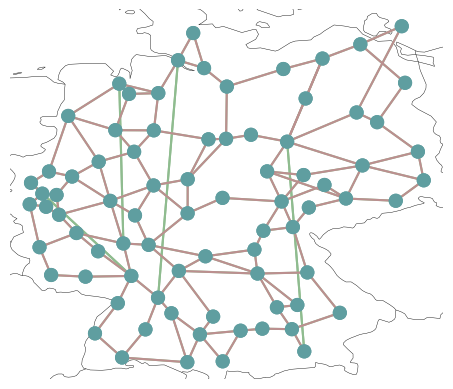

In [10]:
n.plot()

In [76]:
n.buses['x']['DE0 0']

11.965484499999999

In [11]:
n.statistics()

Optimal Capacity  Installed Capacity  \
Generator   Combined-Cycle Gas      0.000000e+00            0.000000   
            Offshore Wind (AC)      2.321095e+03         2321.095188   
            Offshore Wind (DC)      5.465905e+03         5465.904812   
            Onshore Wind            5.441367e+04        54413.669761   
            Open-Cycle Gas          2.288854e+04        22888.536500   
            Solar                   5.366900e+04        53669.000000   
            biomass                 8.011736e+03         8011.736326   
            coal                    8.158220e+03         8158.220129   
            geothermal              0.000000e+00            0.000000   
            lignite                 2.099917e+04        20999.170197   
            nuclear                 4.066000e+03         4066.000000   
            oil                     8.563000e+02          856.300000   
Line        AC                      5.867786e+05       585398.531942   
Link        DC                      2.004085e-08            0.000000   
            H2 electrolysis         1.714171e-07            0.000000   
            H2 fuel cell            9.910162e-08            0.000000   
            H2 pipeline             1.039851e-05            0.000000   
Load        -                       0.000000e+00            0.000000   
StorageUnit Battery Storage         4.130384e-07            0.000000   
Store       Hydrogen Storage        9.361310e-05            0.000000   

                                Capacity Factor      Dispatch  Transmission  \
Generator   Combined-Cycle Gas              NaN  0.000000e+00  0.000000e+00   
            Offshore Wind (AC)     4.797788e-01  9.755244e+06  0.000000e+00   
            Offshore Wind (DC)     5.859729e-01  2.805716e+07  0.000000e+00   
            Onshore Wind           2.405445e-01  1.146588e+08  0.000000e+00   
            Open-Cycle Gas         1.131398e-01  2.268493e+07  0.000000e+00   
            Solar                  1.168105e-01  5.491733e+07  0.000000e+00   
            biomass                6.931416e-01  4.864663e+07  0.000000e+00   
            coal                   4.771560e-01  3.410044e+07  0.000000e+00   
            geothermal                      NaN  0.000000e+00  0.000000e+00   
            lignite                9.291642e-01  1.709223e+08  0.000000e+00   
            nuclear                7.135704e-01  2.541607e+07  0.000000e+00   
            oil                    9.206992e-13  6.906338e-06  0.000000e+00   
Line        AC                     2.290976e-01 -7.950596e-03 -4.373574e+07   
Link        DC                     3.709810e-01  0.000000e+00  6.839982e-06   
            H2 electrolysis        3.349090e-01 -1.902486e-04  0.000000e+00   
            H2 fuel cell           3.610091e-01 -1.567015e-04  0.000000e+00   
            H2 pipeline            1.138507e-02  0.000000e+00 -4.412383e-04   
Load        -                               NaN -5.091589e+08  0.000000e+00   
StorageUnit Battery Storage        5.721206e-02 -6.806377e-05  0.000000e+00   
Store       Hydrogen Storage       4.999407e-01  0.000000e+00  0.000000e+00   

                                  Withdrawal        Supply    Curtailment  \
Generator   Combined-Cycle Gas  0.000000e+00  0.000000e+00       0.000000   
            Offshore Wind (AC)  0.000000e+00  9.755244e+06    7022.590946   
            Offshore Wind (DC)  0.000000e+00  2.805716e+07       0.005812   
            Onshore Wind        0.000000e+00  1.146588e+08  639451.496400   
            Open-Cycle Gas      0.000000e+00  2.268493e+07       0.000000   
            Solar               0.000000e+00  5.491733e+07       0.017642   
            biomass             0.000000e+00  4.864663e+07       0.000000   
            coal                0.000000e+00  3.410044e+07       0.000000   
            geothermal          0.000000e+00  0.000000e+00       0.000000   
            lignite             0.000000e+00  1.709223e+08       0.000000   
            

In [82]:
n.generators_t.p_max_pu

Generator,DE0 0 onwind,DE0 0 solar,DE0 1 onwind,DE0 1 solar,DE0 10 onwind,DE0 10 solar,DE0 11 onwind,DE0 11 solar,DE0 12 onwind,DE0 12 solar,...,DE0 78 onwind,DE0 78 solar,DE0 79 onwind,DE0 79 solar,DE0 8 offwind-ac,DE0 8 offwind-dc,DE0 8 onwind,DE0 8 solar,DE0 9 onwind,DE0 9 solar
snapshot,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.604705,0.017514,0.533223,0.000000,0.464262,0.000000,0.413224,0.026714,0.641138,0.000000,...,0.659866,0.012564,0.472972,0.021949,0.756313,0.759587,0.558973,0.000000,0.627949,0.000000
2013-01-02,0.463679,0.041891,0.244311,0.024079,0.164894,0.032059,0.427304,0.045665,0.548294,0.045803,...,0.371021,0.045642,0.043747,0.077900,0.885447,0.883859,0.456957,0.066616,0.297339,0.048200
2013-01-03,0.779667,0.000000,0.525331,0.000000,0.430556,0.000000,0.808093,0.000000,0.771924,0.000000,...,0.604751,0.000000,0.259567,0.012022,0.875906,0.869817,0.634102,0.000000,0.572401,0.000000
2013-01-04,0.637585,0.000000,0.479619,0.000000,0.268284,0.000000,0.820629,0.000000,0.703246,0.000000,...,0.321875,0.000000,0.123779,0.000000,0.885450,0.884214,0.500937,0.000000,0.341081,0.000000
2013-01-05,0.312535,0.000000,0.312482,0.000000,0.223732,0.000000,0.468573,0.000000,0.390174,0.000000,...,0.129116,0.010520,0.101058,0.000000,0.621941,0.494049,0.223461,0.000000,0.156958,0.011363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-27,0.572884,0.080810,0.809197,0.029164,0.482384,0.075923,0.368447,0.052241,0.731741,0.059857,...,0.935202,0.025563,0.381728,0.115816,0.885495,0.852932,0.860954,0.000000,0.910921,0.023235
2013-12-28,0.567273,0.021217,0.426657,0.000000,0.528643,0.000000,0.443657,0.022297,0.408431,0.000000,...,0.338125,0.000000,0.422939,0.045027,0.884167,0.885500,0.295507,0.014614,0.361105,0.000000
2013-12-29,0.363435,0.062247,0.269727,0.018111,0.272678,0.043428,0.313425,0.040676,0.352562,0.034696,...,0.371399,0.048866,0.215075,0.067986,0.882074,0.878936,0.471175,0.041762,0.301444,0.031600


In [15]:
n.snapshots

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2013-12-22', '2013-12-23', '2013-12-24', '2013-12-25',
               '2013-12-26', '2013-12-27', '2013-12-28', '2013-12-29',
               '2013-12-30', '2013-12-31'],
              dtype='datetime64[ns]', name='snapshot', length=365, freq=None)

# Helper Functions

In [40]:
def plot_feature_array(array):
    f = np.array(array).T
    for i, y in enumerate(f):
        plt.plot(np.arange(len(y)), y, label=f'feature {i+1}')
    plt.legend()
    plt.show()

In [86]:
def plot_coefficients(coef_dict: dict, width = 0.2):
    x = np.arange(len(coef_dict))
    fig, ax = plt.subplots()
    ax.set_xticks(x)
    ax.set_xticklabels(coef_dict.keys())
    for i, key in enumerate(coef_dict):
        coefs = coef_dict[key]
        ax.bar(x+(i-(len(coefs)-1)/2)/(1.5*len(coefs)), coefs, width)

In [126]:
def get_result_array(netw_splits, key):
    result_array = []
    for netw in netw_splits:
        result = np.mean(netw.statistics()[key])
        result_array.append(result)
    return stats.zscore(result_array)

# Network Split

In [116]:
def split_list(list, n):
    k, m = divmod(len(list), n)
    return [list[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(n)]

In [117]:
snapshots = n.snapshots
snapshot_splits = split_list(list=snapshots, n=30)
netw_splits = []
for snapshot_split in snapshot_splits:
    netw_copy = n.copy()
    netw_copy.set_snapshots(snapshots=snapshot_split)
    netw_copy.optimize(snapshot_split, solver_name="gurobi")
    netw_splits.append(netw_copy)

INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 145.82it/s]
INFO:linopy.io: Writing time: 0.72s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-um3s9e0f.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-um3s9e0f.lp


Reading time = 0.14 seconds


INFO:gurobipy:Reading time = 0.14 seconds


obj: 46241 rows, 22043 columns, 99345 nonzeros


INFO:gurobipy:obj: 46241 rows, 22043 columns, 99345 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 46241 rows, 22043 columns and 99345 nonzeros


INFO:gurobipy:Optimize a model with 46241 rows, 22043 columns and 99345 nonzeros


Model fingerprint: 0xd51dd270


INFO:gurobipy:Model fingerprint: 0xd51dd270


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 1e+05]


INFO:gurobipy:  Objective range  [2e-01, 1e+05]


  Bounds range     [3e+09, 3e+09]


INFO:gurobipy:  Bounds range     [3e+09, 3e+09]


  RHS range        [5e-01, 3e+09]


INFO:gurobipy:  RHS range        [5e-01, 3e+09]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 29340 rows and 8279 columns


INFO:gurobipy:Presolve removed 29340 rows and 8279 columns


Presolve time: 0.11s


INFO:gurobipy:Presolve time: 0.11s


Presolved: 16901 rows, 13764 columns, 64124 nonzeros


INFO:gurobipy:Presolved: 16901 rows, 13764 columns, 64124 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.06s


INFO:gurobipy:Ordering time: 0.06s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Free vars  : 1131


INFO:gurobipy: Free vars  : 1131


 AA' NZ     : 2.551e+05


INFO:gurobipy: AA' NZ     : 2.551e+05


 Factor NZ  : 1.344e+06 (roughly 23 MB of memory)


INFO:gurobipy: Factor NZ  : 1.344e+06 (roughly 23 MB of memory)


 Factor Ops : 2.359e+08 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.359e+08 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.00156991e+14 -3.59252796e+12  8.55e+09 3.28e+04  4.64e+11     0s


INFO:gurobipy:   0   2.00156991e+14 -3.59252796e+12  8.55e+09 3.28e+04  4.64e+11     0s


   1   2.81552158e+14 -1.28598975e+13  4.46e+09 8.45e+03  1.69e+11     0s


INFO:gurobipy:   1   2.81552158e+14 -1.28598975e+13  4.46e+09 8.45e+03  1.69e+11     0s


   2   2.12223636e+14 -2.52115787e+13  6.70e+08 4.91e+02  2.71e+10     0s


INFO:gurobipy:   2   2.12223636e+14 -2.52115787e+13  6.70e+08 4.91e+02  2.71e+10     0s


   3   3.26722847e+13 -1.50340327e+13  5.90e+07 7.12e+00  2.97e+09     0s


INFO:gurobipy:   3   3.26722847e+13 -1.50340327e+13  5.90e+07 7.12e+00  2.97e+09     0s


   4   1.27315622e+13 -2.40707157e+12  1.34e+07 1.90e+00  8.03e+08     0s


INFO:gurobipy:   4   1.27315622e+13 -2.40707157e+12  1.34e+07 1.90e+00  8.03e+08     0s


   5   9.58168221e+12 -5.13950934e+12  4.24e+04 1.74e+00  6.80e+08     0s


INFO:gurobipy:   5   9.58168221e+12 -5.13950934e+12  4.24e+04 1.74e+00  6.80e+08     0s


   6   4.13474884e+12 -1.01451082e+12  6.39e+03 5.57e-01  2.00e+08     0s


INFO:gurobipy:   6   4.13474884e+12 -1.01451082e+12  6.39e+03 5.57e-01  2.00e+08     0s


   7   5.52822715e+11 -4.16112375e+11  7.45e+02 2.21e-01  3.56e+07     1s


INFO:gurobipy:   7   5.52822715e+11 -4.16112375e+11  7.45e+02 2.21e-01  3.56e+07     1s


   8   1.17337948e+11 -2.34600836e+11  1.29e+02 1.17e-01  1.25e+07     1s


INFO:gurobipy:   8   1.17337948e+11 -2.34600836e+11  1.29e+02 1.17e-01  1.25e+07     1s


   9   6.11694612e+10 -7.32821701e+10  6.11e+01 5.13e-02  4.75e+06     1s


INFO:gurobipy:   9   6.11694612e+10 -7.32821701e+10  6.11e+01 5.13e-02  4.75e+06     1s


  10   2.09133865e+10 -2.93455157e+10  1.24e+01 2.99e-02  1.75e+06     1s


INFO:gurobipy:  10   2.09133865e+10 -2.93455157e+10  1.24e+01 2.99e-02  1.75e+06     1s


  11   6.97529280e+09 -1.11658029e+10  1.96e+00 1.15e-02  6.29e+05     1s


INFO:gurobipy:  11   6.97529280e+09 -1.11658029e+10  1.96e+00 1.15e-02  6.29e+05     1s


  12   3.37717802e+09 -4.78175580e+09  9.54e-01 3.85e-03  2.83e+05     1s


INFO:gurobipy:  12   3.37717802e+09 -4.78175580e+09  9.54e-01 3.85e-03  2.83e+05     1s


  13   1.83370180e+09 -2.54033131e+09  5.02e-01 1.99e-03  1.51e+05     1s


INFO:gurobipy:  13   1.83370180e+09 -2.54033131e+09  5.02e-01 1.99e-03  1.51e+05     1s


  14   1.14936945e+09 -1.08814705e+09  2.68e-01 9.35e-04  7.75e+04     1s


INFO:gurobipy:  14   1.14936945e+09 -1.08814705e+09  2.68e-01 9.35e-04  7.75e+04     1s


  15   5.94864122e+08 -2.47250053e+08  9.28e-02 3.31e-04  2.91e+04     1s


INFO:gurobipy:  15   5.94864122e+08 -2.47250053e+08  9.28e-02 3.31e-04  2.91e+04     1s


  16   3.50667072e+08  6.93296554e+07  2.88e-02 1.05e-04  9.74e+03     1s


INFO:gurobipy:  16   3.50667072e+08  6.93296554e+07  2.88e-02 1.05e-04  9.74e+03     1s


  17   2.58737908e+08  1.34394163e+08  9.95e-03 5.70e-05  4.30e+03     1s


INFO:gurobipy:  17   2.58737908e+08  1.34394163e+08  9.95e-03 5.70e-05  4.30e+03     1s


  18   2.33391888e+08  1.79792097e+08  5.03e-03 2.10e-05  1.85e+03     1s


INFO:gurobipy:  18   2.33391888e+08  1.79792097e+08  5.03e-03 2.10e-05  1.85e+03     1s


  19   2.19679229e+08  1.94735771e+08  2.53e-03 8.55e-06  8.63e+02     1s


INFO:gurobipy:  19   2.19679229e+08  1.94735771e+08  2.53e-03 8.55e-06  8.63e+02     1s


  20   2.08647258e+08  2.03151769e+08  5.40e-04 1.65e-06  1.90e+02     1s


INFO:gurobipy:  20   2.08647258e+08  2.03151769e+08  5.40e-04 1.65e-06  1.90e+02     1s


  21   2.05401845e+08  2.04656691e+08  8.54e-05 1.72e-07  2.58e+01     1s


INFO:gurobipy:  21   2.05401845e+08  2.04656691e+08  8.54e-05 1.72e-07  2.58e+01     1s


  22   2.04755441e+08  2.04720526e+08  4.51e-06 1.97e-08  1.21e+00     1s


INFO:gurobipy:  22   2.04755441e+08  2.04720526e+08  4.51e-06 1.97e-08  1.21e+00     1s


  23   2.04734335e+08  2.04728458e+08  9.03e-07 7.47e-09  2.03e-01     1s


INFO:gurobipy:  23   2.04734335e+08  2.04728458e+08  9.03e-07 7.47e-09  2.03e-01     1s


  24   2.04733569e+08  2.04732495e+08  1.20e-07 1.30e-09  3.71e-02     1s


INFO:gurobipy:  24   2.04733569e+08  2.04732495e+08  1.20e-07 1.30e-09  3.71e-02     1s


  25   2.04733361e+08  2.04733310e+08  3.15e-08 3.64e-11  1.77e-03     1s


INFO:gurobipy:  25   2.04733361e+08  2.04733310e+08  3.15e-08 3.64e-11  1.77e-03     1s


  26   2.04733355e+08  2.04733346e+08  1.01e-08 2.59e-11  3.07e-04     1s


INFO:gurobipy:  26   2.04733355e+08  2.04733346e+08  1.01e-08 2.59e-11  3.07e-04     1s


  27   2.04733353e+08  2.04733350e+08  5.52e-09 2.09e-11  1.16e-04     1s


INFO:gurobipy:  27   2.04733353e+08  2.04733350e+08  5.52e-09 2.09e-11  1.16e-04     1s


  28   2.04733352e+08  2.04733351e+08  2.25e-09 2.86e-11  3.40e-05     1s


INFO:gurobipy:  28   2.04733352e+08  2.04733351e+08  2.25e-09 2.86e-11  3.40e-05     1s


  29   2.04733352e+08  2.04733351e+08  9.09e-10 2.02e-11  1.37e-05     1s


INFO:gurobipy:  29   2.04733352e+08  2.04733351e+08  9.09e-10 2.02e-11  1.37e-05     1s


  30   2.04733351e+08  2.04733351e+08  2.91e-10 3.53e-11  2.93e-08     1s


INFO:gurobipy:  30   2.04733351e+08  2.04733351e+08  2.91e-10 3.53e-11  2.93e-08     1s


  31   2.04733351e+08  2.04733351e+08  1.20e-10 3.00e-11  1.59e-10     1s


INFO:gurobipy:  31   2.04733351e+08  2.04733351e+08  1.20e-10 3.00e-11  1.59e-10     1s


INFO:gurobipy:


Barrier solved model in 31 iterations and 1.31 seconds (0.64 work units)


INFO:gurobipy:Barrier solved model in 31 iterations and 1.31 seconds (0.64 work units)


Optimal objective 2.04733351e+08


INFO:gurobipy:Optimal objective 2.04733351e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   10348 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:   10348 DPushes remaining with DInf 0.0000000e+00                 1s


       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       4 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:       4 PPushes remaining with PInf 0.0000000e+00                 1s


       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.3516191e-10      1s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.3516191e-10      1s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    5456    2.0473335e+08   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:    5456    2.0473335e+08   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:


Solved in 5456 iterations and 1.44 seconds (0.68 work units)


INFO:gurobipy:Solved in 5456 iterations and 1.44 seconds (0.68 work units)


Optimal objective  2.047333512e+08


INFO:gurobipy:Optimal objective  2.047333512e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 22043 primals, 46241 duals
Objective: 2.05e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper,

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 148.90it/s]
INFO:linopy.io: Writing time: 0.69s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-pjxxh4bz.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-pjxxh4bz.lp


Reading time = 0.14 seconds


INFO:gurobipy:Reading time = 0.14 seconds


obj: 46241 rows, 22043 columns, 99345 nonzeros


INFO:gurobipy:obj: 46241 rows, 22043 columns, 99345 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 46241 rows, 22043 columns and 99345 nonzeros


INFO:gurobipy:Optimize a model with 46241 rows, 22043 columns and 99345 nonzeros


Model fingerprint: 0x71ff0bd8


INFO:gurobipy:Model fingerprint: 0x71ff0bd8


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 1e+05]


INFO:gurobipy:  Objective range  [2e-01, 1e+05]


  Bounds range     [3e+09, 3e+09]


INFO:gurobipy:  Bounds range     [3e+09, 3e+09]


  RHS range        [5e-01, 3e+09]


INFO:gurobipy:  RHS range        [5e-01, 3e+09]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 29340 rows and 7912 columns


INFO:gurobipy:Presolve removed 29340 rows and 7912 columns


Presolve time: 0.06s


INFO:gurobipy:Presolve time: 0.06s


Presolved: 16901 rows, 14131 columns, 64491 nonzeros


INFO:gurobipy:Presolved: 16901 rows, 14131 columns, 64491 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.05s


INFO:gurobipy:Ordering time: 0.05s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Free vars  : 1131


INFO:gurobipy: Free vars  : 1131


 AA' NZ     : 2.551e+05


INFO:gurobipy: AA' NZ     : 2.551e+05


 Factor NZ  : 1.344e+06 (roughly 24 MB of memory)


INFO:gurobipy: Factor NZ  : 1.344e+06 (roughly 24 MB of memory)


 Factor Ops : 2.359e+08 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.359e+08 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.95369165e+14 -3.58511760e+12  8.35e+09 3.28e+04  4.51e+11     0s


INFO:gurobipy:   0   1.95369165e+14 -3.58511760e+12  8.35e+09 3.28e+04  4.51e+11     0s


   1   2.74684177e+14 -1.24968669e+13  4.35e+09 8.43e+03  1.66e+11     0s


INFO:gurobipy:   1   2.74684177e+14 -1.24968669e+13  4.35e+09 8.43e+03  1.66e+11     0s


   2   2.07966218e+14 -2.42087786e+13  6.44e+08 4.94e+02  2.64e+10     0s


INFO:gurobipy:   2   2.07966218e+14 -2.42087786e+13  6.44e+08 4.94e+02  2.64e+10     0s


   3   3.19281484e+13 -1.44116175e+13  5.60e+07 5.94e+00  2.86e+09     0s


INFO:gurobipy:   3   3.19281484e+13 -1.44116175e+13  5.60e+07 5.94e+00  2.86e+09     0s


   4   1.21386127e+13 -2.37773821e+12  1.19e+07 1.69e+00  7.48e+08     0s


INFO:gurobipy:   4   1.21386127e+13 -2.37773821e+12  1.19e+07 1.69e+00  7.48e+08     0s


   5   9.24486572e+12 -5.20069563e+12  3.82e+04 1.53e+00  6.48e+08     0s


INFO:gurobipy:   5   9.24486572e+12 -5.20069563e+12  3.82e+04 1.53e+00  6.48e+08     0s


   6   4.06721719e+12 -9.67616434e+11  5.77e+03 4.86e-01  1.91e+08     0s


INFO:gurobipy:   6   4.06721719e+12 -9.67616434e+11  5.77e+03 4.86e-01  1.91e+08     0s


   7   6.06720223e+11 -3.98509906e+11  7.60e+02 2.09e-01  3.63e+07     0s


INFO:gurobipy:   7   6.06720223e+11 -3.98509906e+11  7.60e+02 2.09e-01  3.63e+07     0s


   8   1.62719104e+11 -2.30670391e+11  1.87e+02 1.19e-01  1.38e+07     0s


INFO:gurobipy:   8   1.62719104e+11 -2.30670391e+11  1.87e+02 1.19e-01  1.38e+07     0s


   9   5.78130195e+10 -6.29804910e+10  5.66e+01 4.10e-02  4.18e+06     0s


INFO:gurobipy:   9   5.78130195e+10 -6.29804910e+10  5.66e+01 4.10e-02  4.18e+06     0s


  10   2.33315837e+10 -2.70668055e+10  1.42e+01 2.20e-02  1.72e+06     1s


INFO:gurobipy:  10   2.33315837e+10 -2.70668055e+10  1.42e+01 2.20e-02  1.72e+06     1s


  11   1.49465738e+10 -1.47319003e+10  7.71e+00 1.33e-02  1.01e+06     1s


INFO:gurobipy:  11   1.49465738e+10 -1.47319003e+10  7.71e+00 1.33e-02  1.01e+06     1s


  12   5.46612918e+09 -7.72447362e+09  2.46e+00 5.92e-03  4.47e+05     1s


INFO:gurobipy:  12   5.46612918e+09 -7.72447362e+09  2.46e+00 5.92e-03  4.47e+05     1s


  13   1.99788948e+09 -1.73074894e+09  6.83e-01 1.51e-03  1.26e+05     1s


INFO:gurobipy:  13   1.99788948e+09 -1.73074894e+09  6.83e-01 1.51e-03  1.26e+05     1s


  14   1.11828708e+09 -5.84524995e+08  3.06e-01 7.55e-04  5.75e+04     1s


INFO:gurobipy:  14   1.11828708e+09 -5.84524995e+08  3.06e-01 7.55e-04  5.75e+04     1s


  15   8.79948417e+08 -2.14985004e+08  2.05e-01 4.90e-04  3.70e+04     1s


INFO:gurobipy:  15   8.79948417e+08 -2.14985004e+08  2.05e-01 4.90e-04  3.70e+04     1s


  16   7.14376452e+08  8.25940652e+07  1.38e-01 2.61e-04  2.13e+04     1s


INFO:gurobipy:  16   7.14376452e+08  8.25940652e+07  1.38e-01 2.61e-04  2.13e+04     1s


  17   4.46740440e+08  1.97178195e+08  2.26e-02 1.72e-04  8.42e+03     1s


INFO:gurobipy:  17   4.46740440e+08  1.97178195e+08  2.26e-02 1.72e-04  8.42e+03     1s


  18   4.07931119e+08  2.78544205e+08  8.60e-03 9.66e-05  4.37e+03     1s


INFO:gurobipy:  18   4.07931119e+08  2.78544205e+08  8.60e-03 9.66e-05  4.37e+03     1s


  19   3.97111425e+08  2.99538224e+08  5.69e-03 7.51e-05  3.29e+03     1s


INFO:gurobipy:  19   3.97111425e+08  2.99538224e+08  5.69e-03 7.51e-05  3.29e+03     1s


  20   3.85856975e+08  3.50594687e+08  2.73e-03 2.31e-05  1.19e+03     1s


INFO:gurobipy:  20   3.85856975e+08  3.50594687e+08  2.73e-03 2.31e-05  1.19e+03     1s


  21   3.76145135e+08  3.66868605e+08  4.16e-04 6.98e-06  3.13e+02     1s


INFO:gurobipy:  21   3.76145135e+08  3.66868605e+08  4.16e-04 6.98e-06  3.13e+02     1s


  22   3.74119638e+08  3.72751623e+08  5.54e-05 9.76e-07  4.61e+01     1s


INFO:gurobipy:  22   3.74119638e+08  3.72751623e+08  5.54e-05 9.76e-07  4.61e+01     1s


  23   3.73890690e+08  3.73440132e+08  2.55e-05 2.52e-07  1.52e+01     1s


INFO:gurobipy:  23   3.73890690e+08  3.73440132e+08  2.55e-05 2.52e-07  1.52e+01     1s


  24   3.73853922e+08  3.73563907e+08  2.25e-05 1.29e-07  9.79e+00     1s


INFO:gurobipy:  24   3.73853922e+08  3.73563907e+08  2.25e-05 1.29e-07  9.79e+00     1s


  25   3.73829210e+08  3.73608203e+08  1.85e-05 8.42e-08  7.46e+00     1s


INFO:gurobipy:  25   3.73829210e+08  3.73608203e+08  1.85e-05 8.42e-08  7.46e+00     1s


  26   3.73770089e+08  3.73679239e+08  9.88e-06 1.14e-08  3.07e+00     1s


INFO:gurobipy:  26   3.73770089e+08  3.73679239e+08  9.88e-06 1.14e-08  3.07e+00     1s


  27   3.73731261e+08  3.73685836e+08  4.99e-06 2.41e-09  1.53e+00     1s


INFO:gurobipy:  27   3.73731261e+08  3.73685836e+08  4.99e-06 2.41e-09  1.53e+00     1s


  28   3.73717960e+08  3.73687639e+08  3.81e-06 6.68e-10  1.02e+00     1s


INFO:gurobipy:  28   3.73717960e+08  3.73687639e+08  3.81e-06 6.68e-10  1.02e+00     1s


  29   3.73696812e+08  3.73688383e+08  3.62e-06 9.56e-10  2.84e-01     1s


INFO:gurobipy:  29   3.73696812e+08  3.73688383e+08  3.62e-06 9.56e-10  2.84e-01     1s


  30   3.73689782e+08  3.73688513e+08  3.32e-06 4.64e-10  4.28e-02     1s


INFO:gurobipy:  30   3.73689782e+08  3.73688513e+08  3.32e-06 4.64e-10  4.28e-02     1s


  31   3.73688794e+08  3.73688590e+08  8.04e-07 6.51e-11  6.86e-03     1s


INFO:gurobipy:  31   3.73688794e+08  3.73688590e+08  8.04e-07 6.51e-11  6.86e-03     1s


  32   3.73688605e+08  3.73688596e+08  2.18e-11 3.27e-11  3.07e-04     1s


INFO:gurobipy:  32   3.73688605e+08  3.73688596e+08  2.18e-11 3.27e-11  3.07e-04     1s


  33   3.73688597e+08  3.73688597e+08  1.11e-08 3.18e-11  3.33e-07     1s


INFO:gurobipy:  33   3.73688597e+08  3.73688597e+08  1.11e-08 3.18e-11  3.33e-07     1s


  34   3.73688597e+08  3.73688597e+08  2.91e-11 2.46e-11  3.33e-10     1s


INFO:gurobipy:  34   3.73688597e+08  3.73688597e+08  2.91e-11 2.46e-11  3.33e-10     1s


INFO:gurobipy:


Barrier solved model in 34 iterations and 1.24 seconds (0.65 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 1.24 seconds (0.65 work units)


Optimal objective 3.73688597e+08


INFO:gurobipy:Optimal objective 3.73688597e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   10348 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:   10348 DPushes remaining with DInf 0.0000000e+00                 1s


       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      13 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:      13 PPushes remaining with PInf 0.0000000e+00                 1s


       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.5657939e-10      1s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.5657939e-10      1s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    5256    3.7368860e+08   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:    5256    3.7368860e+08   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:


Solved in 5256 iterations and 1.45 seconds (0.69 work units)


INFO:gurobipy:Solved in 5256 iterations and 1.45 seconds (0.69 work units)


Optimal objective  3.736885971e+08


INFO:gurobipy:Optimal objective  3.736885971e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 22043 primals, 46241 duals
Objective: 3.74e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper,

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 148.90it/s]
INFO:linopy.io: Writing time: 0.68s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-80mpirel.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-80mpirel.lp


Reading time = 0.13 seconds


INFO:gurobipy:Reading time = 0.13 seconds


obj: 46241 rows, 22043 columns, 99345 nonzeros


INFO:gurobipy:obj: 46241 rows, 22043 columns, 99345 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 46241 rows, 22043 columns and 99345 nonzeros


INFO:gurobipy:Optimize a model with 46241 rows, 22043 columns and 99345 nonzeros


Model fingerprint: 0x95053bcb


INFO:gurobipy:Model fingerprint: 0x95053bcb


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 1e+05]


INFO:gurobipy:  Objective range  [2e-01, 1e+05]


  Bounds range     [3e+09, 3e+09]


INFO:gurobipy:  Bounds range     [3e+09, 3e+09]


  RHS range        [5e-01, 3e+09]


INFO:gurobipy:  RHS range        [5e-01, 3e+09]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 29340 rows and 7930 columns


INFO:gurobipy:Presolve removed 29340 rows and 7930 columns


Presolve time: 0.06s


INFO:gurobipy:Presolve time: 0.06s


Presolved: 16901 rows, 14113 columns, 64473 nonzeros


INFO:gurobipy:Presolved: 16901 rows, 14113 columns, 64473 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.05s


INFO:gurobipy:Ordering time: 0.05s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Free vars  : 1131


INFO:gurobipy: Free vars  : 1131


 AA' NZ     : 2.551e+05


INFO:gurobipy: AA' NZ     : 2.551e+05


 Factor NZ  : 1.344e+06 (roughly 23 MB of memory)


INFO:gurobipy: Factor NZ  : 1.344e+06 (roughly 23 MB of memory)


 Factor Ops : 2.359e+08 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.359e+08 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.95656655e+14 -3.61423660e+12  8.36e+09 3.28e+04  4.52e+11     0s


INFO:gurobipy:   0   1.95656655e+14 -3.61423660e+12  8.36e+09 3.28e+04  4.52e+11     0s


   1   2.75091786e+14 -1.24373649e+13  4.36e+09 8.73e+03  1.69e+11     0s


INFO:gurobipy:   1   2.75091786e+14 -1.24373649e+13  4.36e+09 8.73e+03  1.69e+11     0s


   2   2.11044801e+14 -2.44684087e+13  6.59e+08 5.22e+02  2.71e+10     0s


INFO:gurobipy:   2   2.11044801e+14 -2.44684087e+13  6.59e+08 5.22e+02  2.71e+10     0s


   3   3.20639155e+13 -1.48096089e+13  5.51e+07 4.27e+00  2.86e+09     0s


INFO:gurobipy:   3   3.20639155e+13 -1.48096089e+13  5.51e+07 4.27e+00  2.86e+09     0s


   4   1.21382066e+13 -2.42132618e+12  1.16e+07 1.73e+00  7.44e+08     0s


INFO:gurobipy:   4   1.21382066e+13 -2.42132618e+12  1.16e+07 1.73e+00  7.44e+08     0s


   5   9.68101047e+12 -5.30264761e+12  4.04e+04 1.56e+00  6.75e+08     0s


INFO:gurobipy:   5   9.68101047e+12 -5.30264761e+12  4.04e+04 1.56e+00  6.75e+08     0s


   6   5.01204945e+12 -2.29198540e+12  9.31e+03 5.78e-01  2.82e+08     0s


INFO:gurobipy:   6   5.01204945e+12 -2.29198540e+12  9.31e+03 5.78e-01  2.82e+08     0s


   7   7.30610462e+11 -9.96213239e+11  1.28e+03 2.29e-01  6.24e+07     0s


INFO:gurobipy:   7   7.30610462e+11 -9.96213239e+11  1.28e+03 2.29e-01  6.24e+07     0s


   8   1.85820726e+11 -4.55205015e+11  2.45e+02 1.28e-01  2.23e+07     0s


INFO:gurobipy:   8   1.85820726e+11 -4.55205015e+11  2.45e+02 1.28e-01  2.23e+07     0s


   9   8.44177645e+10 -1.42951401e+11  9.51e+01 4.80e-02  7.87e+06     1s


INFO:gurobipy:   9   8.44177645e+10 -1.42951401e+11  9.51e+01 4.80e-02  7.87e+06     1s


  10   2.48135723e+10 -5.12454268e+10  1.73e+01 2.35e-02  2.59e+06     1s


INFO:gurobipy:  10   2.48135723e+10 -5.12454268e+10  1.73e+01 2.35e-02  2.59e+06     1s


  11   1.50640462e+10 -2.76054852e+10  8.36e+00 1.35e-02  1.45e+06     1s


INFO:gurobipy:  11   1.50640462e+10 -2.76054852e+10  8.36e+00 1.35e-02  1.45e+06     1s


  12   5.82545113e+09 -1.34378057e+10  2.74e+00 6.45e-03  6.52e+05     1s


INFO:gurobipy:  12   5.82545113e+09 -1.34378057e+10  2.74e+00 6.45e-03  6.52e+05     1s


  13   2.00027943e+09 -3.03129627e+09  7.27e-01 1.59e-03  1.70e+05     1s


INFO:gurobipy:  13   2.00027943e+09 -3.03129627e+09  7.27e-01 1.59e-03  1.70e+05     1s


  14   9.66196687e+08 -6.39501204e+08  2.67e-01 4.59e-04  5.43e+04     1s


INFO:gurobipy:  14   9.66196687e+08 -6.39501204e+08  2.67e-01 4.59e-04  5.43e+04     1s


  15   5.47091975e+08 -2.25509753e+08  1.29e-01 2.38e-04  2.61e+04     1s


INFO:gurobipy:  15   5.47091975e+08 -2.25509753e+08  1.29e-01 2.38e-04  2.61e+04     1s


  16   3.25989626e+08  2.31230553e+06  5.61e-02 1.03e-04  1.09e+04     1s


INFO:gurobipy:  16   3.25989626e+08  2.31230553e+06  5.61e-02 1.03e-04  1.09e+04     1s


  17   1.96193720e+08  1.01595562e+08  1.64e-02 3.39e-05  3.20e+03     1s


INFO:gurobipy:  17   1.96193720e+08  1.01595562e+08  1.64e-02 3.39e-05  3.20e+03     1s


  18   1.57704821e+08  1.22866323e+08  5.75e-03 1.47e-05  1.18e+03     1s


INFO:gurobipy:  18   1.57704821e+08  1.22866323e+08  5.75e-03 1.47e-05  1.18e+03     1s


  19   1.45713130e+08  1.30697905e+08  2.50e-03 6.28e-06  5.08e+02     1s


INFO:gurobipy:  19   1.45713130e+08  1.30697905e+08  2.50e-03 6.28e-06  5.08e+02     1s


  20   1.40142540e+08  1.33239969e+08  1.07e-03 3.30e-06  2.33e+02     1s


INFO:gurobipy:  20   1.40142540e+08  1.33239969e+08  1.07e-03 3.30e-06  2.33e+02     1s


  21   1.36925656e+08  1.35001881e+08  2.47e-04 1.10e-06  6.50e+01     1s


INFO:gurobipy:  21   1.36925656e+08  1.35001881e+08  2.47e-04 1.10e-06  6.50e+01     1s


  22   1.35920320e+08  1.35689413e+08  4.10e-05 6.15e-08  7.81e+00     1s


INFO:gurobipy:  22   1.35920320e+08  1.35689413e+08  4.10e-05 6.15e-08  7.81e+00     1s


  23   1.35715113e+08  1.35706507e+08  1.83e-04 1.18e-08  2.91e-01     1s


INFO:gurobipy:  23   1.35715113e+08  1.35706507e+08  1.83e-04 1.18e-08  2.91e-01     1s


  24   1.35712245e+08  1.35709793e+08  6.30e-05 2.41e-09  8.28e-02     1s


INFO:gurobipy:  24   1.35712245e+08  1.35709793e+08  6.30e-05 2.41e-09  8.28e-02     1s


  25   1.35711610e+08  1.35710199e+08  3.50e-05 1.29e-09  4.77e-02     1s


INFO:gurobipy:  25   1.35711610e+08  1.35710199e+08  3.50e-05 1.29e-09  4.77e-02     1s


  26   1.35711042e+08  1.35710541e+08  1.27e-05 3.71e-10  1.69e-02     1s


INFO:gurobipy:  26   1.35711042e+08  1.35710541e+08  1.27e-05 3.71e-10  1.69e-02     1s


  27   1.35710914e+08  1.35710609e+08  7.69e-06 2.11e-10  1.03e-02     1s


INFO:gurobipy:  27   1.35710914e+08  1.35710609e+08  7.69e-06 2.11e-10  1.03e-02     1s


  28   1.35710896e+08  1.35710632e+08  6.97e-06 1.60e-10  8.90e-03     1s


INFO:gurobipy:  28   1.35710896e+08  1.35710632e+08  6.97e-06 1.60e-10  8.90e-03     1s


  29   1.35710817e+08  1.35710661e+08  3.98e-06 9.38e-11  5.25e-03     1s


INFO:gurobipy:  29   1.35710817e+08  1.35710661e+08  3.98e-06 9.38e-11  5.25e-03     1s


  30   1.35710728e+08  1.35710695e+08  6.61e-07 2.57e-11  1.11e-03     1s


INFO:gurobipy:  30   1.35710728e+08  1.35710695e+08  6.61e-07 2.57e-11  1.11e-03     1s


  31   1.35710713e+08  1.35710699e+08  2.61e-07 2.16e-11  4.77e-04     1s


INFO:gurobipy:  31   1.35710713e+08  1.35710699e+08  2.61e-07 2.16e-11  4.77e-04     1s


  32   1.35710702e+08  1.35710702e+08  3.87e-09 3.73e-11  8.99e-06     1s


INFO:gurobipy:  32   1.35710702e+08  1.35710702e+08  3.87e-09 3.73e-11  8.99e-06     1s


  33   1.35710702e+08  1.35710702e+08  1.07e-09 2.89e-11  1.99e-06     1s


INFO:gurobipy:  33   1.35710702e+08  1.35710702e+08  1.07e-09 2.89e-11  1.99e-06     1s


  34   1.35710702e+08  1.35710702e+08  1.04e-09 2.50e-11  1.76e-06     1s


INFO:gurobipy:  34   1.35710702e+08  1.35710702e+08  1.04e-09 2.50e-11  1.76e-06     1s


INFO:gurobipy:


Barrier solved model in 34 iterations and 1.46 seconds (0.73 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 1.46 seconds (0.73 work units)


Optimal objective 1.35710702e+08


INFO:gurobipy:Optimal objective 1.35710702e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   10349 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:   10349 DPushes remaining with DInf 0.0000000e+00                 1s


       0 DPushes remaining with DInf 0.0000000e+00                 2s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                 2s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     183 PPushes remaining with PInf 0.0000000e+00                 2s


INFO:gurobipy:     183 PPushes remaining with PInf 0.0000000e+00                 2s


       0 PPushes remaining with PInf 0.0000000e+00                 2s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                 2s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 9.5263528e-11      2s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 9.5263528e-11      2s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    5467    1.3571070e+08   0.000000e+00   0.000000e+00      2s


INFO:gurobipy:    5467    1.3571070e+08   0.000000e+00   0.000000e+00      2s


INFO:gurobipy:


Solved in 5467 iterations and 1.62 seconds (0.78 work units)


INFO:gurobipy:Solved in 5467 iterations and 1.62 seconds (0.78 work units)


Optimal objective  1.357107021e+08


INFO:gurobipy:Optimal objective  1.357107021e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 22043 primals, 46241 duals
Objective: 1.36e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper,

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 148.90it/s]
INFO:linopy.io: Writing time: 0.67s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-_s3hubzj.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-_s3hubzj.lp


Reading time = 0.14 seconds


INFO:gurobipy:Reading time = 0.14 seconds


obj: 46241 rows, 22043 columns, 99345 nonzeros


INFO:gurobipy:obj: 46241 rows, 22043 columns, 99345 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 46241 rows, 22043 columns and 99345 nonzeros


INFO:gurobipy:Optimize a model with 46241 rows, 22043 columns and 99345 nonzeros


Model fingerprint: 0x3de80c06


INFO:gurobipy:Model fingerprint: 0x3de80c06


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 1e+05]


INFO:gurobipy:  Objective range  [2e-01, 1e+05]


  Bounds range     [3e+09, 3e+09]


INFO:gurobipy:  Bounds range     [3e+09, 3e+09]


  RHS range        [2e-01, 3e+09]


INFO:gurobipy:  RHS range        [2e-01, 3e+09]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 29340 rows and 7931 columns


INFO:gurobipy:Presolve removed 29340 rows and 7931 columns


Presolve time: 0.06s


INFO:gurobipy:Presolve time: 0.06s


Presolved: 16901 rows, 14112 columns, 64472 nonzeros


INFO:gurobipy:Presolved: 16901 rows, 14112 columns, 64472 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.06s


INFO:gurobipy:Ordering time: 0.06s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Free vars  : 1131


INFO:gurobipy: Free vars  : 1131


 AA' NZ     : 2.551e+05


INFO:gurobipy: AA' NZ     : 2.551e+05


 Factor NZ  : 1.344e+06 (roughly 23 MB of memory)


INFO:gurobipy: Factor NZ  : 1.344e+06 (roughly 23 MB of memory)


 Factor Ops : 2.359e+08 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.359e+08 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.95676539e+14 -3.57464809e+12  8.36e+09 3.28e+04  4.52e+11     0s


INFO:gurobipy:   0   1.95676539e+14 -3.57464809e+12  8.36e+09 3.28e+04  4.52e+11     0s


   1   2.75114079e+14 -1.25021192e+13  4.35e+09 8.44e+03  1.66e+11     0s


INFO:gurobipy:   1   2.75114079e+14 -1.25021192e+13  4.35e+09 8.44e+03  1.66e+11     0s


   2   2.08279975e+14 -2.42444547e+13  6.46e+08 4.96e+02  2.65e+10     0s


INFO:gurobipy:   2   2.08279975e+14 -2.42444547e+13  6.46e+08 4.96e+02  2.65e+10     0s


   3   3.26195981e+13 -1.45130211e+13  5.81e+07 4.27e+00  2.93e+09     0s


INFO:gurobipy:   3   3.26195981e+13 -1.45130211e+13  5.81e+07 4.27e+00  2.93e+09     0s


   4   1.21722762e+13 -2.38004940e+12  1.21e+07 1.66e+00  7.53e+08     0s


INFO:gurobipy:   4   1.21722762e+13 -2.38004940e+12  1.21e+07 1.66e+00  7.53e+08     0s


   5   9.41252543e+12 -5.23023551e+12  4.00e+04 1.51e+00  6.62e+08     0s


INFO:gurobipy:   5   9.41252543e+12 -5.23023551e+12  4.00e+04 1.51e+00  6.62e+08     0s


   6   4.27148864e+12 -1.01971372e+12  6.35e+03 4.98e-01  2.02e+08     0s


INFO:gurobipy:   6   4.27148864e+12 -1.01971372e+12  6.35e+03 4.98e-01  2.02e+08     0s


   7   6.19486756e+11 -4.00617814e+11  8.17e+02 2.12e-01  3.70e+07     0s


INFO:gurobipy:   7   6.19486756e+11 -4.00617814e+11  8.17e+02 2.12e-01  3.70e+07     0s


   8   1.25127260e+11 -2.40120319e+11  1.36e+02 1.32e-01  1.27e+07     0s


INFO:gurobipy:   8   1.25127260e+11 -2.40120319e+11  1.36e+02 1.32e-01  1.27e+07     0s


   9   6.61581853e+10 -7.66327160e+10  6.69e+01 4.90e-02  4.94e+06     1s


INFO:gurobipy:   9   6.61581853e+10 -7.66327160e+10  6.69e+01 4.90e-02  4.94e+06     1s


  10   2.21610637e+10 -2.83451979e+10  1.37e+01 2.79e-02  1.72e+06     1s


INFO:gurobipy:  10   2.21610637e+10 -2.83451979e+10  1.37e+01 2.79e-02  1.72e+06     1s


  11   1.33374120e+10 -1.57456211e+10  6.72e+00 1.65e-02  9.88e+05     1s


INFO:gurobipy:  11   1.33374120e+10 -1.57456211e+10  6.72e+00 1.65e-02  9.88e+05     1s


  12   5.00674177e+09 -9.51478304e+09  2.21e+00 8.93e-03  4.92e+05     1s


INFO:gurobipy:  12   5.00674177e+09 -9.51478304e+09  2.21e+00 8.93e-03  4.92e+05     1s


  13   1.98681214e+09 -2.39236467e+09  6.96e-01 2.09e-03  1.48e+05     1s


INFO:gurobipy:  13   1.98681214e+09 -2.39236467e+09  6.96e-01 2.09e-03  1.48e+05     1s


  14   1.13886818e+09 -8.62608529e+08  3.00e-01 8.99e-04  6.77e+04     1s


INFO:gurobipy:  14   1.13886818e+09 -8.62608529e+08  3.00e-01 8.99e-04  6.77e+04     1s


  15   7.60406599e+08 -2.77129089e+08  1.58e-01 4.53e-04  3.51e+04     1s


INFO:gurobipy:  15   7.60406599e+08 -2.77129089e+08  1.58e-01 4.53e-04  3.51e+04     1s


  16   6.05733641e+08  6.88810602e+07  1.03e-01 1.88e-04  1.82e+04     1s


INFO:gurobipy:  16   6.05733641e+08  6.88810602e+07  1.03e-01 1.88e-04  1.82e+04     1s


  17   3.46825426e+08  2.37457793e+08  7.46e-03 6.48e-05  3.69e+03     1s


INFO:gurobipy:  17   3.46825426e+08  2.37457793e+08  7.46e-03 6.48e-05  3.69e+03     1s


  18   3.22070141e+08  2.83771819e+08  1.59e-03 2.47e-05  1.29e+03     1s


INFO:gurobipy:  18   3.22070141e+08  2.83771819e+08  1.59e-03 2.47e-05  1.29e+03     1s


  19   3.16046902e+08  3.01274705e+08  4.75e-04 1.00e-05  4.99e+02     1s


INFO:gurobipy:  19   3.16046902e+08  3.01274705e+08  4.75e-04 1.00e-05  4.99e+02     1s


  20   3.14364516e+08  3.09207102e+08  1.86e-04 3.25e-06  1.74e+02     1s


INFO:gurobipy:  20   3.14364516e+08  3.09207102e+08  1.86e-04 3.25e-06  1.74e+02     1s


  21   3.13030575e+08  3.11779751e+08  6.32e-06 1.02e-06  4.22e+01     1s


INFO:gurobipy:  21   3.13030575e+08  3.11779751e+08  6.32e-06 1.02e-06  4.22e+01     1s


  22   3.12980206e+08  3.12896559e+08  1.03e-06 3.64e-08  2.82e+00     1s


INFO:gurobipy:  22   3.12980206e+08  3.12896559e+08  1.03e-06 3.64e-08  2.82e+00     1s


  23   3.12949857e+08  3.12943852e+08  1.60e-06 2.63e-09  2.03e-01     1s


INFO:gurobipy:  23   3.12949857e+08  3.12943852e+08  1.60e-06 2.63e-09  2.03e-01     1s


  24   3.12949065e+08  3.12947684e+08  6.90e-07 3.09e-10  4.67e-02     1s


INFO:gurobipy:  24   3.12949065e+08  3.12947684e+08  6.90e-07 3.09e-10  4.67e-02     1s


  25   3.12948401e+08  3.12948157e+08  7.67e-08 7.20e-11  8.26e-03     1s


INFO:gurobipy:  25   3.12948401e+08  3.12948157e+08  7.67e-08 7.20e-11  8.26e-03     1s


  26   3.12948342e+08  3.12948307e+08  2.51e-08 2.91e-11  1.19e-03     1s


INFO:gurobipy:  26   3.12948342e+08  3.12948307e+08  2.51e-08 2.91e-11  1.19e-03     1s


  27   3.12948334e+08  3.12948312e+08  1.82e-08 3.13e-11  7.54e-04     1s


INFO:gurobipy:  27   3.12948334e+08  3.12948312e+08  1.82e-08 3.13e-11  7.54e-04     1s


INFO:gurobipy:


Barrier solved model in 27 iterations and 1.24 seconds (0.56 work units)


INFO:gurobipy:Barrier solved model in 27 iterations and 1.24 seconds (0.56 work units)


Optimal objective 3.12948334e+08


INFO:gurobipy:Optimal objective 3.12948334e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   10349 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:   10349 DPushes remaining with DInf 0.0000000e+00                 1s


       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


    7061 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:    7061 PPushes remaining with PInf 0.0000000e+00                 1s


       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.1185684e+05      1s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.1185684e+05      1s


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   12681    3.1294831e+08   0.000000e+00   1.118568e+05      1s


INFO:gurobipy:   12681    3.1294831e+08   0.000000e+00   1.118568e+05      1s


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


   13491    3.1294831e+08   0.000000e+00   0.000000e+00      2s


INFO:gurobipy:   13491    3.1294831e+08   0.000000e+00   0.000000e+00      2s


INFO:gurobipy:


Solved in 13491 iterations and 1.70 seconds (0.89 work units)


INFO:gurobipy:Solved in 13491 iterations and 1.70 seconds (0.89 work units)


Optimal objective  3.129483123e+08


INFO:gurobipy:Optimal objective  3.129483123e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 22043 primals, 46241 duals
Objective: 3.13e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper,

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 150.53it/s]
INFO:linopy.io: Writing time: 0.74s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-d76kwqr9.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-d76kwqr9.lp


Reading time = 0.15 seconds


INFO:gurobipy:Reading time = 0.15 seconds


obj: 46241 rows, 22043 columns, 99345 nonzeros


INFO:gurobipy:obj: 46241 rows, 22043 columns, 99345 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 46241 rows, 22043 columns and 99345 nonzeros


INFO:gurobipy:Optimize a model with 46241 rows, 22043 columns and 99345 nonzeros


Model fingerprint: 0xccd0b1a5


INFO:gurobipy:Model fingerprint: 0xccd0b1a5


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 1e+05]


INFO:gurobipy:  Objective range  [2e-01, 1e+05]


  Bounds range     [3e+09, 3e+09]


INFO:gurobipy:  Bounds range     [3e+09, 3e+09]


  RHS range        [1e-01, 3e+09]


INFO:gurobipy:  RHS range        [1e-01, 3e+09]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 29340 rows and 7853 columns


INFO:gurobipy:Presolve removed 29340 rows and 7853 columns


Presolve time: 0.07s


INFO:gurobipy:Presolve time: 0.07s


Presolved: 16901 rows, 14190 columns, 64550 nonzeros


INFO:gurobipy:Presolved: 16901 rows, 14190 columns, 64550 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.06s


INFO:gurobipy:Ordering time: 0.06s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Free vars  : 1131


INFO:gurobipy: Free vars  : 1131


 AA' NZ     : 2.551e+05


INFO:gurobipy: AA' NZ     : 2.551e+05


 Factor NZ  : 1.344e+06 (roughly 24 MB of memory)


INFO:gurobipy: Factor NZ  : 1.344e+06 (roughly 24 MB of memory)


 Factor Ops : 2.359e+08 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.359e+08 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.94688547e+14 -3.56594057e+12  8.32e+09 3.28e+04  4.50e+11     0s


INFO:gurobipy:   0   1.94688547e+14 -3.56594057e+12  8.32e+09 3.28e+04  4.50e+11     0s


   1   2.73686715e+14 -1.23864203e+13  4.33e+09 8.57e+03  1.67e+11     0s


INFO:gurobipy:   1   2.73686715e+14 -1.23864203e+13  4.33e+09 8.57e+03  1.67e+11     0s


   2   2.09005218e+14 -2.41407618e+13  6.52e+08 5.08e+02  2.68e+10     0s


INFO:gurobipy:   2   2.09005218e+14 -2.41407618e+13  6.52e+08 5.08e+02  2.68e+10     0s


   3   3.28788324e+13 -1.45293060e+13  5.88e+07 4.51e+00  2.96e+09     0s


INFO:gurobipy:   3   3.28788324e+13 -1.45293060e+13  5.88e+07 4.51e+00  2.96e+09     0s


   4   1.26580976e+13 -2.41065744e+12  1.31e+07 1.80e+00  7.92e+08     0s


INFO:gurobipy:   4   1.26580976e+13 -2.41065744e+12  1.31e+07 1.80e+00  7.92e+08     0s


   5   9.74717367e+12 -5.24493511e+12  4.32e+04 1.62e+00  6.87e+08     0s


INFO:gurobipy:   5   9.74717367e+12 -5.24493511e+12  4.32e+04 1.62e+00  6.87e+08     0s


   6   4.72364893e+12 -2.24270826e+12  9.27e+03 5.49e-01  2.69e+08     0s


INFO:gurobipy:   6   4.72364893e+12 -2.24270826e+12  9.27e+03 5.49e-01  2.69e+08     0s


   7   7.34271475e+11 -6.71823931e+11  1.21e+03 2.17e-01  5.12e+07     0s


INFO:gurobipy:   7   7.34271475e+11 -6.71823931e+11  1.21e+03 2.17e-01  5.12e+07     0s


   8   2.19154954e+11 -3.25211896e+11  3.10e+02 1.18e-01  1.92e+07     1s


INFO:gurobipy:   8   2.19154954e+11 -3.25211896e+11  3.10e+02 1.18e-01  1.92e+07     1s


   9   1.14987824e+11 -1.39931437e+11  1.58e+02 6.15e-02  8.91e+06     1s


INFO:gurobipy:   9   1.14987824e+11 -1.39931437e+11  1.58e+02 6.15e-02  8.91e+06     1s


  10   3.65623326e+10 -4.35773368e+10  3.64e+01 3.38e-02  2.75e+06     1s


INFO:gurobipy:  10   3.65623326e+10 -4.35773368e+10  3.64e+01 3.38e-02  2.75e+06     1s


  11   2.44088826e+10 -2.40975596e+10  2.15e+01 2.10e-02  1.65e+06     1s


INFO:gurobipy:  11   2.44088826e+10 -2.40975596e+10  2.15e+01 2.10e-02  1.65e+06     1s


  12   9.89763702e+09 -1.25500831e+10  7.62e+00 1.05e-02  7.60e+05     1s


INFO:gurobipy:  12   9.89763702e+09 -1.25500831e+10  7.62e+00 1.05e-02  7.60e+05     1s


  13   3.23012892e+09 -4.07999926e+09  2.11e+00 3.33e-03  2.47e+05     1s


INFO:gurobipy:  13   3.23012892e+09 -4.07999926e+09  2.11e+00 3.33e-03  2.47e+05     1s


  14   1.43519435e+09 -1.00579420e+09  7.10e-01 1.06e-03  8.22e+04     1s


INFO:gurobipy:  14   1.43519435e+09 -1.00579420e+09  7.10e-01 1.06e-03  8.22e+04     1s


  15   9.89097193e+08 -3.96492784e+08  4.33e-01 5.91e-04  4.67e+04     1s


INFO:gurobipy:  15   9.89097193e+08 -3.96492784e+08  4.33e-01 5.91e-04  4.67e+04     1s


  16   4.65756338e+08 -8.48276393e+07  1.11e-01 3.36e-04  1.85e+04     1s


INFO:gurobipy:  16   4.65756338e+08 -8.48276393e+07  1.11e-01 3.36e-04  1.85e+04     1s


  17   2.75237676e+08  1.79239093e+08  8.54e-03 7.96e-05  3.23e+03     1s


INFO:gurobipy:  17   2.75237676e+08  1.79239093e+08  8.54e-03 7.96e-05  3.23e+03     1s


  18   2.51605510e+08  2.27573355e+08  1.34e-03 2.19e-05  8.08e+02     1s


INFO:gurobipy:  18   2.51605510e+08  2.27573355e+08  1.34e-03 2.19e-05  8.08e+02     1s


  19   2.47246911e+08  2.38616064e+08  3.17e-04 8.43e-06  2.90e+02     1s


INFO:gurobipy:  19   2.47246911e+08  2.38616064e+08  3.17e-04 8.43e-06  2.90e+02     1s


  20   2.46191043e+08  2.43481387e+08  1.13e-04 2.48e-06  9.10e+01     1s


INFO:gurobipy:  20   2.46191043e+08  2.43481387e+08  1.13e-04 2.48e-06  9.10e+01     1s


  21   2.45835676e+08  2.45166005e+08  3.94e-05 4.47e-07  2.25e+01     1s


INFO:gurobipy:  21   2.45835676e+08  2.45166005e+08  3.94e-05 4.47e-07  2.25e+01     1s


  22   2.45564102e+08  2.45509896e+08  3.60e-06 4.05e-08  1.82e+00     1s


INFO:gurobipy:  22   2.45564102e+08  2.45509896e+08  3.60e-06 4.05e-08  1.82e+00     1s


  23   2.45544213e+08  2.45537830e+08  1.10e-06 7.25e-09  2.14e-01     1s


INFO:gurobipy:  23   2.45544213e+08  2.45537830e+08  1.10e-06 7.25e-09  2.14e-01     1s


  24   2.45544135e+08  2.45541556e+08  2.13e-06 2.64e-09  8.66e-02     1s


INFO:gurobipy:  24   2.45544135e+08  2.45541556e+08  2.13e-06 2.64e-09  8.66e-02     1s


  25   2.45543812e+08  2.45543425e+08  1.21e-06 3.69e-10  1.30e-02     1s


INFO:gurobipy:  25   2.45543812e+08  2.45543425e+08  1.21e-06 3.69e-10  1.30e-02     1s


  26   2.45543761e+08  2.45543711e+08  5.82e-08 4.74e-11  1.68e-03     1s


INFO:gurobipy:  26   2.45543761e+08  2.45543711e+08  5.82e-08 4.74e-11  1.68e-03     1s


  27   2.45543757e+08  2.45543756e+08  1.53e-09 3.84e-11  3.36e-05     1s


INFO:gurobipy:  27   2.45543757e+08  2.45543756e+08  1.53e-09 3.84e-11  3.36e-05     1s


  28   2.45543757e+08  2.45543757e+08  4.37e-11 3.09e-11  7.21e-08     1s


INFO:gurobipy:  28   2.45543757e+08  2.45543757e+08  4.37e-11 3.09e-11  7.21e-08     1s


  29   2.45543757e+08  2.45543757e+08  3.26e-10 3.05e-11  7.21e-11     1s


INFO:gurobipy:  29   2.45543757e+08  2.45543757e+08  3.26e-10 3.05e-11  7.21e-11     1s


INFO:gurobipy:


Barrier solved model in 29 iterations and 1.32 seconds (0.60 work units)


INFO:gurobipy:Barrier solved model in 29 iterations and 1.32 seconds (0.60 work units)


Optimal objective 2.45543757e+08


INFO:gurobipy:Optimal objective 2.45543757e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   10348 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:   10348 DPushes remaining with DInf 0.0000000e+00                 1s


       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       4 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:       4 PPushes remaining with PInf 0.0000000e+00                 1s


       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.3557688e-10      1s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.3557688e-10      1s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    5203    2.4554376e+08   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:    5203    2.4554376e+08   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:


Solved in 5203 iterations and 1.48 seconds (0.65 work units)


INFO:gurobipy:Solved in 5203 iterations and 1.48 seconds (0.65 work units)


Optimal objective  2.455437566e+08


INFO:gurobipy:Optimal objective  2.455437566e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 22043 primals, 46241 duals
Objective: 2.46e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper,

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 157.27it/s]
INFO:linopy.io: Writing time: 0.65s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ul685te8.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ul685te8.lp


Reading time = 0.13 seconds


INFO:gurobipy:Reading time = 0.13 seconds


obj: 42746 rows, 20399 columns, 91765 nonzeros


INFO:gurobipy:obj: 42746 rows, 20399 columns, 91765 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


INFO:gurobipy:Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


Model fingerprint: 0x273b28bb


INFO:gurobipy:Model fingerprint: 0x273b28bb


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 1e+05]


INFO:gurobipy:  Objective range  [2e-01, 1e+05]


  Bounds range     [3e+09, 3e+09]


INFO:gurobipy:  Bounds range     [3e+09, 3e+09]


  RHS range        [3e-01, 3e+09]


INFO:gurobipy:  RHS range        [3e-01, 3e+09]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 27145 rows and 7234 columns


INFO:gurobipy:Presolve removed 27145 rows and 7234 columns


Presolve time: 0.06s


INFO:gurobipy:Presolve time: 0.06s


Presolved: 15601 rows, 13165 columns, 59600 nonzeros


INFO:gurobipy:Presolved: 15601 rows, 13165 columns, 59600 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.05s


INFO:gurobipy:Ordering time: 0.05s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Free vars  : 1044


INFO:gurobipy: Free vars  : 1044


 AA' NZ     : 2.227e+05


INFO:gurobipy: AA' NZ     : 2.227e+05


 Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


INFO:gurobipy: Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


 Factor Ops : 1.702e+08 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.702e+08 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.01201255e+14 -3.38653791e+12  7.99e+09 3.38e+04  4.82e+11     0s


INFO:gurobipy:   0   2.01201255e+14 -3.38653791e+12  7.99e+09 3.38e+04  4.82e+11     0s


   1   2.83239657e+14 -1.25550215e+13  4.07e+09 8.62e+03  1.76e+11     0s


INFO:gurobipy:   1   2.83239657e+14 -1.25550215e+13  4.07e+09 8.62e+03  1.76e+11     0s


   2   2.09495264e+14 -2.44278244e+13  6.01e+08 4.85e+02  2.79e+10     0s


INFO:gurobipy:   2   2.09495264e+14 -2.44278244e+13  6.01e+08 4.85e+02  2.79e+10     0s


   3   3.36155270e+13 -1.36685056e+13  5.80e+07 8.63e+00  3.23e+09     0s


INFO:gurobipy:   3   3.36155270e+13 -1.36685056e+13  5.80e+07 8.63e+00  3.23e+09     0s


   4   1.20458019e+13 -2.35084079e+12  1.08e+07 2.62e+00  7.88e+08     0s


INFO:gurobipy:   4   1.20458019e+13 -2.35084079e+12  1.08e+07 2.62e+00  7.88e+08     0s


   5   9.19670630e+12 -5.57901698e+12  3.89e+04 2.50e+00  7.08e+08     0s


INFO:gurobipy:   5   9.19670630e+12 -5.57901698e+12  3.89e+04 2.50e+00  7.08e+08     0s


   6   2.97690042e+12 -9.52594227e+11  2.22e+03 7.36e-01  1.51e+08     0s


INFO:gurobipy:   6   2.97690042e+12 -9.52594227e+11  2.22e+03 7.36e-01  1.51e+08     0s


   7   5.76387223e+11 -4.01027014e+11  3.82e+02 2.95e-01  3.67e+07     0s


INFO:gurobipy:   7   5.76387223e+11 -4.01027014e+11  3.82e+02 2.95e-01  3.67e+07     0s


   8   1.33581954e+11 -2.32307921e+11  7.70e+01 1.59e-01  1.35e+07     0s


INFO:gurobipy:   8   1.33581954e+11 -2.32307921e+11  7.70e+01 1.59e-01  1.35e+07     0s


   9   6.18165771e+10 -7.28665145e+10  3.24e+01 4.80e-02  4.94e+06     0s


INFO:gurobipy:   9   6.18165771e+10 -7.28665145e+10  3.24e+01 4.80e-02  4.94e+06     0s


  10   2.75499689e+10 -3.07416820e+10  1.07e+01 2.99e-02  2.13e+06     0s


INFO:gurobipy:  10   2.75499689e+10 -3.07416820e+10  1.07e+01 2.99e-02  2.13e+06     0s


  11   1.24298264e+10 -1.72287027e+10  3.36e+00 1.84e-02  1.08e+06     1s


INFO:gurobipy:  11   1.24298264e+10 -1.72287027e+10  3.36e+00 1.84e-02  1.08e+06     1s


  12   4.94556490e+09 -6.62338035e+09  1.13e+00 6.10e-03  4.20e+05     1s


INFO:gurobipy:  12   4.94556490e+09 -6.62338035e+09  1.13e+00 6.10e-03  4.20e+05     1s


  13   2.43920387e+09 -2.55111644e+09  5.20e-01 2.32e-03  1.81e+05     1s


INFO:gurobipy:  13   2.43920387e+09 -2.55111644e+09  5.20e-01 2.32e-03  1.81e+05     1s


  14   1.29217825e+09 -1.16816825e+09  2.45e-01 1.14e-03  8.93e+04     1s


INFO:gurobipy:  14   1.29217825e+09 -1.16816825e+09  2.45e-01 1.14e-03  8.93e+04     1s


  15   7.75487307e+08 -5.72758773e+08  1.24e-01 6.52e-04  4.89e+04     1s


INFO:gurobipy:  15   7.75487307e+08 -5.72758773e+08  1.24e-01 6.52e-04  4.89e+04     1s


  16   3.72327194e+08 -7.72383698e+07  3.74e-02 2.53e-04  1.63e+04     1s


INFO:gurobipy:  16   3.72327194e+08 -7.72383698e+07  3.74e-02 2.53e-04  1.63e+04     1s


  17   2.15173699e+08  9.39473463e+07  7.66e-03 8.53e-05  4.40e+03     1s


INFO:gurobipy:  17   2.15173699e+08  9.39473463e+07  7.66e-03 8.53e-05  4.40e+03     1s


  18   1.74540539e+08  1.43009495e+08  1.41e-03 2.77e-05  1.14e+03     1s


INFO:gurobipy:  18   1.74540539e+08  1.43009495e+08  1.41e-03 2.77e-05  1.14e+03     1s


  19   1.67797942e+08  1.53723321e+08  4.93e-04 1.36e-05  5.11e+02     1s


INFO:gurobipy:  19   1.67797942e+08  1.53723321e+08  4.93e-04 1.36e-05  5.11e+02     1s


  20   1.65010196e+08  1.60889368e+08  1.51e-04 3.82e-06  1.49e+02     1s


INFO:gurobipy:  20   1.65010196e+08  1.60889368e+08  1.51e-04 3.82e-06  1.49e+02     1s


  21   1.64075674e+08  1.62896993e+08  5.27e-05 9.57e-07  4.28e+01     1s


INFO:gurobipy:  21   1.64075674e+08  1.62896993e+08  5.27e-05 9.57e-07  4.28e+01     1s


  22   1.63653039e+08  1.63403468e+08  1.00e-05 2.31e-07  9.05e+00     1s


INFO:gurobipy:  22   1.63653039e+08  1.63403468e+08  1.00e-05 2.31e-07  9.05e+00     1s


  23   1.63558199e+08  1.63536109e+08  1.64e-06 1.86e-08  8.01e-01     1s


INFO:gurobipy:  23   1.63558199e+08  1.63536109e+08  1.64e-06 1.86e-08  8.01e-01     1s


  24   1.63549199e+08  1.63543518e+08  4.19e-07 6.65e-09  2.06e-01     1s


INFO:gurobipy:  24   1.63549199e+08  1.63543518e+08  4.19e-07 6.65e-09  2.06e-01     1s


  25   1.63548272e+08  1.63547064e+08  1.57e-07 9.76e-10  4.38e-02     1s


INFO:gurobipy:  25   1.63548272e+08  1.63547064e+08  1.57e-07 9.76e-10  4.38e-02     1s


  26   1.63547716e+08  1.63547691e+08  3.04e-08 2.23e-11  9.09e-04     1s


INFO:gurobipy:  26   1.63547716e+08  1.63547691e+08  3.04e-08 2.23e-11  9.09e-04     1s


  27   1.63547700e+08  1.63547700e+08  1.17e-09 4.18e-11  9.11e-07     1s


INFO:gurobipy:  27   1.63547700e+08  1.63547700e+08  1.17e-09 4.18e-11  9.11e-07     1s


  28   1.63547700e+08  1.63547700e+08  1.82e-10 2.82e-11  9.11e-10     1s


INFO:gurobipy:  28   1.63547700e+08  1.63547700e+08  1.82e-10 2.82e-11  9.11e-10     1s


INFO:gurobipy:


Barrier solved model in 28 iterations and 1.10 seconds (0.47 work units)


INFO:gurobipy:Barrier solved model in 28 iterations and 1.10 seconds (0.47 work units)


Optimal objective 1.63547700e+08


INFO:gurobipy:Optimal objective 1.63547700e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


    9552 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:    9552 DPushes remaining with DInf 0.0000000e+00                 1s


       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       7 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:       7 PPushes remaining with PInf 0.0000000e+00                 1s


       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.6483657e-10      1s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.6483657e-10      1s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    5006    1.6354770e+08   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:    5006    1.6354770e+08   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:


Solved in 5006 iterations and 1.25 seconds (0.52 work units)


INFO:gurobipy:Solved in 5006 iterations and 1.25 seconds (0.52 work units)


Optimal objective  1.635476997e+08


INFO:gurobipy:Optimal objective  1.635476997e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 20399 primals, 42746 duals
Objective: 1.64e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper,

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 159.99it/s]
INFO:linopy.io: Writing time: 0.64s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-8zd_5lso.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-8zd_5lso.lp


Reading time = 0.13 seconds


INFO:gurobipy:Reading time = 0.13 seconds


obj: 42746 rows, 20399 columns, 91765 nonzeros


INFO:gurobipy:obj: 42746 rows, 20399 columns, 91765 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


INFO:gurobipy:Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


Model fingerprint: 0x72bfee1b


INFO:gurobipy:Model fingerprint: 0x72bfee1b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 1e+05]


INFO:gurobipy:  Objective range  [2e-01, 1e+05]


  Bounds range     [3e+09, 3e+09]


INFO:gurobipy:  Bounds range     [3e+09, 3e+09]


  RHS range        [2e-01, 3e+09]


INFO:gurobipy:  RHS range        [2e-01, 3e+09]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 27145 rows and 7209 columns


INFO:gurobipy:Presolve removed 27145 rows and 7209 columns


Presolve time: 0.07s


INFO:gurobipy:Presolve time: 0.07s


Presolved: 15601 rows, 13190 columns, 59625 nonzeros


INFO:gurobipy:Presolved: 15601 rows, 13190 columns, 59625 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.04s


INFO:gurobipy:Ordering time: 0.04s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Free vars  : 1044


INFO:gurobipy: Free vars  : 1044


 AA' NZ     : 2.227e+05


INFO:gurobipy: AA' NZ     : 2.227e+05


 Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


INFO:gurobipy: Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


 Factor Ops : 1.702e+08 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.702e+08 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.01015483e+14 -3.38862603e+12  7.98e+09 3.38e+04  4.82e+11     0s


INFO:gurobipy:   0   2.01015483e+14 -3.38862603e+12  7.98e+09 3.38e+04  4.82e+11     0s


   1   2.82926100e+14 -1.25036450e+13  4.06e+09 8.75e+03  1.77e+11     0s


INFO:gurobipy:   1   2.82926100e+14 -1.25036450e+13  4.06e+09 8.75e+03  1.77e+11     0s


   2   2.10657920e+14 -2.44479735e+13  6.15e+08 4.99e+02  2.84e+10     0s


INFO:gurobipy:   2   2.10657920e+14 -2.44479735e+13  6.15e+08 4.99e+02  2.84e+10     0s


   3   3.29261030e+13 -1.39551631e+13  5.62e+07 7.65e+00  3.17e+09     0s


INFO:gurobipy:   3   3.29261030e+13 -1.39551631e+13  5.62e+07 7.65e+00  3.17e+09     0s


   4   1.23466499e+13 -2.37372244e+12  1.12e+07 2.28e+00  8.13e+08     0s


INFO:gurobipy:   4   1.23466499e+13 -2.37372244e+12  1.12e+07 2.28e+00  8.13e+08     0s


   5   9.18036746e+12 -5.59892723e+12  3.87e+04 2.16e+00  7.08e+08     0s


INFO:gurobipy:   5   9.18036746e+12 -5.59892723e+12  3.87e+04 2.16e+00  7.08e+08     0s


   6   2.86663990e+12 -9.17023658e+11  2.28e+03 6.02e-01  1.46e+08     0s


INFO:gurobipy:   6   2.86663990e+12 -9.17023658e+11  2.28e+03 6.02e-01  1.46e+08     0s


   7   6.02778002e+11 -3.79212780e+11  4.31e+02 2.38e-01  3.69e+07     0s


INFO:gurobipy:   7   6.02778002e+11 -3.79212780e+11  4.31e+02 2.38e-01  3.69e+07     0s


   8   1.65106023e+11 -2.26468563e+11  1.09e+02 1.32e-01  1.45e+07     0s


INFO:gurobipy:   8   1.65106023e+11 -2.26468563e+11  1.09e+02 1.32e-01  1.45e+07     0s


   9   6.47942581e+10 -5.85226407e+10  3.73e+01 3.87e-02  4.52e+06     0s


INFO:gurobipy:   9   6.47942581e+10 -5.85226407e+10  3.73e+01 3.87e-02  4.52e+06     0s


  10   2.88626337e+10 -2.87010806e+10  1.25e+01 2.35e-02  2.10e+06     0s


INFO:gurobipy:  10   2.88626337e+10 -2.87010806e+10  1.25e+01 2.35e-02  2.10e+06     0s


  11   1.05356782e+10 -1.41030098e+10  3.00e+00 1.23e-02  8.94e+05     1s


INFO:gurobipy:  11   1.05356782e+10 -1.41030098e+10  3.00e+00 1.23e-02  8.94e+05     1s


  12   3.72317092e+09 -4.49707817e+09  9.49e-01 3.77e-03  2.98e+05     1s


INFO:gurobipy:  12   3.72317092e+09 -4.49707817e+09  9.49e-01 3.77e-03  2.98e+05     1s


  13   2.26452920e+09 -2.27171933e+09  5.32e-01 2.07e-03  1.64e+05     1s


INFO:gurobipy:  13   2.26452920e+09 -2.27171933e+09  5.32e-01 2.07e-03  1.64e+05     1s


  14   1.26173770e+09 -1.08289915e+09  2.70e-01 1.14e-03  8.50e+04     1s


INFO:gurobipy:  14   1.26173770e+09 -1.08289915e+09  2.70e-01 1.14e-03  8.50e+04     1s


  15   7.12695932e+08 -4.28831579e+08  1.28e-01 5.88e-04  4.14e+04     1s


INFO:gurobipy:  15   7.12695932e+08 -4.28831579e+08  1.28e-01 5.88e-04  4.14e+04     1s


  16   3.87034243e+08 -7.26117891e+07  5.20e-02 2.53e-04  1.67e+04     1s


INFO:gurobipy:  16   3.87034243e+08 -7.26117891e+07  5.20e-02 2.53e-04  1.67e+04     1s


  17   1.80082767e+08  8.13458315e+07  6.71e-03 8.55e-05  3.58e+03     1s


INFO:gurobipy:  17   1.80082767e+08  8.13458315e+07  6.71e-03 8.55e-05  3.58e+03     1s


  18   1.44661936e+08  1.26395022e+08  7.57e-04 1.89e-05  6.62e+02     1s


INFO:gurobipy:  18   1.44661936e+08  1.26395022e+08  7.57e-04 1.89e-05  6.62e+02     1s


  19   1.40009263e+08  1.33761177e+08  1.97e-04 6.94e-06  2.26e+02     1s


INFO:gurobipy:  19   1.40009263e+08  1.33761177e+08  1.97e-04 6.94e-06  2.26e+02     1s


  20   1.38319487e+08  1.37598132e+08  1.50e-05 7.25e-07  2.61e+01     1s


INFO:gurobipy:  20   1.38319487e+08  1.37598132e+08  1.50e-05 7.25e-07  2.61e+01     1s


  21   1.38089781e+08  1.37924591e+08  2.34e-06 1.96e-07  5.98e+00     1s


INFO:gurobipy:  21   1.38089781e+08  1.37924591e+08  2.34e-06 1.96e-07  5.98e+00     1s


  22   1.38047922e+08  1.38018755e+08  1.65e-06 4.02e-08  1.06e+00     1s


INFO:gurobipy:  22   1.38047922e+08  1.38018755e+08  1.65e-06 4.02e-08  1.06e+00     1s


  23   1.38044254e+08  1.38039954e+08  7.62e-08 5.89e-09  1.56e-01     1s


INFO:gurobipy:  23   1.38044254e+08  1.38039954e+08  7.62e-08 5.89e-09  1.56e-01     1s


  24   1.38043824e+08  1.38043443e+08  2.52e-07 3.81e-10  1.38e-02     1s


INFO:gurobipy:  24   1.38043824e+08  1.38043443e+08  2.52e-07 3.81e-10  1.38e-02     1s


  25   1.38043799e+08  1.38043587e+08  9.00e-08 2.19e-10  7.66e-03     1s


INFO:gurobipy:  25   1.38043799e+08  1.38043587e+08  9.00e-08 2.19e-10  7.66e-03     1s


  26   1.38043787e+08  1.38043736e+08  3.94e-08 6.21e-11  1.87e-03     1s


INFO:gurobipy:  26   1.38043787e+08  1.38043736e+08  3.94e-08 6.21e-11  1.87e-03     1s


  27   1.38043783e+08  1.38043764e+08  1.88e-08 2.14e-11  6.93e-04     1s


INFO:gurobipy:  27   1.38043783e+08  1.38043764e+08  1.88e-08 2.14e-11  6.93e-04     1s


  28   1.38043782e+08  1.38043779e+08  1.43e-08 6.24e-11  1.01e-04     1s


INFO:gurobipy:  28   1.38043782e+08  1.38043779e+08  1.43e-08 6.24e-11  1.01e-04     1s


  29   1.38043779e+08  1.38043779e+08  8.14e-09 2.77e-11  1.27e-05     1s


INFO:gurobipy:  29   1.38043779e+08  1.38043779e+08  8.14e-09 2.77e-11  1.27e-05     1s


  30   1.38043779e+08  1.38043779e+08  1.69e-10 2.65e-11  5.10e-07     1s


INFO:gurobipy:  30   1.38043779e+08  1.38043779e+08  1.69e-10 2.65e-11  5.10e-07     1s


  31   1.38043779e+08  1.38043779e+08  1.32e-09 2.89e-11  6.05e-10     1s


INFO:gurobipy:  31   1.38043779e+08  1.38043779e+08  1.32e-09 2.89e-11  6.05e-10     1s


INFO:gurobipy:


Barrier solved model in 31 iterations and 1.24 seconds (0.56 work units)


INFO:gurobipy:Barrier solved model in 31 iterations and 1.24 seconds (0.56 work units)


Optimal objective 1.38043779e+08


INFO:gurobipy:Optimal objective 1.38043779e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


    9553 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:    9553 DPushes remaining with DInf 0.0000000e+00                 1s


       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      52 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:      52 PPushes remaining with PInf 0.0000000e+00                 1s


       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 8.1384599e-11      1s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 8.1384599e-11      1s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    5723    1.3804378e+08   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:    5723    1.3804378e+08   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:


Solved in 5723 iterations and 1.38 seconds (0.61 work units)


INFO:gurobipy:Solved in 5723 iterations and 1.38 seconds (0.61 work units)


Optimal objective  1.380437792e+08


INFO:gurobipy:Optimal objective  1.380437792e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 20399 primals, 42746 duals
Objective: 1.38e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper,

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 160.89it/s]
INFO:linopy.io: Writing time: 0.65s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-88mzb2ms.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-88mzb2ms.lp


Reading time = 0.13 seconds


INFO:gurobipy:Reading time = 0.13 seconds


obj: 42746 rows, 20399 columns, 91765 nonzeros


INFO:gurobipy:obj: 42746 rows, 20399 columns, 91765 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


INFO:gurobipy:Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


Model fingerprint: 0xa0b9ca79


INFO:gurobipy:Model fingerprint: 0xa0b9ca79


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 1e+05]


INFO:gurobipy:  Objective range  [2e-01, 1e+05]


  Bounds range     [3e+09, 3e+09]


INFO:gurobipy:  Bounds range     [3e+09, 3e+09]


  RHS range        [4e-01, 3e+09]


INFO:gurobipy:  RHS range        [4e-01, 3e+09]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 27145 rows and 7207 columns


INFO:gurobipy:Presolve removed 27145 rows and 7207 columns


Presolve time: 0.07s


INFO:gurobipy:Presolve time: 0.07s


Presolved: 15601 rows, 13192 columns, 59627 nonzeros


INFO:gurobipy:Presolved: 15601 rows, 13192 columns, 59627 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.05s


INFO:gurobipy:Ordering time: 0.05s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Free vars  : 1044


INFO:gurobipy: Free vars  : 1044


 AA' NZ     : 2.227e+05


INFO:gurobipy: AA' NZ     : 2.227e+05


 Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


INFO:gurobipy: Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


 Factor Ops : 1.702e+08 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.702e+08 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.00990049e+14 -3.37662115e+12  7.98e+09 3.38e+04  4.82e+11     0s


INFO:gurobipy:   0   2.00990049e+14 -3.37662115e+12  7.98e+09 3.38e+04  4.82e+11     0s


   1   2.82921283e+14 -1.25456822e+13  4.06e+09 8.61e+03  1.75e+11     0s


INFO:gurobipy:   1   2.82921283e+14 -1.25456822e+13  4.06e+09 8.61e+03  1.75e+11     0s


   2   2.09463442e+14 -2.43578071e+13  6.09e+08 4.83e+02  2.81e+10     0s


INFO:gurobipy:   2   2.09463442e+14 -2.43578071e+13  6.09e+08 4.83e+02  2.81e+10     0s


   3   3.27647408e+13 -1.36014773e+13  5.67e+07 9.52e+00  3.16e+09     0s


INFO:gurobipy:   3   3.27647408e+13 -1.36014773e+13  5.67e+07 9.52e+00  3.16e+09     0s


   4   1.19991577e+13 -2.33884616e+12  1.07e+07 2.92e+00  7.86e+08     0s


INFO:gurobipy:   4   1.19991577e+13 -2.33884616e+12  1.07e+07 2.92e+00  7.86e+08     0s


   5   8.99017417e+12 -5.57394346e+12  3.78e+04 2.79e+00  6.95e+08     0s


INFO:gurobipy:   5   8.99017417e+12 -5.57394346e+12  3.78e+04 2.79e+00  6.95e+08     0s


   6   2.79800322e+12 -8.79882280e+11  2.17e+03 7.43e-01  1.41e+08     0s


INFO:gurobipy:   6   2.79800322e+12 -8.79882280e+11  2.17e+03 7.43e-01  1.41e+08     0s


   7   4.89389521e+11 -3.81695939e+11  3.25e+02 3.10e-01  3.26e+07     0s


INFO:gurobipy:   7   4.89389521e+11 -3.81695939e+11  3.25e+02 3.10e-01  3.26e+07     0s


   8   1.30150215e+11 -2.19589265e+11  7.16e+01 1.69e-01  1.28e+07     0s


INFO:gurobipy:   8   1.30150215e+11 -2.19589265e+11  7.16e+01 1.69e-01  1.28e+07     0s


   9   5.17267955e+10 -1.23040056e+11  2.28e+01 9.46e-02  6.37e+06     0s


INFO:gurobipy:   9   5.17267955e+10 -1.23040056e+11  2.28e+01 9.46e-02  6.37e+06     0s


  10   3.01002112e+10 -5.60759780e+10  1.04e+01 4.53e-02  3.13e+06     1s


INFO:gurobipy:  10   3.01002112e+10 -5.60759780e+10  1.04e+01 4.53e-02  3.13e+06     1s


  11   1.43356943e+10 -1.80490798e+10  2.77e+00 1.66e-02  1.17e+06     1s


INFO:gurobipy:  11   1.43356943e+10 -1.80490798e+10  2.77e+00 1.66e-02  1.17e+06     1s


  12   4.83798055e+09 -6.49117233e+09  6.95e-01 4.11e-03  4.10e+05     1s


INFO:gurobipy:  12   4.83798055e+09 -6.49117233e+09  6.95e-01 4.11e-03  4.10e+05     1s


  13   2.61980307e+09 -1.84139641e+09  3.82e-01 8.85e-04  1.62e+05     1s


INFO:gurobipy:  13   2.61980307e+09 -1.84139641e+09  3.82e-01 8.85e-04  1.62e+05     1s


  14   1.42996369e+09 -9.93102991e+08  1.98e-01 6.00e-04  8.78e+04     1s


INFO:gurobipy:  14   1.42996369e+09 -9.93102991e+08  1.98e-01 6.00e-04  8.78e+04     1s


  15   8.73749973e+08 -5.75287967e+08  1.12e-01 4.24e-04  5.25e+04     1s


INFO:gurobipy:  15   8.73749973e+08 -5.75287967e+08  1.12e-01 4.24e-04  5.25e+04     1s


  16   4.70437685e+08 -1.60005733e+08  4.45e-02 2.28e-04  2.28e+04     1s


INFO:gurobipy:  16   4.70437685e+08 -1.60005733e+08  4.45e-02 2.28e-04  2.28e+04     1s


  17   2.78036502e+08  9.69080504e+07  1.28e-02 7.58e-05  6.56e+03     1s


INFO:gurobipy:  17   2.78036502e+08  9.69080504e+07  1.28e-02 7.58e-05  6.56e+03     1s


  18   1.98096506e+08  1.42241552e+08  2.23e-03 3.83e-05  2.02e+03     1s


INFO:gurobipy:  18   1.98096506e+08  1.42241552e+08  2.23e-03 3.83e-05  2.02e+03     1s


  19   1.86280550e+08  1.63835411e+08  7.44e-04 1.71e-05  8.13e+02     1s


INFO:gurobipy:  19   1.86280550e+08  1.63835411e+08  7.44e-04 1.71e-05  8.13e+02     1s


  20   1.80980607e+08  1.73806382e+08  1.43e-04 6.45e-06  2.60e+02     1s


INFO:gurobipy:  20   1.80980607e+08  1.73806382e+08  1.43e-04 6.45e-06  2.60e+02     1s


  21   1.80376247e+08  1.77884574e+08  6.76e-05 1.88e-06  9.02e+01     1s


INFO:gurobipy:  21   1.80376247e+08  1.77884574e+08  6.76e-05 1.88e-06  9.02e+01     1s


  22   1.79631240e+08  1.79531545e+08  6.06e-06 6.83e-08  3.61e+00     1s


INFO:gurobipy:  22   1.79631240e+08  1.79531545e+08  6.06e-06 6.83e-08  3.61e+00     1s


  23   1.79586248e+08  1.79577054e+08  1.11e-07 1.04e-08  3.33e-01     1s


INFO:gurobipy:  23   1.79586248e+08  1.79577054e+08  1.11e-07 1.04e-08  3.33e-01     1s


  24   1.79585906e+08  1.79584594e+08  1.01e-06 1.30e-09  4.75e-02     1s


INFO:gurobipy:  24   1.79585906e+08  1.79584594e+08  1.01e-06 1.30e-09  4.75e-02     1s


  25   1.79585805e+08  1.79585579e+08  1.24e-07 2.18e-10  8.18e-03     1s


INFO:gurobipy:  25   1.79585805e+08  1.79585579e+08  1.24e-07 2.18e-10  8.18e-03     1s


  26   1.79585787e+08  1.79585751e+08  6.54e-09 3.22e-11  1.29e-03     1s


INFO:gurobipy:  26   1.79585787e+08  1.79585751e+08  6.54e-09 3.22e-11  1.29e-03     1s


  27   1.79585786e+08  1.79585781e+08  7.77e-10 2.97e-11  1.68e-04     1s


INFO:gurobipy:  27   1.79585786e+08  1.79585781e+08  7.77e-10 2.97e-11  1.68e-04     1s


  28   1.79585785e+08  1.79585785e+08  7.41e-09 2.82e-11  6.20e-06     1s


INFO:gurobipy:  28   1.79585785e+08  1.79585785e+08  7.41e-09 2.82e-11  6.20e-06     1s


  29   1.79585785e+08  1.79585785e+08  1.15e-09 3.00e-11  6.34e-09     1s


INFO:gurobipy:  29   1.79585785e+08  1.79585785e+08  1.15e-09 3.00e-11  6.34e-09     1s


INFO:gurobipy:


Barrier solved model in 29 iterations and 1.21 seconds (0.52 work units)


INFO:gurobipy:Barrier solved model in 29 iterations and 1.21 seconds (0.52 work units)


Optimal objective 1.79585785e+08


INFO:gurobipy:Optimal objective 1.79585785e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


    9552 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:    9552 DPushes remaining with DInf 0.0000000e+00                 1s


       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     102 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:     102 PPushes remaining with PInf 0.0000000e+00                 1s


       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 9.7759397e-11      1s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 9.7759397e-11      1s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    5055    1.7958579e+08   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:    5055    1.7958579e+08   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:


Solved in 5055 iterations and 1.35 seconds (0.57 work units)


INFO:gurobipy:Solved in 5055 iterations and 1.35 seconds (0.57 work units)


Optimal objective  1.795857852e+08


INFO:gurobipy:Optimal objective  1.795857852e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 20399 primals, 42746 duals
Objective: 1.80e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper,

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 160.92it/s]
INFO:linopy.io: Writing time: 0.64s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-kaujfvgm.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-kaujfvgm.lp


Reading time = 0.13 seconds


INFO:gurobipy:Reading time = 0.13 seconds


obj: 42746 rows, 20399 columns, 91765 nonzeros


INFO:gurobipy:obj: 42746 rows, 20399 columns, 91765 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


INFO:gurobipy:Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


Model fingerprint: 0x20ef5c4b


INFO:gurobipy:Model fingerprint: 0x20ef5c4b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 1e+05]


INFO:gurobipy:  Objective range  [2e-01, 1e+05]


  Bounds range     [3e+09, 3e+09]


INFO:gurobipy:  Bounds range     [3e+09, 3e+09]


  RHS range        [5e-01, 3e+09]


INFO:gurobipy:  RHS range        [5e-01, 3e+09]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 27145 rows and 7221 columns


INFO:gurobipy:Presolve removed 27145 rows and 7221 columns


Presolve time: 0.06s


INFO:gurobipy:Presolve time: 0.06s


Presolved: 15601 rows, 13178 columns, 59613 nonzeros


INFO:gurobipy:Presolved: 15601 rows, 13178 columns, 59613 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.05s


INFO:gurobipy:Ordering time: 0.05s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Free vars  : 1044


INFO:gurobipy: Free vars  : 1044


 AA' NZ     : 2.227e+05


INFO:gurobipy: AA' NZ     : 2.227e+05


 Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


INFO:gurobipy: Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


 Factor Ops : 1.702e+08 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.702e+08 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.01031895e+14 -3.35360938e+12  7.98e+09 3.38e+04  4.82e+11     0s


INFO:gurobipy:   0   2.01031895e+14 -3.35360938e+12  7.98e+09 3.38e+04  4.82e+11     0s


   1   2.83049938e+14 -1.24928626e+13  4.06e+09 8.68e+03  1.76e+11     0s


INFO:gurobipy:   1   2.83049938e+14 -1.24928626e+13  4.06e+09 8.68e+03  1.76e+11     0s


   2   2.10116465e+14 -2.43844619e+13  6.06e+08 4.90e+02  2.81e+10     0s


INFO:gurobipy:   2   2.10116465e+14 -2.43844619e+13  6.06e+08 4.90e+02  2.81e+10     0s


   3   3.39178287e+13 -1.36787564e+13  5.92e+07 9.04e+00  3.27e+09     0s


INFO:gurobipy:   3   3.39178287e+13 -1.36787564e+13  5.92e+07 9.04e+00  3.27e+09     0s


   4   1.21123932e+13 -2.33445513e+12  1.10e+07 2.74e+00  7.96e+08     0s


INFO:gurobipy:   4   1.21123932e+13 -2.33445513e+12  1.10e+07 2.74e+00  7.96e+08     0s


   5   9.00479713e+12 -5.53576879e+12  3.82e+04 2.62e+00  6.96e+08     0s


INFO:gurobipy:   5   9.00479713e+12 -5.53576879e+12  3.82e+04 2.62e+00  6.96e+08     0s


   6   3.33216913e+12 -1.33318567e+12  5.58e+03 8.73e-01  1.90e+08     0s


INFO:gurobipy:   6   3.33216913e+12 -1.33318567e+12  5.58e+03 8.73e-01  1.90e+08     0s


   7   8.25129710e+11 -6.48461653e+11  1.05e+03 3.86e-01  5.69e+07     0s


INFO:gurobipy:   7   8.25129710e+11 -6.48461653e+11  1.05e+03 3.86e-01  5.69e+07     0s


   8   1.82794347e+11 -3.33723383e+11  1.89e+02 1.85e-01  1.92e+07     0s


INFO:gurobipy:   8   1.82794347e+11 -3.33723383e+11  1.89e+02 1.85e-01  1.92e+07     0s


   9   8.44409116e+10 -1.04429604e+11  8.47e+01 5.47e-02  7.00e+06     0s


INFO:gurobipy:   9   8.44409116e+10 -1.04429604e+11  8.47e+01 5.47e-02  7.00e+06     0s


  10   4.57254605e+10 -4.86039645e+10  3.99e+01 3.64e-02  3.47e+06     0s


INFO:gurobipy:  10   4.57254605e+10 -4.86039645e+10  3.99e+01 3.64e-02  3.47e+06     0s


  11   1.88137611e+10 -2.33903515e+10  1.20e+01 2.09e-02  1.54e+06     1s


INFO:gurobipy:  11   1.88137611e+10 -2.33903515e+10  1.20e+01 2.09e-02  1.54e+06     1s


  12   5.29759521e+09 -9.17146248e+09  2.77e+00 7.37e-03  5.26e+05     1s


INFO:gurobipy:  12   5.29759521e+09 -9.17146248e+09  2.77e+00 7.37e-03  5.26e+05     1s


  13   2.62048500e+09 -2.60480293e+09  1.24e+00 2.37e-03  1.90e+05     1s


INFO:gurobipy:  13   2.62048500e+09 -2.60480293e+09  1.24e+00 2.37e-03  1.90e+05     1s


  14   1.52943504e+09 -1.35406937e+09  6.53e-01 1.45e-03  1.05e+05     1s


INFO:gurobipy:  14   1.52943504e+09 -1.35406937e+09  6.53e-01 1.45e-03  1.05e+05     1s


  15   9.02139381e+08 -7.40136497e+08  3.53e-01 9.32e-04  5.96e+04     1s


INFO:gurobipy:  15   9.02139381e+08 -7.40136497e+08  3.53e-01 9.32e-04  5.96e+04     1s


  16   4.04294632e+08 -2.49105214e+08  1.12e-01 4.60e-04  2.37e+04     1s


INFO:gurobipy:  16   4.04294632e+08 -2.49105214e+08  1.12e-01 4.60e-04  2.37e+04     1s


  17   1.75233184e+08  4.50184824e+07  1.34e-02 1.25e-04  4.72e+03     1s


INFO:gurobipy:  17   1.75233184e+08  4.50184824e+07  1.34e-02 1.25e-04  4.72e+03     1s


  18   1.40608914e+08  1.00618163e+08  3.20e-03 4.19e-05  1.45e+03     1s


INFO:gurobipy:  18   1.40608914e+08  1.00618163e+08  3.20e-03 4.19e-05  1.45e+03     1s


  19   1.31615820e+08  1.19746739e+08  1.05e-03 1.16e-05  4.30e+02     1s


INFO:gurobipy:  19   1.31615820e+08  1.19746739e+08  1.05e-03 1.16e-05  4.30e+02     1s


  20   1.27736605e+08  1.25104579e+08  1.86e-04 2.91e-06  9.54e+01     1s


INFO:gurobipy:  20   1.27736605e+08  1.25104579e+08  1.86e-04 2.91e-06  9.54e+01     1s


  21   1.26908073e+08  1.26385904e+08  9.12e-06 7.29e-07  1.89e+01     1s


INFO:gurobipy:  21   1.26908073e+08  1.26385904e+08  9.12e-06 7.29e-07  1.89e+01     1s


  22   1.26805951e+08  1.26775585e+08  1.07e-06 5.12e-08  1.10e+00     1s


INFO:gurobipy:  22   1.26805951e+08  1.26775585e+08  1.07e-06 5.12e-08  1.10e+00     1s


  23   1.26804624e+08  1.26798109e+08  4.30e-07 1.02e-08  2.36e-01     1s


INFO:gurobipy:  23   1.26804624e+08  1.26798109e+08  4.30e-07 1.02e-08  2.36e-01     1s


  24   1.26804547e+08  1.26801538e+08  1.77e-07 4.47e-09  1.09e-01     1s


INFO:gurobipy:  24   1.26804547e+08  1.26801538e+08  1.77e-07 4.47e-09  1.09e-01     1s


  25   1.26804433e+08  1.26803291e+08  6.00e-08 1.63e-09  4.14e-02     1s


INFO:gurobipy:  25   1.26804433e+08  1.26803291e+08  6.00e-08 1.63e-09  4.14e-02     1s


  26   1.26804343e+08  1.26804144e+08  4.10e-08 2.64e-10  7.21e-03     1s


INFO:gurobipy:  26   1.26804343e+08  1.26804144e+08  4.10e-08 2.64e-10  7.21e-03     1s


  27   1.26804324e+08  1.26804307e+08  4.98e-09 3.73e-11  6.06e-04     1s


INFO:gurobipy:  27   1.26804324e+08  1.26804307e+08  4.98e-09 3.73e-11  6.06e-04     1s


  28   1.26804322e+08  1.26804321e+08  2.88e-10 2.46e-11  2.38e-05     1s


INFO:gurobipy:  28   1.26804322e+08  1.26804321e+08  2.88e-10 2.46e-11  2.38e-05     1s


  29   1.26804321e+08  1.26804321e+08  5.64e-10 3.00e-11  1.17e-07     1s


INFO:gurobipy:  29   1.26804321e+08  1.26804321e+08  5.64e-10 3.00e-11  1.17e-07     1s


  30   1.26804321e+08  1.26804321e+08  1.14e-10 2.27e-11  1.52e-13     1s


INFO:gurobipy:  30   1.26804321e+08  1.26804321e+08  1.14e-10 2.27e-11  1.52e-13     1s


INFO:gurobipy:


Barrier solved model in 30 iterations and 1.21 seconds (0.53 work units)


INFO:gurobipy:Barrier solved model in 30 iterations and 1.21 seconds (0.53 work units)


Optimal objective 1.26804321e+08


INFO:gurobipy:Optimal objective 1.26804321e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


    9554 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:    9554 DPushes remaining with DInf 0.0000000e+00                 1s


       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.7982618e-10      1s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.7982618e-10      1s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    4875    1.2680432e+08   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:    4875    1.2680432e+08   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:


Solved in 4875 iterations and 1.36 seconds (0.58 work units)


INFO:gurobipy:Solved in 4875 iterations and 1.36 seconds (0.58 work units)


Optimal objective  1.268043215e+08


INFO:gurobipy:Optimal objective  1.268043215e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 20399 primals, 42746 duals
Objective: 1.27e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper,

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 155.52it/s]
INFO:linopy.io: Writing time: 0.65s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ueew6_5q.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ueew6_5q.lp


Reading time = 0.13 seconds


INFO:gurobipy:Reading time = 0.13 seconds


obj: 42746 rows, 20399 columns, 91765 nonzeros


INFO:gurobipy:obj: 42746 rows, 20399 columns, 91765 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


INFO:gurobipy:Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


Model fingerprint: 0x419015ab


INFO:gurobipy:Model fingerprint: 0x419015ab


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 1e+05]


INFO:gurobipy:  Objective range  [2e-01, 1e+05]


  Bounds range     [3e+09, 3e+09]


INFO:gurobipy:  Bounds range     [3e+09, 3e+09]


  RHS range        [4e-01, 3e+09]


INFO:gurobipy:  RHS range        [4e-01, 3e+09]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 27145 rows and 7267 columns


INFO:gurobipy:Presolve removed 27145 rows and 7267 columns


Presolve time: 0.06s


INFO:gurobipy:Presolve time: 0.06s


Presolved: 15601 rows, 13132 columns, 59567 nonzeros


INFO:gurobipy:Presolved: 15601 rows, 13132 columns, 59567 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.06s


INFO:gurobipy:Ordering time: 0.06s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Free vars  : 1044


INFO:gurobipy: Free vars  : 1044


 AA' NZ     : 2.227e+05


INFO:gurobipy: AA' NZ     : 2.227e+05


 Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


INFO:gurobipy: Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


 Factor Ops : 1.702e+08 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.702e+08 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.01553887e+14 -3.33030907e+12  8.00e+09 3.38e+04  4.83e+11     0s


INFO:gurobipy:   0   2.01553887e+14 -3.33030907e+12  8.00e+09 3.38e+04  4.83e+11     0s


   1   2.83793277e+14 -1.25397973e+13  4.07e+09 8.61e+03  1.75e+11     0s


INFO:gurobipy:   1   2.83793277e+14 -1.25397973e+13  4.07e+09 8.61e+03  1.75e+11     0s


   2   2.09590524e+14 -2.44169881e+13  6.04e+08 4.84e+02  2.79e+10     0s


INFO:gurobipy:   2   2.09590524e+14 -2.44169881e+13  6.04e+08 4.84e+02  2.79e+10     0s


   3   3.36175872e+13 -1.36875662e+13  5.83e+07 8.10e+00  3.23e+09     0s


INFO:gurobipy:   3   3.36175872e+13 -1.36875662e+13  5.83e+07 8.10e+00  3.23e+09     0s


   4   1.21995027e+13 -2.32396934e+12  1.11e+07 2.44e+00  8.02e+08     0s


INFO:gurobipy:   4   1.21995027e+13 -2.32396934e+12  1.11e+07 2.44e+00  8.02e+08     0s


   5   9.27632830e+12 -5.54768753e+12  3.99e+04 2.32e+00  7.15e+08     0s


INFO:gurobipy:   5   9.27632830e+12 -5.54768753e+12  3.99e+04 2.32e+00  7.15e+08     0s


   6   4.26185993e+12 -1.37694605e+12  9.15e+03 7.43e-01  2.40e+08     0s


INFO:gurobipy:   6   4.26185993e+12 -1.37694605e+12  9.15e+03 7.43e-01  2.40e+08     0s


   7   7.04597133e+11 -6.82412375e+11  8.96e+02 2.87e-01  5.34e+07     0s


INFO:gurobipy:   7   7.04597133e+11 -6.82412375e+11  8.96e+02 2.87e-01  5.34e+07     0s


   8   2.05360328e+11 -3.80515805e+11  2.24e+02 1.50e-01  2.19e+07     0s


INFO:gurobipy:   8   2.05360328e+11 -3.80515805e+11  2.24e+02 1.50e-01  2.19e+07     0s


   9   7.26685919e+10 -9.83270643e+10  6.45e+01 4.64e-02  6.35e+06     0s


INFO:gurobipy:   9   7.26685919e+10 -9.83270643e+10  6.45e+01 4.64e-02  6.35e+06     0s


  10   3.05953657e+10 -6.22821300e+10  1.88e+01 3.33e-02  3.41e+06     1s


INFO:gurobipy:  10   3.05953657e+10 -6.22821300e+10  1.88e+01 3.33e-02  3.41e+06     1s


  11   1.47183755e+10 -2.57054939e+10  6.38e+00 1.52e-02  1.48e+06     1s


INFO:gurobipy:  11   1.47183755e+10 -2.57054939e+10  6.38e+00 1.52e-02  1.48e+06     1s


  12   4.12049034e+09 -8.99341381e+09  1.38e+00 4.66e-03  4.78e+05     1s


INFO:gurobipy:  12   4.12049034e+09 -8.99341381e+09  1.38e+00 4.66e-03  4.78e+05     1s


  13   2.19409705e+09 -1.61780685e+09  6.50e-01 8.46e-04  1.39e+05     1s


INFO:gurobipy:  13   2.19409705e+09 -1.61780685e+09  6.50e-01 8.46e-04  1.39e+05     1s


  14   1.25632956e+09 -8.34300591e+08  3.51e-01 5.37e-04  7.61e+04     1s


INFO:gurobipy:  14   1.25632956e+09 -8.34300591e+08  3.51e-01 5.37e-04  7.61e+04     1s


  15   8.23903542e+08 -3.53916474e+08  2.09e-01 3.18e-04  4.29e+04     1s


INFO:gurobipy:  15   8.23903542e+08 -3.53916474e+08  2.09e-01 3.18e-04  4.29e+04     1s


  16   4.43724945e+08 -7.25382922e+07  8.44e-02 1.72e-04  1.88e+04     1s


INFO:gurobipy:  16   4.43724945e+08 -7.25382922e+07  8.44e-02 1.72e-04  1.88e+04     1s


  17   2.25742771e+08  1.37180613e+08  1.33e-02 3.99e-05  3.22e+03     1s


INFO:gurobipy:  17   2.25742771e+08  1.37180613e+08  1.33e-02 3.99e-05  3.22e+03     1s


  18   1.83178860e+08  1.53573611e+08  3.21e-03 2.03e-05  1.08e+03     1s


INFO:gurobipy:  18   1.83178860e+08  1.53573611e+08  3.21e-03 2.03e-05  1.08e+03     1s


  19   1.73900198e+08  1.61374132e+08  1.17e-03 9.68e-06  4.56e+02     1s


INFO:gurobipy:  19   1.73900198e+08  1.61374132e+08  1.17e-03 9.68e-06  4.56e+02     1s


  20   1.68198520e+08  1.67272793e+08  5.03e-06 7.51e-07  3.37e+01     1s


INFO:gurobipy:  20   1.68198520e+08  1.67272793e+08  5.03e-06 7.51e-07  3.37e+01     1s


  21   1.67752445e+08  1.67718129e+08  7.52e-07 3.38e-08  1.25e+00     1s


INFO:gurobipy:  21   1.67752445e+08  1.67718129e+08  7.52e-07 3.38e-08  1.25e+00     1s


  22   1.67749682e+08  1.67740647e+08  2.11e-08 9.17e-09  3.28e-01     1s


INFO:gurobipy:  22   1.67749682e+08  1.67740647e+08  2.11e-08 9.17e-09  3.28e-01     1s


  23   1.67749507e+08  1.67746430e+08  7.21e-07 2.98e-09  1.12e-01     1s


INFO:gurobipy:  23   1.67749507e+08  1.67746430e+08  7.21e-07 2.98e-09  1.12e-01     1s


  24   1.67749374e+08  1.67748565e+08  2.06e-07 7.49e-10  2.94e-02     1s


INFO:gurobipy:  24   1.67749374e+08  1.67748565e+08  2.06e-07 7.49e-10  2.94e-02     1s


  25   1.67749341e+08  1.67749139e+08  8.70e-08 1.72e-10  7.35e-03     1s


INFO:gurobipy:  25   1.67749341e+08  1.67749139e+08  8.70e-08 1.72e-10  7.35e-03     1s


  26   1.67749324e+08  1.67749274e+08  2.93e-08 4.06e-11  1.83e-03     1s


INFO:gurobipy:  26   1.67749324e+08  1.67749274e+08  2.93e-08 4.06e-11  1.83e-03     1s


  27   1.67749322e+08  1.67749301e+08  1.22e-08 3.27e-11  7.39e-04     1s


INFO:gurobipy:  27   1.67749322e+08  1.67749301e+08  1.22e-08 3.27e-11  7.39e-04     1s


  28   1.67749319e+08  1.67749313e+08  2.43e-09 2.46e-11  2.25e-04     1s


INFO:gurobipy:  28   1.67749319e+08  1.67749313e+08  2.43e-09 2.46e-11  2.25e-04     1s


  29   1.67749319e+08  1.67749318e+08  1.14e-09 2.41e-11  3.88e-06     1s


INFO:gurobipy:  29   1.67749319e+08  1.67749318e+08  1.14e-09 2.41e-11  3.88e-06     1s


  30   1.67749318e+08  1.67749318e+08  8.28e-10 2.55e-11  3.88e-09     1s


INFO:gurobipy:  30   1.67749318e+08  1.67749318e+08  8.28e-10 2.55e-11  3.88e-09     1s


INFO:gurobipy:


Barrier solved model in 30 iterations and 1.29 seconds (0.56 work units)


INFO:gurobipy:Barrier solved model in 30 iterations and 1.29 seconds (0.56 work units)


Optimal objective 1.67749318e+08


INFO:gurobipy:Optimal objective 1.67749318e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


    9552 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:    9552 DPushes remaining with DInf 0.0000000e+00                 1s


       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     107 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:     107 PPushes remaining with PInf 0.0000000e+00                 1s


       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.0438211e-10      1s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.0438211e-10      1s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    4782    1.6774932e+08   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:    4782    1.6774932e+08   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:


Solved in 4782 iterations and 1.43 seconds (0.60 work units)


INFO:gurobipy:Solved in 4782 iterations and 1.43 seconds (0.60 work units)


Optimal objective  1.677493184e+08


INFO:gurobipy:Optimal objective  1.677493184e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 20399 primals, 42746 duals
Objective: 1.68e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper,

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 159.00it/s]
INFO:linopy.io: Writing time: 0.64s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-3a92r2pl.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-3a92r2pl.lp


Reading time = 0.13 seconds


INFO:gurobipy:Reading time = 0.13 seconds


obj: 42746 rows, 20399 columns, 91765 nonzeros


INFO:gurobipy:obj: 42746 rows, 20399 columns, 91765 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


INFO:gurobipy:Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


Model fingerprint: 0xbfa0d20d


INFO:gurobipy:Model fingerprint: 0xbfa0d20d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 1e+05]


INFO:gurobipy:  Objective range  [2e-01, 1e+05]


  Bounds range     [3e+09, 3e+09]


INFO:gurobipy:  Bounds range     [3e+09, 3e+09]


  RHS range        [5e-01, 3e+09]


INFO:gurobipy:  RHS range        [5e-01, 3e+09]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 27145 rows and 7233 columns


INFO:gurobipy:Presolve removed 27145 rows and 7233 columns


Presolve time: 0.07s


INFO:gurobipy:Presolve time: 0.07s


Presolved: 15601 rows, 13166 columns, 59601 nonzeros


INFO:gurobipy:Presolved: 15601 rows, 13166 columns, 59601 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.05s


INFO:gurobipy:Ordering time: 0.05s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Free vars  : 1044


INFO:gurobipy: Free vars  : 1044


 AA' NZ     : 2.227e+05


INFO:gurobipy: AA' NZ     : 2.227e+05


 Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


INFO:gurobipy: Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


 Factor Ops : 1.702e+08 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.702e+08 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.01307876e+14 -3.35953310e+12  7.99e+09 3.38e+04  4.82e+11     0s


INFO:gurobipy:   0   2.01307876e+14 -3.35953310e+12  7.99e+09 3.38e+04  4.82e+11     0s


   1   2.83357575e+14 -1.25218614e+13  4.07e+09 8.65e+03  1.76e+11     0s


INFO:gurobipy:   1   2.83357575e+14 -1.25218614e+13  4.07e+09 8.65e+03  1.76e+11     0s


   2   2.10022192e+14 -2.44170771e+13  6.02e+08 4.87e+02  2.79e+10     0s


INFO:gurobipy:   2   2.10022192e+14 -2.44170771e+13  6.02e+08 4.87e+02  2.79e+10     0s


   3   3.25752070e+13 -1.37511295e+13  5.46e+07 7.86e+00  3.11e+09     0s


INFO:gurobipy:   3   3.25752070e+13 -1.37511295e+13  5.46e+07 7.86e+00  3.11e+09     0s


   4   1.25821195e+13 -2.36135724e+12  1.16e+07 2.36e+00  8.28e+08     0s


INFO:gurobipy:   4   1.25821195e+13 -2.36135724e+12  1.16e+07 2.36e+00  8.28e+08     0s


   5   8.94197705e+12 -6.94005890e+12  3.33e+04 1.88e+00  7.20e+08     0s


INFO:gurobipy:   5   8.94197705e+12 -6.94005890e+12  3.33e+04 1.88e+00  7.20e+08     0s


   6   4.49256993e+12 -9.33396461e+11  2.32e+03 6.36e-01  2.06e+08     0s


INFO:gurobipy:   6   4.49256993e+12 -9.33396461e+11  2.32e+03 6.36e-01  2.06e+08     0s


   7   6.75519338e+11 -4.09272074e+11  3.05e+02 2.25e-01  4.03e+07     0s


INFO:gurobipy:   7   6.75519338e+11 -4.09272074e+11  3.05e+02 2.25e-01  4.03e+07     0s


   8   2.00558294e+11 -2.71260511e+11  8.00e+01 1.70e-01  1.73e+07     0s


INFO:gurobipy:   8   2.00558294e+11 -2.71260511e+11  8.00e+01 1.70e-01  1.73e+07     0s


   9   8.06214454e+10 -7.39728584e+10  2.93e+01 5.68e-02  5.66e+06     0s


INFO:gurobipy:   9   8.06214454e+10 -7.39728584e+10  2.93e+01 5.68e-02  5.66e+06     0s


  10   4.36535483e+10 -3.47896271e+10  1.38e+01 3.58e-02  2.86e+06     1s


INFO:gurobipy:  10   4.36535483e+10 -3.47896271e+10  1.38e+01 3.58e-02  2.86e+06     1s


  11   1.51698691e+10 -1.98941776e+10  3.53e+00 2.31e-02  1.28e+06     1s


INFO:gurobipy:  11   1.51698691e+10 -1.98941776e+10  3.53e+00 2.31e-02  1.28e+06     1s


  12   5.93427534e+09 -6.88248546e+09  1.18e+00 7.34e-03  4.65e+05     1s


INFO:gurobipy:  12   5.93427534e+09 -6.88248546e+09  1.18e+00 7.34e-03  4.65e+05     1s


  13   2.90918441e+09 -3.56611016e+09  5.32e-01 3.91e-03  2.35e+05     1s


INFO:gurobipy:  13   2.90918441e+09 -3.56611016e+09  5.32e-01 3.91e-03  2.35e+05     1s


  14   1.79423804e+09 -1.64879394e+09  3.00e-01 1.96e-03  1.25e+05     1s


INFO:gurobipy:  14   1.79423804e+09 -1.64879394e+09  3.00e-01 1.96e-03  1.25e+05     1s


  15   9.51749964e+08 -7.88581963e+08  1.35e-01 1.06e-03  6.32e+04     1s


INFO:gurobipy:  15   9.51749964e+08 -7.88581963e+08  1.35e-01 1.06e-03  6.32e+04     1s


  16   4.20781081e+08 -2.12147008e+08  3.78e-02 4.29e-04  2.30e+04     1s


INFO:gurobipy:  16   4.20781081e+08 -2.12147008e+08  3.78e-02 4.29e-04  2.30e+04     1s


  17   2.09964370e+08  1.10641481e+08  5.90e-03 6.07e-05  3.60e+03     1s


INFO:gurobipy:  17   2.09964370e+08  1.10641481e+08  5.90e-03 6.07e-05  3.60e+03     1s


  18   1.68395876e+08  1.31647439e+08  1.68e-03 2.97e-05  1.33e+03     1s


INFO:gurobipy:  18   1.68395876e+08  1.31647439e+08  1.68e-03 2.97e-05  1.33e+03     1s


  19   1.58822479e+08  1.42993866e+08  7.33e-04 1.23e-05  5.74e+02     1s


INFO:gurobipy:  19   1.58822479e+08  1.42993866e+08  7.33e-04 1.23e-05  5.74e+02     1s


  20   1.53317329e+08  1.47992592e+08  2.49e-04 4.04e-06  1.93e+02     1s


INFO:gurobipy:  20   1.53317329e+08  1.47992592e+08  2.49e-04 4.04e-06  1.93e+02     1s


  21   1.51797135e+08  1.49791848e+08  1.19e-04 1.04e-06  7.28e+01     1s


INFO:gurobipy:  21   1.51797135e+08  1.49791848e+08  1.19e-04 1.04e-06  7.28e+01     1s


  22   1.50406985e+08  1.50349092e+08  3.42e-06 1.12e-07  2.10e+00     1s


INFO:gurobipy:  22   1.50406985e+08  1.50349092e+08  3.42e-06 1.12e-07  2.10e+00     1s


  23   1.50386832e+08  1.50380027e+08  1.50e-08 1.41e-08  2.47e-01     1s


INFO:gurobipy:  23   1.50386832e+08  1.50380027e+08  1.50e-08 1.41e-08  2.47e-01     1s


  24   1.50385352e+08  1.50383651e+08  4.87e-08 3.92e-09  6.17e-02     1s


INFO:gurobipy:  24   1.50385352e+08  1.50383651e+08  4.87e-08 3.92e-09  6.17e-02     1s


  25   1.50385262e+08  1.50384571e+08  5.06e-07 1.40e-09  2.51e-02     1s


INFO:gurobipy:  25   1.50385262e+08  1.50384571e+08  5.06e-07 1.40e-09  2.51e-02     1s


  26   1.50385176e+08  1.50384997e+08  2.16e-07 3.06e-10  6.52e-03     1s


INFO:gurobipy:  26   1.50385176e+08  1.50384997e+08  2.16e-07 3.06e-10  6.52e-03     1s


  27   1.50385160e+08  1.50385045e+08  1.42e-07 1.89e-10  4.19e-03     1s


INFO:gurobipy:  27   1.50385160e+08  1.50385045e+08  1.42e-07 1.89e-10  4.19e-03     1s


  28   1.50385144e+08  1.50385086e+08  7.61e-08 8.82e-11  2.10e-03     1s


INFO:gurobipy:  28   1.50385144e+08  1.50385086e+08  7.61e-08 8.82e-11  2.10e-03     1s


  29   1.50385126e+08  1.50385117e+08  7.48e-09 2.46e-11  3.10e-04     1s


INFO:gurobipy:  29   1.50385126e+08  1.50385117e+08  7.48e-09 2.46e-11  3.10e-04     1s


  30   1.50385123e+08  1.50385123e+08  8.15e-09 1.57e-11  7.15e-06     1s


INFO:gurobipy:  30   1.50385123e+08  1.50385123e+08  8.15e-09 1.57e-11  7.15e-06     1s


  31   1.50385123e+08  1.50385123e+08  1.00e-09 2.82e-11  6.49e-08     1s


INFO:gurobipy:  31   1.50385123e+08  1.50385123e+08  1.00e-09 2.82e-11  6.49e-08     1s


  32   1.50385123e+08  1.50385123e+08  2.18e-11 2.27e-11  6.49e-11     1s


INFO:gurobipy:  32   1.50385123e+08  1.50385123e+08  2.18e-11 2.27e-11  6.49e-11     1s


INFO:gurobipy:


Barrier solved model in 32 iterations and 1.32 seconds (0.57 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 1.32 seconds (0.57 work units)


Optimal objective 1.50385123e+08


INFO:gurobipy:Optimal objective 1.50385123e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


    9552 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:    9552 DPushes remaining with DInf 0.0000000e+00                 1s


       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       3 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:       3 PPushes remaining with PInf 0.0000000e+00                 1s


       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.4854423e-10      1s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.4854423e-10      1s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    4739    1.5038512e+08   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:    4739    1.5038512e+08   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:


Solved in 4739 iterations and 1.47 seconds (0.61 work units)


INFO:gurobipy:Solved in 4739 iterations and 1.47 seconds (0.61 work units)


Optimal objective  1.503851233e+08


INFO:gurobipy:Optimal objective  1.503851233e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 20399 primals, 42746 duals
Objective: 1.50e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper,

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 155.55it/s]
INFO:linopy.io: Writing time: 0.65s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-s67s2ti_.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-s67s2ti_.lp


Reading time = 0.13 seconds


INFO:gurobipy:Reading time = 0.13 seconds


obj: 42746 rows, 20399 columns, 91765 nonzeros


INFO:gurobipy:obj: 42746 rows, 20399 columns, 91765 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


INFO:gurobipy:Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


Model fingerprint: 0x2188dc34


INFO:gurobipy:Model fingerprint: 0x2188dc34


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 1e+05]


INFO:gurobipy:  Objective range  [2e-01, 1e+05]


  Bounds range     [3e+09, 3e+09]


INFO:gurobipy:  Bounds range     [3e+09, 3e+09]


  RHS range        [4e-01, 3e+09]


INFO:gurobipy:  RHS range        [4e-01, 3e+09]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 27145 rows and 7237 columns


INFO:gurobipy:Presolve removed 27145 rows and 7237 columns


Presolve time: 0.07s


INFO:gurobipy:Presolve time: 0.07s


Presolved: 15601 rows, 13162 columns, 59597 nonzeros


INFO:gurobipy:Presolved: 15601 rows, 13162 columns, 59597 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.06s


INFO:gurobipy:Ordering time: 0.06s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Free vars  : 1044


INFO:gurobipy: Free vars  : 1044


 AA' NZ     : 2.227e+05


INFO:gurobipy: AA' NZ     : 2.227e+05


 Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


INFO:gurobipy: Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


 Factor Ops : 1.702e+08 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.702e+08 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.01259042e+14 -3.33476430e+12  7.99e+09 3.38e+04  4.82e+11     0s


INFO:gurobipy:   0   2.01259042e+14 -3.33476430e+12  7.99e+09 3.38e+04  4.82e+11     0s


   1   2.83321646e+14 -1.24831307e+13  4.07e+09 8.69e+03  1.76e+11     0s


INFO:gurobipy:   1   2.83321646e+14 -1.24831307e+13  4.07e+09 8.69e+03  1.76e+11     0s


   2   2.10714797e+14 -2.44287952e+13  6.17e+08 4.90e+02  2.84e+10     0s


INFO:gurobipy:   2   2.10714797e+14 -2.44287952e+13  6.17e+08 4.90e+02  2.84e+10     0s


   3   3.30425785e+13 -1.39081289e+13  5.71e+07 8.22e+00  3.20e+09     0s


INFO:gurobipy:   3   3.30425785e+13 -1.39081289e+13  5.71e+07 8.22e+00  3.20e+09     0s


   4   1.23729188e+13 -2.33695661e+12  1.15e+07 2.45e+00  8.18e+08     0s


INFO:gurobipy:   4   1.23729188e+13 -2.33695661e+12  1.15e+07 2.45e+00  8.18e+08     0s


   5   9.29136411e+12 -5.55421590e+12  4.03e+04 2.33e+00  7.18e+08     0s


INFO:gurobipy:   5   9.29136411e+12 -5.55421590e+12  4.03e+04 2.33e+00  7.18e+08     0s


   6   2.90593225e+12 -9.34715866e+11  2.23e+03 6.68e-01  1.48e+08     0s


INFO:gurobipy:   6   2.90593225e+12 -9.34715866e+11  2.23e+03 6.68e-01  1.48e+08     0s


   7   6.32058827e+11 -5.11926328e+11  4.22e+02 3.72e-01  4.29e+07     0s


INFO:gurobipy:   7   6.32058827e+11 -5.11926328e+11  4.22e+02 3.72e-01  4.29e+07     0s


   8   2.18027341e+11 -2.42930040e+11  1.35e+02 1.74e-01  1.71e+07     0s


INFO:gurobipy:   8   2.18027341e+11 -2.42930040e+11  1.35e+02 1.74e-01  1.71e+07     0s


   9   1.03015759e+11 -9.13799071e+10  5.97e+01 6.27e-02  7.17e+06     0s


INFO:gurobipy:   9   1.03015759e+11 -9.13799071e+10  5.97e+01 6.27e-02  7.17e+06     0s


  10   5.05278576e+10 -2.86178755e+10  2.67e+01 2.92e-02  2.90e+06     1s


INFO:gurobipy:  10   5.05278576e+10 -2.86178755e+10  2.67e+01 2.92e-02  2.90e+06     1s


  11   1.71841836e+10 -1.35361164e+10  7.00e+00 1.72e-02  1.12e+06     1s


INFO:gurobipy:  11   1.71841836e+10 -1.35361164e+10  7.00e+00 1.72e-02  1.12e+06     1s


  12   5.03480959e+09 -6.16076243e+09  1.85e+00 7.49e-03  4.07e+05     1s


INFO:gurobipy:  12   5.03480959e+09 -6.16076243e+09  1.85e+00 7.49e-03  4.07e+05     1s


  13   2.45865273e+09 -1.79081948e+09  8.26e-01 2.47e-03  1.54e+05     1s


INFO:gurobipy:  13   2.45865273e+09 -1.79081948e+09  8.26e-01 2.47e-03  1.54e+05     1s


  14   1.27549251e+09 -7.91620481e+08  3.70e-01 1.36e-03  7.51e+04     1s


INFO:gurobipy:  14   1.27549251e+09 -7.91620481e+08  3.70e-01 1.36e-03  7.51e+04     1s


  15   7.19127734e+08 -2.95892977e+08  1.80e-01 7.26e-04  3.69e+04     1s


INFO:gurobipy:  15   7.19127734e+08 -2.95892977e+08  1.80e-01 7.26e-04  3.69e+04     1s


  16   3.62700455e+08  6.23431492e+06  5.67e-02 2.89e-04  1.29e+04     1s


INFO:gurobipy:  16   3.62700455e+08  6.23431492e+06  5.67e-02 2.89e-04  1.29e+04     1s


  17   1.91988581e+08  1.24900997e+08  6.50e-03 8.20e-05  2.44e+03     1s


INFO:gurobipy:  17   1.91988581e+08  1.24900997e+08  6.50e-03 8.20e-05  2.44e+03     1s


  18   1.70226000e+08  1.45667853e+08  2.07e-03 3.18e-05  8.91e+02     1s


INFO:gurobipy:  18   1.70226000e+08  1.45667853e+08  2.07e-03 3.18e-05  8.91e+02     1s


  19   1.63205145e+08  1.53663259e+08  7.82e-04 1.24e-05  3.46e+02     1s


INFO:gurobipy:  19   1.63205145e+08  1.53663259e+08  7.82e-04 1.24e-05  3.46e+02     1s


  20   1.59144039e+08  1.57524167e+08  9.15e-05 2.61e-06  5.88e+01     1s


INFO:gurobipy:  20   1.59144039e+08  1.57524167e+08  9.15e-05 2.61e-06  5.88e+01     1s


  21   1.58583637e+08  1.58348107e+08  1.62e-05 3.28e-07  8.55e+00     1s


INFO:gurobipy:  21   1.58583637e+08  1.58348107e+08  1.62e-05 3.28e-07  8.55e+00     1s


  22   1.58460233e+08  1.58449263e+08  3.46e-06 2.04e-08  3.98e-01     1s


INFO:gurobipy:  22   1.58460233e+08  1.58449263e+08  3.46e-06 2.04e-08  3.98e-01     1s


  23   1.58456377e+08  1.58455816e+08  3.53e-07 9.82e-10  2.04e-02     1s


INFO:gurobipy:  23   1.58456377e+08  1.58455816e+08  3.53e-07 9.82e-10  2.04e-02     1s


  24   1.58456261e+08  1.58456172e+08  1.04e-07 1.63e-10  3.22e-03     1s


INFO:gurobipy:  24   1.58456261e+08  1.58456172e+08  1.04e-07 1.63e-10  3.22e-03     1s


  25   1.58456249e+08  1.58456237e+08  1.17e-08 2.25e-11  4.40e-04     1s


INFO:gurobipy:  25   1.58456249e+08  1.58456237e+08  1.17e-08 2.25e-11  4.40e-04     1s


  26   1.58456247e+08  1.58456247e+08  4.68e-09 2.82e-11  4.95e-06     1s


INFO:gurobipy:  26   1.58456247e+08  1.58456247e+08  4.68e-09 2.82e-11  4.95e-06     1s


  27   1.58456247e+08  1.58456247e+08  5.63e-10 4.18e-11  4.62e-09     1s


INFO:gurobipy:  27   1.58456247e+08  1.58456247e+08  5.63e-10 4.18e-11  4.62e-09     1s


INFO:gurobipy:


Barrier solved model in 27 iterations and 1.13 seconds (0.49 work units)


INFO:gurobipy:Barrier solved model in 27 iterations and 1.13 seconds (0.49 work units)


Optimal objective 1.58456247e+08


INFO:gurobipy:Optimal objective 1.58456247e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


    9552 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:    9552 DPushes remaining with DInf 0.0000000e+00                 1s


       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      94 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:      94 PPushes remaining with PInf 0.0000000e+00                 1s


       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.6825251e-10      1s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.6825251e-10      1s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    5259    1.5845625e+08   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:    5259    1.5845625e+08   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:


Solved in 5259 iterations and 1.28 seconds (0.54 work units)


INFO:gurobipy:Solved in 5259 iterations and 1.28 seconds (0.54 work units)


Optimal objective  1.584562470e+08


INFO:gurobipy:Optimal objective  1.584562470e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 20399 primals, 42746 duals
Objective: 1.58e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper,

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 157.30it/s]
INFO:linopy.io: Writing time: 0.67s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-3vr7yfgp.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-3vr7yfgp.lp


Reading time = 0.13 seconds


INFO:gurobipy:Reading time = 0.13 seconds


obj: 42746 rows, 20399 columns, 91765 nonzeros


INFO:gurobipy:obj: 42746 rows, 20399 columns, 91765 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


INFO:gurobipy:Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


Model fingerprint: 0x970996b7


INFO:gurobipy:Model fingerprint: 0x970996b7


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 1e+05]


INFO:gurobipy:  Objective range  [2e-01, 1e+05]


  Bounds range     [3e+09, 3e+09]


INFO:gurobipy:  Bounds range     [3e+09, 3e+09]


  RHS range        [4e-01, 3e+09]


INFO:gurobipy:  RHS range        [4e-01, 3e+09]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 27145 rows and 7215 columns


INFO:gurobipy:Presolve removed 27145 rows and 7215 columns


Presolve time: 0.07s


INFO:gurobipy:Presolve time: 0.07s


Presolved: 15601 rows, 13184 columns, 59619 nonzeros


INFO:gurobipy:Presolved: 15601 rows, 13184 columns, 59619 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.06s


INFO:gurobipy:Ordering time: 0.06s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Free vars  : 1044


INFO:gurobipy: Free vars  : 1044


 AA' NZ     : 2.227e+05


INFO:gurobipy: AA' NZ     : 2.227e+05


 Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


INFO:gurobipy: Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


 Factor Ops : 1.702e+08 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.702e+08 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.01180799e+14 -3.35785482e+12  7.98e+09 3.38e+04  4.82e+11     0s


INFO:gurobipy:   0   2.01180799e+14 -3.35785482e+12  7.98e+09 3.38e+04  4.82e+11     0s


   1   2.83204249e+14 -1.25266724e+13  4.06e+09 8.67e+03  1.76e+11     0s


INFO:gurobipy:   1   2.83204249e+14 -1.25266724e+13  4.06e+09 8.67e+03  1.76e+11     0s


   2   2.10271313e+14 -2.44190239e+13  6.11e+08 4.88e+02  2.82e+10     0s


INFO:gurobipy:   2   2.10271313e+14 -2.44190239e+13  6.11e+08 4.88e+02  2.82e+10     0s


   3   3.33988421e+13 -1.38366513e+13  5.79e+07 8.42e+00  3.23e+09     0s


INFO:gurobipy:   3   3.33988421e+13 -1.38366513e+13  5.79e+07 8.42e+00  3.23e+09     0s


   4   1.21039974e+13 -2.34299774e+12  1.10e+07 2.54e+00  7.95e+08     0s


INFO:gurobipy:   4   1.21039974e+13 -2.34299774e+12  1.10e+07 2.54e+00  7.95e+08     0s


   5   8.98309987e+12 -5.61407069e+12  3.78e+04 2.42e+00  6.97e+08     0s


INFO:gurobipy:   5   8.98309987e+12 -5.61407069e+12  3.78e+04 2.42e+00  6.97e+08     0s


   6   3.37097361e+12 -1.31525306e+12  5.46e+03 8.08e-01  1.91e+08     0s


INFO:gurobipy:   6   3.37097361e+12 -1.31525306e+12  5.46e+03 8.08e-01  1.91e+08     0s


   7   7.71704023e+11 -6.63393923e+11  9.36e+02 3.60e-01  5.51e+07     0s


INFO:gurobipy:   7   7.71704023e+11 -6.63393923e+11  9.36e+02 3.60e-01  5.51e+07     0s


   8   1.95981927e+11 -3.40350480e+11  2.04e+02 1.81e-01  2.00e+07     0s


INFO:gurobipy:   8   1.95981927e+11 -3.40350480e+11  2.04e+02 1.81e-01  2.00e+07     0s


   9   7.60602297e+10 -1.07995922e+11  6.94e+01 5.51e-02  6.80e+06     0s


INFO:gurobipy:   9   7.60602297e+10 -1.07995922e+11  6.94e+01 5.51e-02  6.80e+06     0s


  10   4.32116197e+10 -5.87752496e+10  3.33e+01 3.14e-02  3.74e+06     1s


INFO:gurobipy:  10   4.32116197e+10 -5.87752496e+10  3.33e+01 3.14e-02  3.74e+06     1s


  11   1.49148890e+10 -2.53878943e+10  6.63e+00 1.66e-02  1.47e+06     1s


INFO:gurobipy:  11   1.49148890e+10 -2.53878943e+10  6.63e+00 1.66e-02  1.47e+06     1s


  12   4.98183410e+09 -9.32064675e+09  1.59e+00 5.70e-03  5.19e+05     1s


INFO:gurobipy:  12   4.98183410e+09 -9.32064675e+09  1.59e+00 5.70e-03  5.19e+05     1s


  13   2.08517803e+09 -4.60802290e+09  6.06e-01 2.80e-03  2.43e+05     1s


INFO:gurobipy:  13   2.08517803e+09 -4.60802290e+09  6.06e-01 2.80e-03  2.43e+05     1s


  14   1.28466463e+09 -1.72983458e+09  3.16e-01 1.12e-03  1.09e+05     1s


INFO:gurobipy:  14   1.28466463e+09 -1.72983458e+09  3.16e-01 1.12e-03  1.09e+05     1s


  15   7.34817176e+08 -7.24596167e+08  1.49e-01 5.40e-04  5.29e+04     1s


INFO:gurobipy:  15   7.34817176e+08 -7.24596167e+08  1.49e-01 5.40e-04  5.29e+04     1s


  16   3.38509556e+08 -1.56404314e+08  4.21e-02 2.06e-04  1.79e+04     1s


INFO:gurobipy:  16   3.38509556e+08 -1.56404314e+08  4.21e-02 2.06e-04  1.79e+04     1s


  17   1.63710487e+08  9.25220770e+07  4.47e-03 3.72e-05  2.58e+03     1s


INFO:gurobipy:  17   1.63710487e+08  9.25220770e+07  4.47e-03 3.72e-05  2.58e+03     1s


  18   1.41175368e+08  1.24518881e+08  1.26e-03 7.07e-06  6.04e+02     1s


INFO:gurobipy:  18   1.41175368e+08  1.24518881e+08  1.26e-03 7.07e-06  6.04e+02     1s


  19   1.33696022e+08  1.28369708e+08  3.01e-04 3.02e-06  1.93e+02     1s


INFO:gurobipy:  19   1.33696022e+08  1.28369708e+08  3.01e-04 3.02e-06  1.93e+02     1s


  20   1.31116734e+08  1.30976756e+08  1.24e-06 1.49e-07  5.07e+00     1s


INFO:gurobipy:  20   1.31116734e+08  1.30976756e+08  1.24e-06 1.49e-07  5.07e+00     1s


  21   1.31065515e+08  1.31036870e+08  8.91e-08 4.00e-08  1.04e+00     1s


INFO:gurobipy:  21   1.31065515e+08  1.31036870e+08  8.91e-08 4.00e-08  1.04e+00     1s


  22   1.31061742e+08  1.31055860e+08  1.64e-07 6.79e-09  2.13e-01     1s


INFO:gurobipy:  22   1.31061742e+08  1.31055860e+08  1.64e-07 6.79e-09  2.13e-01     1s


  23   1.31060448e+08  1.31059592e+08  2.30e-07 1.05e-09  3.10e-02     1s


INFO:gurobipy:  23   1.31060448e+08  1.31059592e+08  2.30e-07 1.05e-09  3.10e-02     1s


  24   1.31060332e+08  1.31060259e+08  2.92e-08 7.80e-11  2.65e-03     1s


INFO:gurobipy:  24   1.31060332e+08  1.31060259e+08  2.92e-08 7.80e-11  2.65e-03     1s


  25   1.31060320e+08  1.31060316e+08  3.07e-08 2.09e-11  1.60e-04     1s


INFO:gurobipy:  25   1.31060320e+08  1.31060316e+08  3.07e-08 2.09e-11  1.60e-04     1s


  26   1.31060319e+08  1.31060319e+08  1.07e-09 1.64e-11  2.50e-06     1s


INFO:gurobipy:  26   1.31060319e+08  1.31060319e+08  1.07e-09 1.64e-11  2.50e-06     1s


  27   1.31060319e+08  1.31060319e+08  4.18e-11 2.98e-11  1.21e-07     1s


INFO:gurobipy:  27   1.31060319e+08  1.31060319e+08  4.18e-11 2.98e-11  1.21e-07     1s


  28   1.31060319e+08  1.31060319e+08  3.64e-11 3.21e-11  1.27e-13     1s


INFO:gurobipy:  28   1.31060319e+08  1.31060319e+08  3.64e-11 3.21e-11  1.27e-13     1s


INFO:gurobipy:


Barrier solved model in 28 iterations and 1.21 seconds (0.51 work units)


INFO:gurobipy:Barrier solved model in 28 iterations and 1.21 seconds (0.51 work units)


Optimal objective 1.31060319e+08


INFO:gurobipy:Optimal objective 1.31060319e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


    9552 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:    9552 DPushes remaining with DInf 0.0000000e+00                 1s


       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.7532921e-10      1s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.7532921e-10      1s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    4803    1.3106032e+08   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:    4803    1.3106032e+08   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:


Solved in 4803 iterations and 1.35 seconds (0.55 work units)


INFO:gurobipy:Solved in 4803 iterations and 1.35 seconds (0.55 work units)


Optimal objective  1.310603188e+08


INFO:gurobipy:Optimal objective  1.310603188e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 20399 primals, 42746 duals
Objective: 1.31e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper,

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 157.27it/s]
INFO:linopy.io: Writing time: 0.65s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-zb7jat8g.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-zb7jat8g.lp


Reading time = 0.13 seconds


INFO:gurobipy:Reading time = 0.13 seconds


obj: 42746 rows, 20399 columns, 91765 nonzeros


INFO:gurobipy:obj: 42746 rows, 20399 columns, 91765 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


INFO:gurobipy:Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


Model fingerprint: 0x1a7fb24f


INFO:gurobipy:Model fingerprint: 0x1a7fb24f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 1e+05]


INFO:gurobipy:  Objective range  [2e-01, 1e+05]


  Bounds range     [3e+09, 3e+09]


INFO:gurobipy:  Bounds range     [3e+09, 3e+09]


  RHS range        [5e-01, 3e+09]


INFO:gurobipy:  RHS range        [5e-01, 3e+09]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 27145 rows and 7252 columns


INFO:gurobipy:Presolve removed 27145 rows and 7252 columns


Presolve time: 0.07s


INFO:gurobipy:Presolve time: 0.07s


Presolved: 15601 rows, 13147 columns, 59582 nonzeros


INFO:gurobipy:Presolved: 15601 rows, 13147 columns, 59582 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.05s


INFO:gurobipy:Ordering time: 0.05s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Free vars  : 1044


INFO:gurobipy: Free vars  : 1044


 AA' NZ     : 2.227e+05


INFO:gurobipy: AA' NZ     : 2.227e+05


 Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


INFO:gurobipy: Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


 Factor Ops : 1.702e+08 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.702e+08 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.01440777e+14 -3.30222803e+12  7.99e+09 3.38e+04  4.83e+11     0s


INFO:gurobipy:   0   2.01440777e+14 -3.30222803e+12  7.99e+09 3.38e+04  4.83e+11     0s


   1   2.83617744e+14 -1.24997090e+13  4.07e+09 8.72e+03  1.77e+11     0s


INFO:gurobipy:   1   2.83617744e+14 -1.24997090e+13  4.07e+09 8.72e+03  1.77e+11     0s


   2   2.11254564e+14 -2.44832038e+13  6.18e+08 4.90e+02  2.85e+10     0s


INFO:gurobipy:   2   2.11254564e+14 -2.44832038e+13  6.18e+08 4.90e+02  2.85e+10     0s


   3   3.40490216e+13 -1.39404850e+13  6.02e+07 8.46e+00  3.32e+09     0s


INFO:gurobipy:   3   3.40490216e+13 -1.39404850e+13  6.02e+07 8.46e+00  3.32e+09     0s


   4   1.27641339e+13 -2.35500941e+12  1.24e+07 2.46e+00  8.57e+08     0s


INFO:gurobipy:   4   1.27641339e+13 -2.35500941e+12  1.24e+07 2.46e+00  8.57e+08     0s


   5   9.47941195e+12 -5.59311900e+12  4.32e+04 2.33e+00  7.39e+08     0s


INFO:gurobipy:   5   9.47941195e+12 -5.59311900e+12  4.32e+04 2.33e+00  7.39e+08     0s


   6   2.87893575e+12 -9.61705046e+11  2.30e+03 6.65e-01  1.48e+08     0s


INFO:gurobipy:   6   2.87893575e+12 -9.61705046e+11  2.30e+03 6.65e-01  1.48e+08     0s


   7   5.67263838e+11 -5.58225017e+11  3.96e+02 3.95e-01  4.22e+07     0s


INFO:gurobipy:   7   5.67263838e+11 -5.58225017e+11  3.96e+02 3.95e-01  4.22e+07     0s


   8   1.68251693e+11 -2.29858800e+11  1.03e+02 1.52e-01  1.47e+07     0s


INFO:gurobipy:   8   1.68251693e+11 -2.29858800e+11  1.03e+02 1.52e-01  1.47e+07     0s


   9   1.06423302e+11 -8.18112650e+10  6.28e+01 5.10e-02  6.94e+06     0s


INFO:gurobipy:   9   1.06423302e+11 -8.18112650e+10  6.28e+01 5.10e-02  6.94e+06     0s


  10   5.48122490e+10 -4.32239384e+10  2.91e+01 3.45e-02  3.60e+06     1s


INFO:gurobipy:  10   5.48122490e+10 -4.32239384e+10  2.91e+01 3.45e-02  3.60e+06     1s


  11   1.76651901e+10 -1.77607637e+10  5.81e+00 1.99e-02  1.29e+06     1s


INFO:gurobipy:  11   1.76651901e+10 -1.77607637e+10  5.81e+00 1.99e-02  1.29e+06     1s


  12   5.36129584e+09 -6.56214485e+09  1.44e+00 6.37e-03  4.34e+05     1s


INFO:gurobipy:  12   5.36129584e+09 -6.56214485e+09  1.44e+00 6.37e-03  4.34e+05     1s


  13   2.02878137e+09 -3.27846984e+09  4.80e-01 3.09e-03  1.93e+05     1s


INFO:gurobipy:  13   2.02878137e+09 -3.27846984e+09  4.80e-01 3.09e-03  1.93e+05     1s


  14   1.23288024e+09 -1.55781806e+09  2.47e-01 1.63e-03  1.01e+05     1s


INFO:gurobipy:  14   1.23288024e+09 -1.55781806e+09  2.47e-01 1.63e-03  1.01e+05     1s


  15   6.61528446e+08 -6.16926267e+08  1.04e-01 7.80e-04  4.65e+04     1s


INFO:gurobipy:  15   6.61528446e+08 -6.16926267e+08  1.04e-01 7.80e-04  4.65e+04     1s


  16   2.76437678e+08 -1.68162908e+07  1.83e-02 1.92e-04  1.07e+04     1s


INFO:gurobipy:  16   2.76437678e+08 -1.68162908e+07  1.83e-02 1.92e-04  1.07e+04     1s


  17   1.70442386e+08  1.09796926e+08  3.14e-03 4.17e-05  2.20e+03     1s


INFO:gurobipy:  17   1.70442386e+08  1.09796926e+08  3.14e-03 4.17e-05  2.20e+03     1s


  18   1.47738518e+08  1.34338168e+08  6.51e-04 8.68e-06  4.87e+02     1s


INFO:gurobipy:  18   1.47738518e+08  1.34338168e+08  6.51e-04 8.68e-06  4.87e+02     1s


  19   1.43329245e+08  1.39237426e+08  2.35e-04 1.82e-06  1.49e+02     1s


INFO:gurobipy:  19   1.43329245e+08  1.39237426e+08  2.35e-04 1.82e-06  1.49e+02     1s


  20   1.41501490e+08  1.40391953e+08  7.62e-05 2.06e-07  4.03e+01     1s


INFO:gurobipy:  20   1.41501490e+08  1.40391953e+08  7.62e-05 2.06e-07  4.03e+01     1s


  21   1.40518646e+08  1.40459697e+08  2.07e-05 3.83e-08  2.14e+00     1s


INFO:gurobipy:  21   1.40518646e+08  1.40459697e+08  2.07e-05 3.83e-08  2.14e+00     1s


  22   1.40473214e+08  1.40468080e+08  1.60e-06 4.44e-09  1.86e-01     1s


INFO:gurobipy:  22   1.40473214e+08  1.40468080e+08  1.60e-06 4.44e-09  1.86e-01     1s


  23   1.40469756e+08  1.40469040e+08  1.76e-07 9.58e-10  2.60e-02     1s


INFO:gurobipy:  23   1.40469756e+08  1.40469040e+08  1.76e-07 9.58e-10  2.60e-02     1s


  24   1.40469359e+08  1.40469277e+08  2.34e-08 1.32e-10  2.97e-03     1s


INFO:gurobipy:  24   1.40469359e+08  1.40469277e+08  2.34e-08 1.32e-10  2.97e-03     1s


  25   1.40469320e+08  1.40469311e+08  3.87e-08 2.07e-11  3.37e-04     1s


INFO:gurobipy:  25   1.40469320e+08  1.40469311e+08  3.87e-08 2.07e-11  3.37e-04     1s


  26   1.40469316e+08  1.40469316e+08  3.08e-10 2.71e-11  4.45e-06     1s


INFO:gurobipy:  26   1.40469316e+08  1.40469316e+08  3.08e-10 2.71e-11  4.45e-06     1s


  27   1.40469316e+08  1.40469316e+08  1.05e-09 1.75e-11  7.85e-09     1s


INFO:gurobipy:  27   1.40469316e+08  1.40469316e+08  1.05e-09 1.75e-11  7.85e-09     1s


INFO:gurobipy:


Barrier solved model in 27 iterations and 1.15 seconds (0.49 work units)


INFO:gurobipy:Barrier solved model in 27 iterations and 1.15 seconds (0.49 work units)


Optimal objective 1.40469316e+08


INFO:gurobipy:Optimal objective 1.40469316e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


    9553 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:    9553 DPushes remaining with DInf 0.0000000e+00                 1s


       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      56 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:      56 PPushes remaining with PInf 0.0000000e+00                 1s


       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.7799575e-10      1s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.7799575e-10      1s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    4941    1.4046932e+08   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:    4941    1.4046932e+08   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:


Solved in 4941 iterations and 1.31 seconds (0.54 work units)


INFO:gurobipy:Solved in 4941 iterations and 1.31 seconds (0.54 work units)


Optimal objective  1.404693159e+08


INFO:gurobipy:Optimal objective  1.404693159e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 20399 primals, 42746 duals
Objective: 1.40e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper,

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 155.52it/s]
INFO:linopy.io: Writing time: 0.66s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-itf7x4og.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-itf7x4og.lp


Reading time = 0.13 seconds


INFO:gurobipy:Reading time = 0.13 seconds


obj: 42746 rows, 20399 columns, 91765 nonzeros


INFO:gurobipy:obj: 42746 rows, 20399 columns, 91765 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


INFO:gurobipy:Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


Model fingerprint: 0xe65e42e0


INFO:gurobipy:Model fingerprint: 0xe65e42e0


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 1e+05]


INFO:gurobipy:  Objective range  [2e-01, 1e+05]


  Bounds range     [3e+09, 3e+09]


INFO:gurobipy:  Bounds range     [3e+09, 3e+09]


  RHS range        [5e-01, 3e+09]


INFO:gurobipy:  RHS range        [5e-01, 3e+09]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 27145 rows and 7253 columns


INFO:gurobipy:Presolve removed 27145 rows and 7253 columns


Presolve time: 0.07s


INFO:gurobipy:Presolve time: 0.07s


Presolved: 15601 rows, 13146 columns, 59581 nonzeros


INFO:gurobipy:Presolved: 15601 rows, 13146 columns, 59581 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.05s


INFO:gurobipy:Ordering time: 0.05s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Free vars  : 1044


INFO:gurobipy: Free vars  : 1044


 AA' NZ     : 2.227e+05


INFO:gurobipy: AA' NZ     : 2.227e+05


 Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


INFO:gurobipy: Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


 Factor Ops : 1.702e+08 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.702e+08 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.01496770e+14 -3.36479252e+12  8.00e+09 3.38e+04  4.83e+11     0s


INFO:gurobipy:   0   2.01496770e+14 -3.36479252e+12  8.00e+09 3.38e+04  4.83e+11     0s


   1   2.83687560e+14 -1.25422504e+13  4.07e+09 8.66e+03  1.76e+11     0s


INFO:gurobipy:   1   2.83687560e+14 -1.25422504e+13  4.07e+09 8.66e+03  1.76e+11     0s


   2   2.10222486e+14 -2.44605048e+13  6.03e+08 4.89e+02  2.80e+10     0s


INFO:gurobipy:   2   2.10222486e+14 -2.44605048e+13  6.03e+08 4.89e+02  2.80e+10     0s


   3   3.37335846e+13 -1.40305580e+13  5.76e+07 6.49e+00  3.24e+09     0s


INFO:gurobipy:   3   3.37335846e+13 -1.40305580e+13  5.76e+07 6.49e+00  3.24e+09     0s


   4   1.27705387e+13 -2.37126342e+12  1.21e+07 1.90e+00  8.49e+08     0s


INFO:gurobipy:   4   1.27705387e+13 -2.37126342e+12  1.21e+07 1.90e+00  8.49e+08     0s


   5   9.11044419e+12 -6.80679594e+12  3.52e+04 1.47e+00  7.29e+08     0s


INFO:gurobipy:   5   9.11044419e+12 -6.80679594e+12  3.52e+04 1.47e+00  7.29e+08     0s


   6   4.62560368e+12 -9.63047946e+11  2.62e+03 5.58e-01  2.13e+08     0s


INFO:gurobipy:   6   4.62560368e+12 -9.63047946e+11  2.62e+03 5.58e-01  2.13e+08     0s


   7   9.64055942e+11 -3.88921629e+11  4.99e+02 2.31e-01  5.07e+07     0s


INFO:gurobipy:   7   9.64055942e+11 -3.88921629e+11  4.99e+02 2.31e-01  5.07e+07     0s


   8   1.84043975e+11 -2.63767054e+11  8.02e+01 1.77e-01  1.65e+07     0s


INFO:gurobipy:   8   1.84043975e+11 -2.63767054e+11  8.02e+01 1.77e-01  1.65e+07     0s


   9   6.86930771e+10 -8.28842755e+10  2.52e+01 5.61e-02  5.55e+06     0s


INFO:gurobipy:   9   6.86930771e+10 -8.28842755e+10  2.52e+01 5.61e-02  5.55e+06     0s


  10   3.79184565e+10 -3.66772954e+10  1.16e+01 2.99e-02  2.72e+06     1s


INFO:gurobipy:  10   3.79184565e+10 -3.66772954e+10  1.16e+01 2.99e-02  2.72e+06     1s


  11   1.47832921e+10 -1.88307900e+10  3.40e+00 1.64e-02  1.22e+06     1s


INFO:gurobipy:  11   1.47832921e+10 -1.88307900e+10  3.40e+00 1.64e-02  1.22e+06     1s


  12   5.09197082e+09 -6.41244404e+09  1.08e+00 4.68e-03  4.18e+05     1s


INFO:gurobipy:  12   5.09197082e+09 -6.41244404e+09  1.08e+00 4.68e-03  4.18e+05     1s


  13   2.56771360e+09 -3.36021248e+09  4.90e-01 2.50e-03  2.15e+05     1s


INFO:gurobipy:  13   2.56771360e+09 -3.36021248e+09  4.90e-01 2.50e-03  2.15e+05     1s


  14   1.47076647e+09 -1.55667895e+09  2.49e-01 1.26e-03  1.10e+05     1s


INFO:gurobipy:  14   1.47076647e+09 -1.55667895e+09  2.49e-01 1.26e-03  1.10e+05     1s


  15   9.04076569e+08 -6.85893689e+08  1.31e-01 6.45e-04  5.78e+04     1s


INFO:gurobipy:  15   9.04076569e+08 -6.85893689e+08  1.31e-01 6.45e-04  5.78e+04     1s


  16   3.86508070e+08 -2.15333803e+08  3.59e-02 2.96e-04  2.19e+04     1s


INFO:gurobipy:  16   3.86508070e+08 -2.15333803e+08  3.59e-02 2.96e-04  2.19e+04     1s


  17   1.91523027e+08  7.84259134e+07  5.39e-03 5.58e-05  4.11e+03     1s


INFO:gurobipy:  17   1.91523027e+08  7.84259134e+07  5.39e-03 5.58e-05  4.11e+03     1s


  18   1.50460137e+08  1.18228555e+08  1.13e-03 1.90e-05  1.17e+03     1s


INFO:gurobipy:  18   1.50460137e+08  1.18228555e+08  1.13e-03 1.90e-05  1.17e+03     1s


  19   1.44881059e+08  1.33252869e+08  6.15e-04 3.85e-06  4.22e+02     1s


INFO:gurobipy:  19   1.44881059e+08  1.33252869e+08  6.15e-04 3.85e-06  4.22e+02     1s


  20   1.38371818e+08  1.36359450e+08  9.12e-05 9.39e-07  7.31e+01     1s


INFO:gurobipy:  20   1.38371818e+08  1.36359450e+08  9.12e-05 9.39e-07  7.31e+01     1s


  21   1.37192465e+08  1.37115782e+08  1.52e-06 6.42e-08  2.79e+00     1s


INFO:gurobipy:  21   1.37192465e+08  1.37115782e+08  1.52e-06 6.42e-08  2.79e+00     1s


  22   1.37154101e+08  1.37140383e+08  3.45e-08 1.86e-08  4.98e-01     1s


INFO:gurobipy:  22   1.37154101e+08  1.37140383e+08  3.45e-08 1.86e-08  4.98e-01     1s


  23   1.37151658e+08  1.37148790e+08  8.67e-07 4.02e-09  1.04e-01     1s


INFO:gurobipy:  23   1.37151658e+08  1.37148790e+08  8.67e-07 4.02e-09  1.04e-01     1s


  24   1.37151315e+08  1.37150776e+08  3.16e-07 6.63e-10  1.96e-02     1s


INFO:gurobipy:  24   1.37151315e+08  1.37150776e+08  3.16e-07 6.63e-10  1.96e-02     1s


  25   1.37151213e+08  1.37151162e+08  2.27e-07 3.69e-11  1.83e-03     1s


INFO:gurobipy:  25   1.37151213e+08  1.37151162e+08  2.27e-07 3.69e-11  1.83e-03     1s


  26   1.37151193e+08  1.37151189e+08  1.11e-08 2.46e-11  1.35e-04     1s


INFO:gurobipy:  26   1.37151193e+08  1.37151189e+08  1.11e-08 2.46e-11  1.35e-04     1s


  27   1.37151190e+08  1.37151190e+08  2.55e-10 2.07e-11  6.66e-06     1s


INFO:gurobipy:  27   1.37151190e+08  1.37151190e+08  2.55e-10 2.07e-11  6.66e-06     1s


  28   1.37151190e+08  1.37151190e+08  6.54e-10 2.16e-11  5.63e-08     1s


INFO:gurobipy:  28   1.37151190e+08  1.37151190e+08  6.54e-10 2.16e-11  5.63e-08     1s


  29   1.37151190e+08  1.37151190e+08  3.40e-09 2.41e-11  1.15e-10     1s


INFO:gurobipy:  29   1.37151190e+08  1.37151190e+08  3.40e-09 2.41e-11  1.15e-10     1s


INFO:gurobipy:


Barrier solved model in 29 iterations and 1.23 seconds (0.51 work units)


INFO:gurobipy:Barrier solved model in 29 iterations and 1.23 seconds (0.51 work units)


Optimal objective 1.37151190e+08


INFO:gurobipy:Optimal objective 1.37151190e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


    9553 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:    9553 DPushes remaining with DInf 0.0000000e+00                 1s


       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       3 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:       3 PPushes remaining with PInf 0.0000000e+00                 1s


       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.0426863e-10      1s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.0426863e-10      1s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    5350    1.3715119e+08   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:    5350    1.3715119e+08   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:


Solved in 5350 iterations and 1.38 seconds (0.57 work units)


INFO:gurobipy:Solved in 5350 iterations and 1.38 seconds (0.57 work units)


Optimal objective  1.371511902e+08


INFO:gurobipy:Optimal objective  1.371511902e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 20399 primals, 42746 duals
Objective: 1.37e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper,

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 157.30it/s]
INFO:linopy.io: Writing time: 0.65s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-nb2ps8p8.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-nb2ps8p8.lp


Reading time = 0.13 seconds


INFO:gurobipy:Reading time = 0.13 seconds


obj: 42746 rows, 20399 columns, 91765 nonzeros


INFO:gurobipy:obj: 42746 rows, 20399 columns, 91765 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


INFO:gurobipy:Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


Model fingerprint: 0xa5358572


INFO:gurobipy:Model fingerprint: 0xa5358572


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 1e+05]


INFO:gurobipy:  Objective range  [2e-01, 1e+05]


  Bounds range     [3e+09, 3e+09]


INFO:gurobipy:  Bounds range     [3e+09, 3e+09]


  RHS range        [2e-01, 3e+09]


INFO:gurobipy:  RHS range        [2e-01, 3e+09]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 27145 rows and 7233 columns


INFO:gurobipy:Presolve removed 27145 rows and 7233 columns


Presolve time: 0.06s


INFO:gurobipy:Presolve time: 0.06s


Presolved: 15601 rows, 13166 columns, 59601 nonzeros


INFO:gurobipy:Presolved: 15601 rows, 13166 columns, 59601 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.05s


INFO:gurobipy:Ordering time: 0.05s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Free vars  : 1044


INFO:gurobipy: Free vars  : 1044


 AA' NZ     : 2.227e+05


INFO:gurobipy: AA' NZ     : 2.227e+05


 Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


INFO:gurobipy: Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


 Factor Ops : 1.702e+08 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.702e+08 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.01037518e+14 -3.29800512e+12  7.99e+09 3.38e+04  4.82e+11     0s


INFO:gurobipy:   0   2.01037518e+14 -3.29800512e+12  7.99e+09 3.38e+04  4.82e+11     0s


   1   2.83107100e+14 -1.24658404e+13  4.07e+09 8.74e+03  1.77e+11     0s


INFO:gurobipy:   1   2.83107100e+14 -1.24658404e+13  4.07e+09 8.74e+03  1.77e+11     0s


   2   2.10436280e+14 -2.44281785e+13  6.01e+08 4.95e+02  2.80e+10     0s


INFO:gurobipy:   2   2.10436280e+14 -2.44281785e+13  6.01e+08 4.95e+02  2.80e+10     0s


   3   3.45123444e+13 -1.36590570e+13  6.00e+07 8.51e+00  3.31e+09     0s


INFO:gurobipy:   3   3.45123444e+13 -1.36590570e+13  6.00e+07 8.51e+00  3.31e+09     0s


   4   1.29577833e+13 -2.34978650e+12  1.26e+07 2.48e+00  8.65e+08     0s


INFO:gurobipy:   4   1.29577833e+13 -2.34978650e+12  1.26e+07 2.48e+00  8.65e+08     0s


   5   9.82915337e+12 -5.33614951e+12  4.47e+04 2.35e+00  7.48e+08     0s


INFO:gurobipy:   5   9.82915337e+12 -5.33614951e+12  4.47e+04 2.35e+00  7.48e+08     0s


   6   4.41643328e+12 -1.35909986e+12  1.00e+04 7.55e-01  2.48e+08     0s


INFO:gurobipy:   6   4.41643328e+12 -1.35909986e+12  1.00e+04 7.55e-01  2.48e+08     0s


   7   7.88459120e+11 -5.98852241e+11  1.24e+03 2.89e-01  5.45e+07     0s


INFO:gurobipy:   7   7.88459120e+11 -5.98852241e+11  1.24e+03 2.89e-01  5.45e+07     0s


   8   2.16464086e+11 -3.10881216e+11  2.97e+02 1.43e-01  2.00e+07     0s


INFO:gurobipy:   8   2.16464086e+11 -3.10881216e+11  2.97e+02 1.43e-01  2.00e+07     0s


   9   9.10435002e+10 -9.21115099e+10  1.13e+02 5.11e-02  6.87e+06     0s


INFO:gurobipy:   9   9.10435002e+10 -9.21115099e+10  1.13e+02 5.11e-02  6.87e+06     0s


  10   4.73471800e+10 -5.42521501e+10  5.12e+01 3.56e-02  3.77e+06     1s


INFO:gurobipy:  10   4.73471800e+10 -5.42521501e+10  5.12e+01 3.56e-02  3.77e+06     1s


  11   1.56664705e+10 -2.37771406e+10  1.05e+01 1.95e-02  1.44e+06     1s


INFO:gurobipy:  11   1.56664705e+10 -2.37771406e+10  1.05e+01 1.95e-02  1.44e+06     1s


  12   5.13265742e+09 -9.10490369e+09  2.86e+00 6.99e-03  5.18e+05     1s


INFO:gurobipy:  12   5.13265742e+09 -9.10490369e+09  2.86e+00 6.99e-03  5.18e+05     1s


  13   2.64162502e+09 -4.03040338e+09  1.32e+00 3.10e-03  2.43e+05     1s


INFO:gurobipy:  13   2.64162502e+09 -4.03040338e+09  1.32e+00 3.10e-03  2.43e+05     1s


  14   1.67603913e+09 -1.80384674e+09  7.33e-01 1.52e-03  1.26e+05     1s


INFO:gurobipy:  14   1.67603913e+09 -1.80384674e+09  7.33e-01 1.52e-03  1.26e+05     1s


  15   9.62692671e+08 -7.82076308e+08  3.55e-01 8.11e-04  6.34e+04     1s


INFO:gurobipy:  15   9.62692671e+08 -7.82076308e+08  3.55e-01 8.11e-04  6.34e+04     1s


  16   4.43837552e+08 -1.01503740e+08  9.96e-02 2.79e-04  1.98e+04     1s


INFO:gurobipy:  16   4.43837552e+08 -1.01503740e+08  9.96e-02 2.79e-04  1.98e+04     1s


  17   1.88577247e+08  1.23978168e+08  3.18e-03 6.24e-05  2.34e+03     1s


INFO:gurobipy:  17   1.88577247e+08  1.23978168e+08  3.18e-03 6.24e-05  2.34e+03     1s


  18   1.73349286e+08  1.55841636e+08  7.60e-04 1.70e-05  6.35e+02     1s


INFO:gurobipy:  18   1.73349286e+08  1.55841636e+08  7.60e-04 1.70e-05  6.35e+02     1s


  19   1.68013962e+08  1.65602105e+08  3.03e-05 2.53e-06  8.75e+01     1s


INFO:gurobipy:  19   1.68013962e+08  1.65602105e+08  3.03e-05 2.53e-06  8.75e+01     1s


  20   1.67395643e+08  1.67005247e+08  4.11e-07 5.24e-07  1.42e+01     1s


INFO:gurobipy:  20   1.67395643e+08  1.67005247e+08  4.11e-07 5.24e-07  1.42e+01     1s


  21   1.67378195e+08  1.67343185e+08  5.30e-07 4.65e-08  1.27e+00     1s


INFO:gurobipy:  21   1.67378195e+08  1.67343185e+08  5.30e-07 4.65e-08  1.27e+00     1s


  22   1.67376944e+08  1.67366564e+08  3.04e-07 1.35e-08  3.76e-01     1s


INFO:gurobipy:  22   1.67376944e+08  1.67366564e+08  3.04e-07 1.35e-08  3.76e-01     1s


  23   1.67376627e+08  1.67375004e+08  1.95e-07 1.82e-09  5.89e-02     1s


INFO:gurobipy:  23   1.67376627e+08  1.67375004e+08  1.95e-07 1.82e-09  5.89e-02     1s


  24   1.67376413e+08  1.67376319e+08  2.90e-07 7.58e-11  3.41e-03     1s


INFO:gurobipy:  24   1.67376413e+08  1.67376319e+08  2.90e-07 7.58e-11  3.41e-03     1s


  25   1.67376397e+08  1.67376393e+08  6.27e-09 2.57e-11  1.35e-04     1s


INFO:gurobipy:  25   1.67376397e+08  1.67376393e+08  6.27e-09 2.57e-11  1.35e-04     1s


  26   1.67376396e+08  1.67376396e+08  2.12e-10 2.43e-11  2.71e-06     1s


INFO:gurobipy:  26   1.67376396e+08  1.67376396e+08  2.12e-10 2.43e-11  2.71e-06     1s


  27   1.67376396e+08  1.67376396e+08  2.04e-09 4.63e-11  3.76e-08     1s


INFO:gurobipy:  27   1.67376396e+08  1.67376396e+08  2.04e-09 4.63e-11  3.76e-08     1s


  28   1.67376396e+08  1.67376396e+08  2.50e-10 3.00e-11  3.39e-12     1s


INFO:gurobipy:  28   1.67376396e+08  1.67376396e+08  2.50e-10 3.00e-11  3.39e-12     1s


INFO:gurobipy:


Barrier solved model in 28 iterations and 1.22 seconds (0.51 work units)


INFO:gurobipy:Barrier solved model in 28 iterations and 1.22 seconds (0.51 work units)


Optimal objective 1.67376396e+08


INFO:gurobipy:Optimal objective 1.67376396e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


    9552 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:    9552 DPushes remaining with DInf 0.0000000e+00                 1s


       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       1 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:       1 PPushes remaining with PInf 0.0000000e+00                 1s


       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.0386863e-10      1s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.0386863e-10      1s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    5029    1.6737640e+08   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:    5029    1.6737640e+08   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:


Solved in 5029 iterations and 1.37 seconds (0.56 work units)


INFO:gurobipy:Solved in 5029 iterations and 1.37 seconds (0.56 work units)


Optimal objective  1.673763957e+08


INFO:gurobipy:Optimal objective  1.673763957e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 20399 primals, 42746 duals
Objective: 1.67e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper,

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 147.33it/s]
INFO:linopy.io: Writing time: 0.66s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-v5fng_y5.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-v5fng_y5.lp


Reading time = 0.13 seconds


INFO:gurobipy:Reading time = 0.13 seconds


obj: 42746 rows, 20399 columns, 91765 nonzeros


INFO:gurobipy:obj: 42746 rows, 20399 columns, 91765 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


INFO:gurobipy:Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


Model fingerprint: 0x204d16de


INFO:gurobipy:Model fingerprint: 0x204d16de


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 1e+05]


INFO:gurobipy:  Objective range  [2e-01, 1e+05]


  Bounds range     [3e+09, 3e+09]


INFO:gurobipy:  Bounds range     [3e+09, 3e+09]


  RHS range        [1e-01, 3e+09]


INFO:gurobipy:  RHS range        [1e-01, 3e+09]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 27145 rows and 7362 columns


INFO:gurobipy:Presolve removed 27145 rows and 7362 columns


Presolve time: 0.06s


INFO:gurobipy:Presolve time: 0.06s


Presolved: 15601 rows, 13037 columns, 59472 nonzeros


INFO:gurobipy:Presolved: 15601 rows, 13037 columns, 59472 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.05s


INFO:gurobipy:Ordering time: 0.05s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Free vars  : 1044


INFO:gurobipy: Free vars  : 1044


 AA' NZ     : 2.227e+05


INFO:gurobipy: AA' NZ     : 2.227e+05


 Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


INFO:gurobipy: Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


 Factor Ops : 1.702e+08 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.702e+08 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.02498580e+14 -3.19801243e+12  8.05e+09 3.38e+04  4.86e+11     0s


INFO:gurobipy:   0   2.02498580e+14 -3.19801243e+12  8.05e+09 3.38e+04  4.86e+11     0s


   1   2.85151356e+14 -1.24879685e+13  4.10e+09 8.83e+03  1.78e+11     0s


INFO:gurobipy:   1   2.85151356e+14 -1.24879685e+13  4.10e+09 8.83e+03  1.78e+11     0s


   2   1.91044583e+14 -2.37593761e+13  5.51e+08 5.07e+02  2.57e+10     0s


INFO:gurobipy:   2   1.91044583e+14 -2.37593761e+13  5.51e+08 5.07e+02  2.57e+10     0s


   3   3.22407280e+13 -1.19959887e+13  5.37e+07 5.74e+00  2.99e+09     0s


INFO:gurobipy:   3   3.22407280e+13 -1.19959887e+13  5.37e+07 5.74e+00  2.99e+09     0s


   4   1.09231335e+13 -2.26707154e+12  7.84e+06 2.04e+00  6.79e+08     0s


INFO:gurobipy:   4   1.09231335e+13 -2.26707154e+12  7.84e+06 2.04e+00  6.79e+08     0s


   5   7.71537666e+12 -5.62270441e+12  2.75e+04 1.98e+00  6.11e+08     0s


INFO:gurobipy:   5   7.71537666e+12 -5.62270441e+12  2.75e+04 1.98e+00  6.11e+08     0s


   6   2.64956100e+12 -2.21994127e+12  4.33e+03 8.27e-01  1.95e+08     0s


INFO:gurobipy:   6   2.64956100e+12 -2.21994127e+12  4.33e+03 8.27e-01  1.95e+08     0s


   7   8.37926933e+11 -7.02596655e+11  8.79e+02 2.45e-01  5.93e+07     0s


INFO:gurobipy:   7   8.37926933e+11 -7.02596655e+11  8.79e+02 2.45e-01  5.93e+07     0s


   8   2.49683603e+11 -3.62376013e+11  2.36e+02 1.42e-01  2.31e+07     0s


INFO:gurobipy:   8   2.49683603e+11 -3.62376013e+11  2.36e+02 1.42e-01  2.31e+07     0s


   9   9.40155573e+10 -1.00568269e+11  7.81e+01 5.17e-02  7.28e+06     0s


INFO:gurobipy:   9   9.40155573e+10 -1.00568269e+11  7.81e+01 5.17e-02  7.28e+06     0s


  10   4.63151863e+10 -4.94456635e+10  3.27e+01 3.02e-02  3.55e+06     1s


INFO:gurobipy:  10   4.63151863e+10 -4.94456635e+10  3.27e+01 3.02e-02  3.55e+06     1s


  11   1.53819109e+10 -2.20192638e+10  8.08e+00 1.65e-02  1.38e+06     1s


INFO:gurobipy:  11   1.53819109e+10 -2.20192638e+10  8.08e+00 1.65e-02  1.38e+06     1s


  12   5.73502217e+09 -4.52059313e+09  2.66e+00 4.00e-03  3.77e+05     1s


INFO:gurobipy:  12   5.73502217e+09 -4.52059313e+09  2.66e+00 4.00e-03  3.77e+05     1s


  13   2.69423370e+09 -1.50827844e+09  1.14e+00 1.67e-03  1.54e+05     1s


INFO:gurobipy:  13   2.69423370e+09 -1.50827844e+09  1.14e+00 1.67e-03  1.54e+05     1s


  14   1.49215526e+09 -6.32021663e+08  5.86e-01 9.18e-04  7.79e+04     1s


INFO:gurobipy:  14   1.49215526e+09 -6.32021663e+08  5.86e-01 9.18e-04  7.79e+04     1s


  15   7.18154468e+08 -1.96156698e+08  2.24e-01 4.93e-04  3.35e+04     1s


INFO:gurobipy:  15   7.18154468e+08 -1.96156698e+08  2.24e-01 4.93e-04  3.35e+04     1s


  16   4.31584011e+08  9.13083681e+06  9.79e-02 2.54e-04  1.55e+04     1s


INFO:gurobipy:  16   4.31584011e+08  9.13083681e+06  9.79e-02 2.54e-04  1.55e+04     1s


  17   3.06980513e+08  1.46088912e+08  4.42e-02 7.43e-05  5.90e+03     1s


INFO:gurobipy:  17   3.06980513e+08  1.46088912e+08  4.42e-02 7.43e-05  5.90e+03     1s


  18   2.08593217e+08  1.79413674e+08  6.85e-03 2.19e-05  1.07e+03     1s


INFO:gurobipy:  18   2.08593217e+08  1.79413674e+08  6.85e-03 2.19e-05  1.07e+03     1s


  19   1.95555155e+08  1.85781774e+08  2.56e-03 5.11e-06  3.58e+02     1s


INFO:gurobipy:  19   1.95555155e+08  1.85781774e+08  2.56e-03 5.11e-06  3.58e+02     1s


  20   1.89218936e+08  1.86935997e+08  5.39e-04 1.36e-06  8.37e+01     1s


INFO:gurobipy:  20   1.89218936e+08  1.86935997e+08  5.39e-04 1.36e-06  8.37e+01     1s


  21   1.88424607e+08  1.87269232e+08  3.11e-04 2.28e-07  4.24e+01     1s


INFO:gurobipy:  21   1.88424607e+08  1.87269232e+08  3.11e-04 2.28e-07  4.24e+01     1s


  22   1.87480211e+08  1.87301537e+08  4.36e-05 1.39e-07  6.55e+00     1s


INFO:gurobipy:  22   1.87480211e+08  1.87301537e+08  4.36e-05 1.39e-07  6.55e+00     1s


  23   1.87352593e+08  1.87320938e+08  1.15e-05 3.46e-08  1.16e+00     1s


INFO:gurobipy:  23   1.87352593e+08  1.87320938e+08  1.15e-05 3.46e-08  1.16e+00     1s


  24   1.87326560e+08  1.87325594e+08  2.29e-06 4.31e-09  3.54e-02     1s


INFO:gurobipy:  24   1.87326560e+08  1.87325594e+08  2.29e-06 4.31e-09  3.54e-02     1s


  25   1.87326211e+08  1.87325989e+08  6.29e-07 7.10e-10  8.13e-03     1s


INFO:gurobipy:  25   1.87326211e+08  1.87325989e+08  6.29e-07 7.10e-10  8.13e-03     1s


  26   1.87326122e+08  1.87326046e+08  2.09e-07 2.18e-10  2.80e-03     1s


INFO:gurobipy:  26   1.87326122e+08  1.87326046e+08  2.09e-07 2.18e-10  2.80e-03     1s


  27   1.87326084e+08  1.87326066e+08  4.11e-08 5.23e-11  6.57e-04     1s


INFO:gurobipy:  27   1.87326084e+08  1.87326066e+08  4.11e-08 5.23e-11  6.57e-04     1s


  28   1.87326078e+08  1.87326072e+08  1.61e-08 2.55e-11  2.17e-04     1s


INFO:gurobipy:  28   1.87326078e+08  1.87326072e+08  1.61e-08 2.55e-11  2.17e-04     1s


  29   1.87326074e+08  1.87326074e+08  1.14e-08 3.27e-11  3.96e-06     1s


INFO:gurobipy:  29   1.87326074e+08  1.87326074e+08  1.14e-08 3.27e-11  3.96e-06     1s


  30   1.87326074e+08  1.87326074e+08  1.52e-09 2.82e-11  2.30e-09     1s


INFO:gurobipy:  30   1.87326074e+08  1.87326074e+08  1.52e-09 2.82e-11  2.30e-09     1s


INFO:gurobipy:


Barrier solved model in 30 iterations and 1.37 seconds (0.52 work units)


INFO:gurobipy:Barrier solved model in 30 iterations and 1.37 seconds (0.52 work units)


Optimal objective 1.87326074e+08


INFO:gurobipy:Optimal objective 1.87326074e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


    9552 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:    9552 DPushes remaining with DInf 0.0000000e+00                 1s


       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      78 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:      78 PPushes remaining with PInf 0.0000000e+00                 1s


       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.3961325e-10      1s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.3961325e-10      1s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    5111    1.8732607e+08   0.000000e+00   0.000000e+00      2s


INFO:gurobipy:    5111    1.8732607e+08   0.000000e+00   0.000000e+00      2s


INFO:gurobipy:


Solved in 5111 iterations and 1.54 seconds (0.57 work units)


INFO:gurobipy:Solved in 5111 iterations and 1.54 seconds (0.57 work units)


Optimal objective  1.873260736e+08


INFO:gurobipy:Optimal objective  1.873260736e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 20399 primals, 42746 duals
Objective: 1.87e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper,

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 147.34it/s]
INFO:linopy.io: Writing time: 0.66s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ghv7zjb5.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ghv7zjb5.lp


Reading time = 0.13 seconds


INFO:gurobipy:Reading time = 0.13 seconds


obj: 42746 rows, 20399 columns, 91765 nonzeros


INFO:gurobipy:obj: 42746 rows, 20399 columns, 91765 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


INFO:gurobipy:Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


Model fingerprint: 0x33bbf186


INFO:gurobipy:Model fingerprint: 0x33bbf186


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 1e+05]


INFO:gurobipy:  Objective range  [2e-01, 1e+05]


  Bounds range     [3e+09, 3e+09]


INFO:gurobipy:  Bounds range     [3e+09, 3e+09]


  RHS range        [9e-02, 3e+09]


INFO:gurobipy:  RHS range        [9e-02, 3e+09]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 27145 rows and 7274 columns


INFO:gurobipy:Presolve removed 27145 rows and 7274 columns


Presolve time: 0.07s


INFO:gurobipy:Presolve time: 0.07s


Presolved: 15601 rows, 13125 columns, 59560 nonzeros


INFO:gurobipy:Presolved: 15601 rows, 13125 columns, 59560 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.05s


INFO:gurobipy:Ordering time: 0.05s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Free vars  : 1044


INFO:gurobipy: Free vars  : 1044


 AA' NZ     : 2.227e+05


INFO:gurobipy: AA' NZ     : 2.227e+05


 Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


INFO:gurobipy: Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


 Factor Ops : 1.702e+08 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.702e+08 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.01630316e+14 -3.28419382e+12  8.01e+09 3.38e+04  4.84e+11     0s


INFO:gurobipy:   0   2.01630316e+14 -3.28419382e+12  8.01e+09 3.38e+04  4.84e+11     0s


   1   2.83839028e+14 -1.24918554e+13  4.09e+09 8.74e+03  1.77e+11     0s


INFO:gurobipy:   1   2.83839028e+14 -1.24918554e+13  4.09e+09 8.74e+03  1.77e+11     0s


   2   2.11635501e+14 -2.45289572e+13  6.26e+08 4.93e+02  2.87e+10     0s


INFO:gurobipy:   2   2.11635501e+14 -2.45289572e+13  6.26e+08 4.93e+02  2.87e+10     0s


   3   3.40163208e+13 -1.39338750e+13  6.09e+07 9.55e+00  3.33e+09     0s


INFO:gurobipy:   3   3.40163208e+13 -1.39338750e+13  6.09e+07 9.55e+00  3.33e+09     0s


   4   1.29244508e+13 -2.34163574e+12  1.29e+07 2.78e+00  8.74e+08     0s


INFO:gurobipy:   4   1.29244508e+13 -2.34163574e+12  1.29e+07 2.78e+00  8.74e+08     0s


   5   8.14998646e+12 -6.51500258e+12  3.37e+04 2.60e+00  6.82e+08     0s


INFO:gurobipy:   5   8.14998646e+12 -6.51500258e+12  3.37e+04 2.60e+00  6.82e+08     0s


   6   2.87562495e+12 -1.01257651e+12  2.20e+03 9.20e-01  1.50e+08     0s


INFO:gurobipy:   6   2.87562495e+12 -1.01257651e+12  2.20e+03 9.20e-01  1.50e+08     0s


   7   5.41533039e+11 -4.26371604e+11  3.58e+02 3.73e-01  3.63e+07     0s


INFO:gurobipy:   7   5.41533039e+11 -4.26371604e+11  3.58e+02 3.73e-01  3.63e+07     0s


   8   1.46311310e+11 -2.21521061e+11  8.71e+01 1.80e-01  1.36e+07     0s


INFO:gurobipy:   8   1.46311310e+11 -2.21521061e+11  8.71e+01 1.80e-01  1.36e+07     0s


   9   6.35329358e+10 -6.53468242e+10  3.36e+01 5.22e-02  4.74e+06     0s


INFO:gurobipy:   9   6.35329358e+10 -6.53468242e+10  3.36e+01 5.22e-02  4.74e+06     0s


  10   2.82712373e+10 -3.46758481e+10  1.12e+01 2.95e-02  2.30e+06     1s


INFO:gurobipy:  10   2.82712373e+10 -3.46758481e+10  1.12e+01 2.95e-02  2.30e+06     1s


  11   1.11314693e+10 -1.35428684e+10  2.63e+00 1.27e-02  9.00e+05     1s


INFO:gurobipy:  11   1.11314693e+10 -1.35428684e+10  2.63e+00 1.27e-02  9.00e+05     1s


  12   3.97639867e+09 -5.97141171e+09  8.42e-01 4.48e-03  3.62e+05     1s


INFO:gurobipy:  12   3.97639867e+09 -5.97141171e+09  8.42e-01 4.48e-03  3.62e+05     1s


  13   1.96416663e+09 -2.18266267e+09  3.77e-01 1.57e-03  1.51e+05     1s


INFO:gurobipy:  13   1.96416663e+09 -2.18266267e+09  3.77e-01 1.57e-03  1.51e+05     1s


  14   1.20112524e+09 -8.97030583e+08  2.03e-01 7.31e-04  7.64e+04     1s


INFO:gurobipy:  14   1.20112524e+09 -8.97030583e+08  2.03e-01 7.31e-04  7.64e+04     1s


  15   7.09443981e+08 -3.93177940e+08  9.88e-02 4.11e-04  4.01e+04     1s


INFO:gurobipy:  15   7.09443981e+08 -3.93177940e+08  9.88e-02 4.11e-04  4.01e+04     1s


  16   3.14281442e+08 -6.86468821e+06  2.01e-02 1.65e-04  1.17e+04     1s


INFO:gurobipy:  16   3.14281442e+08 -6.86468821e+06  2.01e-02 1.65e-04  1.17e+04     1s


  17   1.93098344e+08  1.52431492e+08  1.12e-03 3.04e-05  1.48e+03     1s


INFO:gurobipy:  17   1.93098344e+08  1.52431492e+08  1.12e-03 3.04e-05  1.48e+03     1s


  18   1.82814640e+08  1.72751205e+08  2.96e-04 7.02e-06  3.66e+02     1s


INFO:gurobipy:  18   1.82814640e+08  1.72751205e+08  2.96e-04 7.02e-06  3.66e+02     1s


  19   1.81166473e+08  1.77345759e+08  1.77e-04 1.56e-06  1.39e+02     1s


INFO:gurobipy:  19   1.81166473e+08  1.77345759e+08  1.77e-04 1.56e-06  1.39e+02     1s


  20   1.79492614e+08  1.78331148e+08  5.62e-05 4.39e-07  4.23e+01     1s


INFO:gurobipy:  20   1.79492614e+08  1.78331148e+08  5.62e-05 4.39e-07  4.23e+01     1s


  21   1.78884941e+08  1.78612427e+08  1.32e-05 1.00e-07  9.92e+00     1s


INFO:gurobipy:  21   1.78884941e+08  1.78612427e+08  1.32e-05 1.00e-07  9.92e+00     1s


  22   1.78713975e+08  1.78676660e+08  4.59e-06 1.37e-08  1.36e+00     1s


INFO:gurobipy:  22   1.78713975e+08  1.78676660e+08  4.59e-06 1.37e-08  1.36e+00     1s


  23   1.78691677e+08  1.78681883e+08  1.05e-06 5.27e-09  3.56e-01     1s


INFO:gurobipy:  23   1.78691677e+08  1.78681883e+08  1.05e-06 5.27e-09  3.56e-01     1s


  24   1.78688165e+08  1.78684420e+08  4.70e-07 1.20e-09  1.36e-01     1s


INFO:gurobipy:  24   1.78688165e+08  1.78684420e+08  4.70e-07 1.20e-09  1.36e-01     1s


  25   1.78686078e+08  1.78684950e+08  2.06e-07 3.72e-10  4.10e-02     1s


INFO:gurobipy:  25   1.78686078e+08  1.78684950e+08  2.06e-07 3.72e-10  4.10e-02     1s


  26   1.78685331e+08  1.78685171e+08  1.06e-07 5.20e-11  5.84e-03     1s


INFO:gurobipy:  26   1.78685331e+08  1.78685171e+08  1.06e-07 5.20e-11  5.84e-03     1s


  27   1.78685221e+08  1.78685216e+08  5.21e-08 2.11e-11  1.69e-04     1s


INFO:gurobipy:  27   1.78685221e+08  1.78685216e+08  5.21e-08 2.11e-11  1.69e-04     1s


  28   1.78685219e+08  1.78685219e+08  4.96e-10 2.52e-11  9.74e-07     1s


INFO:gurobipy:  28   1.78685219e+08  1.78685219e+08  4.96e-10 2.52e-11  9.74e-07     1s


  29   1.78685219e+08  1.78685219e+08  2.91e-11 2.64e-11  9.74e-10     1s


INFO:gurobipy:  29   1.78685219e+08  1.78685219e+08  2.91e-11 2.64e-11  9.74e-10     1s


INFO:gurobipy:


Barrier solved model in 29 iterations and 1.38 seconds (0.52 work units)


INFO:gurobipy:Barrier solved model in 29 iterations and 1.38 seconds (0.52 work units)


Optimal objective 1.78685219e+08


INFO:gurobipy:Optimal objective 1.78685219e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


    9552 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:    9552 DPushes remaining with DInf 0.0000000e+00                 1s


       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      29 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:      29 PPushes remaining with PInf 0.0000000e+00                 1s


       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9723767e-10      1s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9723767e-10      1s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    4902    1.7868522e+08   0.000000e+00   0.000000e+00      2s


INFO:gurobipy:    4902    1.7868522e+08   0.000000e+00   0.000000e+00      2s


INFO:gurobipy:


Solved in 4902 iterations and 1.53 seconds (0.57 work units)


INFO:gurobipy:Solved in 4902 iterations and 1.53 seconds (0.57 work units)


Optimal objective  1.786852187e+08


INFO:gurobipy:Optimal objective  1.786852187e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 20399 primals, 42746 duals
Objective: 1.79e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper,

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 155.52it/s]
INFO:linopy.io: Writing time: 0.65s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-6kcfi_ix.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-6kcfi_ix.lp


Reading time = 0.14 seconds


INFO:gurobipy:Reading time = 0.14 seconds


obj: 42746 rows, 20399 columns, 91765 nonzeros


INFO:gurobipy:obj: 42746 rows, 20399 columns, 91765 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


INFO:gurobipy:Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


Model fingerprint: 0x8f88d15b


INFO:gurobipy:Model fingerprint: 0x8f88d15b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 1e+05]


INFO:gurobipy:  Objective range  [2e-01, 1e+05]


  Bounds range     [3e+09, 3e+09]


INFO:gurobipy:  Bounds range     [3e+09, 3e+09]


  RHS range        [2e-01, 3e+09]


INFO:gurobipy:  RHS range        [2e-01, 3e+09]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 27145 rows and 7295 columns


INFO:gurobipy:Presolve removed 27145 rows and 7295 columns


Presolve time: 0.06s


INFO:gurobipy:Presolve time: 0.06s


Presolved: 15601 rows, 13104 columns, 59539 nonzeros


INFO:gurobipy:Presolved: 15601 rows, 13104 columns, 59539 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.06s


INFO:gurobipy:Ordering time: 0.06s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Free vars  : 1044


INFO:gurobipy: Free vars  : 1044


 AA' NZ     : 2.227e+05


INFO:gurobipy: AA' NZ     : 2.227e+05


 Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


INFO:gurobipy: Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


 Factor Ops : 1.702e+08 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.702e+08 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.01706471e+14 -3.32937996e+12  8.02e+09 3.38e+04  4.84e+11     0s


INFO:gurobipy:   0   2.01706471e+14 -3.32937996e+12  8.02e+09 3.38e+04  4.84e+11     0s


   1   2.84107587e+14 -1.25437632e+13  4.08e+09 8.68e+03  1.76e+11     0s


INFO:gurobipy:   1   2.84107587e+14 -1.25437632e+13  4.08e+09 8.68e+03  1.76e+11     0s


   2   2.11268215e+14 -2.46051537e+13  6.11e+08 4.84e+02  2.82e+10     0s


INFO:gurobipy:   2   2.11268215e+14 -2.46051537e+13  6.11e+08 4.84e+02  2.82e+10     0s


   3   3.40767345e+13 -1.38523676e+13  5.98e+07 8.88e+00  3.30e+09     0s


INFO:gurobipy:   3   3.40767345e+13 -1.38523676e+13  5.98e+07 8.88e+00  3.30e+09     0s


   4   1.29247476e+13 -2.35266859e+12  1.27e+07 2.58e+00  8.67e+08     0s


INFO:gurobipy:   4   1.29247476e+13 -2.35266859e+12  1.27e+07 2.58e+00  8.67e+08     0s


   5   9.82185134e+12 -5.30357840e+12  4.51e+04 2.44e+00  7.50e+08     0s


INFO:gurobipy:   5   9.82185134e+12 -5.30357840e+12  4.51e+04 2.44e+00  7.50e+08     0s


   6   4.41368536e+12 -1.41993876e+12  1.02e+04 8.03e-01  2.52e+08     1s


INFO:gurobipy:   6   4.41368536e+12 -1.41993876e+12  1.02e+04 8.03e-01  2.52e+08     1s


   7   8.08163286e+11 -6.46326197e+11  1.32e+03 3.58e-01  5.75e+07     1s


INFO:gurobipy:   7   8.08163286e+11 -6.46326197e+11  1.32e+03 3.58e-01  5.75e+07     1s


   8   2.25484300e+11 -2.83622577e+11  3.22e+02 1.47e-01  1.95e+07     1s


INFO:gurobipy:   8   2.25484300e+11 -2.83622577e+11  3.22e+02 1.47e-01  1.95e+07     1s


   9   1.09559571e+11 -9.35270244e+10  1.44e+02 5.11e-02  7.70e+06     1s


INFO:gurobipy:   9   1.09559571e+11 -9.35270244e+10  1.44e+02 5.11e-02  7.70e+06     1s


  10   5.25636067e+10 -5.10945352e+10  6.11e+01 3.50e-02  3.88e+06     1s


INFO:gurobipy:  10   5.25636067e+10 -5.10945352e+10  6.11e+01 3.50e-02  3.88e+06     1s


  11   2.64698544e+10 -2.17172269e+10  2.52e+01 1.75e-02  1.79e+06     1s


INFO:gurobipy:  11   2.64698544e+10 -2.17172269e+10  2.52e+01 1.75e-02  1.79e+06     1s


  12   6.80553951e+09 -1.02160406e+10  4.95e+00 8.79e-03  6.24e+05     1s


INFO:gurobipy:  12   6.80553951e+09 -1.02160406e+10  4.95e+00 8.79e-03  6.24e+05     1s


  13   2.80915221e+09 -4.73955474e+09  1.89e+00 4.20e-03  2.76e+05     1s


INFO:gurobipy:  13   2.80915221e+09 -4.73955474e+09  1.89e+00 4.20e-03  2.76e+05     1s


  14   1.66168782e+09 -2.22449100e+09  1.01e+00 2.19e-03  1.42e+05     1s


INFO:gurobipy:  14   1.66168782e+09 -2.22449100e+09  1.01e+00 2.19e-03  1.42e+05     1s


  15   9.52778704e+08 -9.56753069e+08  4.73e-01 1.11e-03  6.97e+04     1s


INFO:gurobipy:  15   9.52778704e+08 -9.56753069e+08  4.73e-01 1.11e-03  6.97e+04     1s


  16   4.22364146e+08 -2.33611752e+08  1.25e-01 4.39e-04  2.39e+04     1s


INFO:gurobipy:  16   4.22364146e+08 -2.33611752e+08  1.25e-01 4.39e-04  2.39e+04     1s


  17   1.89178600e+08  1.03068189e+08  8.60e-03 7.55e-05  3.14e+03     1s


INFO:gurobipy:  17   1.89178600e+08  1.03068189e+08  8.60e-03 7.55e-05  3.14e+03     1s


  18   1.60639082e+08  1.42541982e+08  1.54e-03 1.59e-05  6.60e+02     1s


INFO:gurobipy:  18   1.60639082e+08  1.42541982e+08  1.54e-03 1.59e-05  6.60e+02     1s


  19   1.55546373e+08  1.50200297e+08  5.64e-04 3.70e-06  1.95e+02     1s


INFO:gurobipy:  19   1.55546373e+08  1.50200297e+08  5.64e-04 3.70e-06  1.95e+02     1s


  20   1.52992581e+08  1.52067209e+08  8.83e-05 6.66e-07  3.37e+01     1s


INFO:gurobipy:  20   1.52992581e+08  1.52067209e+08  8.83e-05 6.66e-07  3.37e+01     1s


  21   1.52519574e+08  1.52425474e+08  9.80e-06 3.78e-08  3.43e+00     1s


INFO:gurobipy:  21   1.52519574e+08  1.52425474e+08  9.80e-06 3.78e-08  3.43e+00     1s


  22   1.52451287e+08  1.52443783e+08  1.97e-05 9.29e-09  2.73e-01     1s


INFO:gurobipy:  22   1.52451287e+08  1.52443783e+08  1.97e-05 9.29e-09  2.73e-01     1s


  23   1.52450695e+08  1.52445576e+08  1.12e-05 6.49e-09  1.87e-01     1s


INFO:gurobipy:  23   1.52450695e+08  1.52445576e+08  1.12e-05 6.49e-09  1.87e-01     1s


  24   1.52450033e+08  1.52446244e+08  1.01e-06 5.63e-09  1.38e-01     1s


INFO:gurobipy:  24   1.52450033e+08  1.52446244e+08  1.01e-06 5.63e-09  1.38e-01     1s


  25   1.52449941e+08  1.52449635e+08  1.41e-06 1.66e-10  1.12e-02     1s


INFO:gurobipy:  25   1.52449941e+08  1.52449635e+08  1.41e-06 1.66e-10  1.12e-02     1s


  26   1.52449801e+08  1.52449788e+08  3.16e-08 2.71e-11  4.83e-04     1s


INFO:gurobipy:  26   1.52449801e+08  1.52449788e+08  3.16e-08 2.71e-11  4.83e-04     1s


  27   1.52449796e+08  1.52449796e+08  7.85e-09 2.41e-11  2.20e-05     1s


INFO:gurobipy:  27   1.52449796e+08  1.52449796e+08  7.85e-09 2.41e-11  2.20e-05     1s


  28   1.52449796e+08  1.52449796e+08  3.89e-09 2.96e-11  1.19e-07     1s


INFO:gurobipy:  28   1.52449796e+08  1.52449796e+08  3.89e-09 2.96e-11  1.19e-07     1s


  29   1.52449796e+08  1.52449796e+08  7.81e-11 1.60e-11  1.22e-13     1s


INFO:gurobipy:  29   1.52449796e+08  1.52449796e+08  7.81e-11 1.60e-11  1.22e-13     1s


INFO:gurobipy:


Barrier solved model in 29 iterations and 1.34 seconds (0.52 work units)


INFO:gurobipy:Barrier solved model in 29 iterations and 1.34 seconds (0.52 work units)


Optimal objective 1.52449796e+08


INFO:gurobipy:Optimal objective 1.52449796e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


    9552 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:    9552 DPushes remaining with DInf 0.0000000e+00                 1s


       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.3750603e-10      1s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.3750603e-10      1s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    4716    1.5244980e+08   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:    4716    1.5244980e+08   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:


Solved in 4716 iterations and 1.49 seconds (0.56 work units)


INFO:gurobipy:Solved in 4716 iterations and 1.49 seconds (0.56 work units)


Optimal objective  1.524497960e+08


INFO:gurobipy:Optimal objective  1.524497960e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 20399 primals, 42746 duals
Objective: 1.52e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper,

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 152.18it/s]
INFO:linopy.io: Writing time: 0.66s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-zstdzrwx.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-zstdzrwx.lp


Reading time = 0.13 seconds


INFO:gurobipy:Reading time = 0.13 seconds


obj: 42746 rows, 20399 columns, 91765 nonzeros


INFO:gurobipy:obj: 42746 rows, 20399 columns, 91765 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


INFO:gurobipy:Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


Model fingerprint: 0xd2a170c1


INFO:gurobipy:Model fingerprint: 0xd2a170c1


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 1e+05]


INFO:gurobipy:  Objective range  [2e-01, 1e+05]


  Bounds range     [3e+09, 3e+09]


INFO:gurobipy:  Bounds range     [3e+09, 3e+09]


  RHS range        [3e-01, 3e+09]


INFO:gurobipy:  RHS range        [3e-01, 3e+09]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 27145 rows and 7312 columns


INFO:gurobipy:Presolve removed 27145 rows and 7312 columns


Presolve time: 0.06s


INFO:gurobipy:Presolve time: 0.06s


Presolved: 15601 rows, 13087 columns, 59522 nonzeros


INFO:gurobipy:Presolved: 15601 rows, 13087 columns, 59522 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.06s


INFO:gurobipy:Ordering time: 0.06s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Free vars  : 1044


INFO:gurobipy: Free vars  : 1044


 AA' NZ     : 2.227e+05


INFO:gurobipy: AA' NZ     : 2.227e+05


 Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


INFO:gurobipy: Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


 Factor Ops : 1.702e+08 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.702e+08 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.01867010e+14 -3.31992631e+12  8.02e+09 3.38e+04  4.85e+11     0s


INFO:gurobipy:   0   2.01867010e+14 -3.31992631e+12  8.02e+09 3.38e+04  4.85e+11     0s


   1   2.84377083e+14 -1.25876775e+13  4.08e+09 8.61e+03  1.76e+11     0s


INFO:gurobipy:   1   2.84377083e+14 -1.25876775e+13  4.08e+09 8.61e+03  1.76e+11     0s


   2   2.09749787e+14 -2.45169980e+13  6.06e+08 4.86e+02  2.80e+10     0s


INFO:gurobipy:   2   2.09749787e+14 -2.45169980e+13  6.06e+08 4.86e+02  2.80e+10     0s


   3   3.36845423e+13 -1.39127885e+13  5.82e+07 7.06e+00  3.24e+09     0s


INFO:gurobipy:   3   3.36845423e+13 -1.39127885e+13  5.82e+07 7.06e+00  3.24e+09     0s


   4   1.25963885e+13 -2.33178916e+12  1.19e+07 2.10e+00  8.36e+08     0s


INFO:gurobipy:   4   1.25963885e+13 -2.33178916e+12  1.19e+07 2.10e+00  8.36e+08     0s


   5   9.63162902e+12 -5.44011595e+12  4.62e+04 1.99e+00  7.38e+08     0s


INFO:gurobipy:   5   9.63162902e+12 -5.44011595e+12  4.62e+04 1.99e+00  7.38e+08     0s


   6   3.02577091e+12 -1.00905425e+12  2.28e+03 6.28e-01  1.55e+08     0s


INFO:gurobipy:   6   3.02577091e+12 -1.00905425e+12  2.28e+03 6.28e-01  1.55e+08     0s


   7   7.31873398e+11 -4.35286097e+11  5.04e+02 2.78e-01  4.41e+07     1s


INFO:gurobipy:   7   7.31873398e+11 -4.35286097e+11  5.04e+02 2.78e-01  4.41e+07     1s


   8   2.40233204e+11 -2.59626820e+11  1.53e+02 1.65e-01  1.86e+07     1s


INFO:gurobipy:   8   2.40233204e+11 -2.59626820e+11  1.53e+02 1.65e-01  1.86e+07     1s


   9   1.01647393e+11 -8.63591126e+10  6.24e+01 6.14e-02  6.96e+06     1s


INFO:gurobipy:   9   1.01647393e+11 -8.63591126e+10  6.24e+01 6.14e-02  6.96e+06     1s


  10   5.22415273e+10 -4.17083022e+10  2.85e+01 4.10e-02  3.46e+06     1s


INFO:gurobipy:  10   5.22415273e+10 -4.17083022e+10  2.85e+01 4.10e-02  3.46e+06     1s


  11   1.99958241e+10 -2.00297515e+10  7.43e+00 2.28e-02  1.47e+06     1s


INFO:gurobipy:  11   1.99958241e+10 -2.00297515e+10  7.43e+00 2.28e-02  1.47e+06     1s


  12   6.37887093e+09 -7.05997701e+09  2.00e+00 6.89e-03  4.91e+05     1s


INFO:gurobipy:  12   6.37887093e+09 -7.05997701e+09  2.00e+00 6.89e-03  4.91e+05     1s


  13   2.72684203e+09 -3.17221304e+09  8.30e-01 3.39e-03  2.16e+05     1s


INFO:gurobipy:  13   2.72684203e+09 -3.17221304e+09  8.30e-01 3.39e-03  2.16e+05     1s


  14   1.55909401e+09 -1.59853240e+09  4.08e-01 1.93e-03  1.15e+05     1s


INFO:gurobipy:  14   1.55909401e+09 -1.59853240e+09  4.08e-01 1.93e-03  1.15e+05     1s


  15   9.46314512e+08 -7.26607466e+08  2.09e-01 1.05e-03  6.11e+04     1s


INFO:gurobipy:  15   9.46314512e+08 -7.26607466e+08  2.09e-01 1.05e-03  6.11e+04     1s


  16   4.45485862e+08 -2.82153002e+07  6.28e-02 2.91e-04  1.73e+04     1s


INFO:gurobipy:  16   4.45485862e+08 -2.82153002e+07  6.28e-02 2.91e-04  1.73e+04     1s


  17   2.33074347e+08  9.90289028e+07  1.37e-02 1.16e-04  4.89e+03     1s


INFO:gurobipy:  17   2.33074347e+08  9.90289028e+07  1.37e-02 1.16e-04  4.89e+03     1s


  18   2.01662460e+08  1.36489999e+08  7.35e-03 5.03e-05  2.38e+03     1s


INFO:gurobipy:  18   2.01662460e+08  1.36489999e+08  7.35e-03 5.03e-05  2.38e+03     1s


  19   1.78666250e+08  1.46800427e+08  2.89e-03 3.10e-05  1.16e+03     1s


INFO:gurobipy:  19   1.78666250e+08  1.46800427e+08  2.89e-03 3.10e-05  1.16e+03     1s


  20   1.65541714e+08  1.58002926e+08  4.84e-04 8.90e-06  2.75e+02     1s


INFO:gurobipy:  20   1.65541714e+08  1.58002926e+08  4.84e-04 8.90e-06  2.75e+02     1s


  21   1.62646976e+08  1.61912024e+08  4.69e-05 7.24e-07  2.68e+01     1s


INFO:gurobipy:  21   1.62646976e+08  1.61912024e+08  4.69e-05 7.24e-07  2.68e+01     1s


  22   1.62202085e+08  1.62170783e+08  7.96e-07 6.85e-08  1.14e+00     1s


INFO:gurobipy:  22   1.62202085e+08  1.62170783e+08  7.96e-07 6.85e-08  1.14e+00     1s


  23   1.62195009e+08  1.62186121e+08  1.13e-07 2.23e-08  3.24e-01     1s


INFO:gurobipy:  23   1.62195009e+08  1.62186121e+08  1.13e-07 2.23e-08  3.24e-01     1s


  24   1.62193983e+08  1.62193020e+08  3.84e-08 1.59e-09  3.51e-02     1s


INFO:gurobipy:  24   1.62193983e+08  1.62193020e+08  3.84e-08 1.59e-09  3.51e-02     1s


  25   1.62193661e+08  1.62193650e+08  5.09e-07 2.82e-11  3.99e-04     1s


INFO:gurobipy:  25   1.62193661e+08  1.62193650e+08  5.09e-07 2.82e-11  3.99e-04     1s


  26   1.62193657e+08  1.62193657e+08  3.27e-08 6.05e-11  4.07e-07     1s


INFO:gurobipy:  26   1.62193657e+08  1.62193657e+08  3.27e-08 6.05e-11  4.07e-07     1s


  27   1.62193657e+08  1.62193657e+08  3.68e-11 2.59e-11  4.08e-13     1s


INFO:gurobipy:  27   1.62193657e+08  1.62193657e+08  3.68e-11 2.59e-11  4.08e-13     1s


INFO:gurobipy:


Barrier solved model in 27 iterations and 1.30 seconds (0.46 work units)


INFO:gurobipy:Barrier solved model in 27 iterations and 1.30 seconds (0.46 work units)


Optimal objective 1.62193657e+08


INFO:gurobipy:Optimal objective 1.62193657e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


    9552 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:    9552 DPushes remaining with DInf 0.0000000e+00                 1s


       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.1375978e-10      1s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.1375978e-10      1s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    5301    1.6219366e+08   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:    5301    1.6219366e+08   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:


Solved in 5301 iterations and 1.46 seconds (0.51 work units)


INFO:gurobipy:Solved in 5301 iterations and 1.46 seconds (0.51 work units)


Optimal objective  1.621936567e+08


INFO:gurobipy:Optimal objective  1.621936567e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 20399 primals, 42746 duals
Objective: 1.62e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper,

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 153.81it/s]
INFO:linopy.io: Writing time: 0.71s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-t6yim6io.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-t6yim6io.lp


Reading time = 0.13 seconds


INFO:gurobipy:Reading time = 0.13 seconds


obj: 42746 rows, 20399 columns, 91765 nonzeros


INFO:gurobipy:obj: 42746 rows, 20399 columns, 91765 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


INFO:gurobipy:Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


Model fingerprint: 0x072fc850


INFO:gurobipy:Model fingerprint: 0x072fc850


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 1e+05]


INFO:gurobipy:  Objective range  [2e-01, 1e+05]


  Bounds range     [3e+09, 3e+09]


INFO:gurobipy:  Bounds range     [3e+09, 3e+09]


  RHS range        [3e-01, 3e+09]


INFO:gurobipy:  RHS range        [3e-01, 3e+09]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 27145 rows and 7236 columns


INFO:gurobipy:Presolve removed 27145 rows and 7236 columns


Presolve time: 0.07s


INFO:gurobipy:Presolve time: 0.07s


Presolved: 15601 rows, 13163 columns, 59598 nonzeros


INFO:gurobipy:Presolved: 15601 rows, 13163 columns, 59598 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.05s


INFO:gurobipy:Ordering time: 0.05s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Free vars  : 1044


INFO:gurobipy: Free vars  : 1044


 AA' NZ     : 2.227e+05


INFO:gurobipy: AA' NZ     : 2.227e+05


 Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


INFO:gurobipy: Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


 Factor Ops : 1.702e+08 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.702e+08 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.01161490e+14 -3.32469177e+12  8.00e+09 3.38e+04  4.83e+11     0s


INFO:gurobipy:   0   2.01161490e+14 -3.32469177e+12  8.00e+09 3.38e+04  4.83e+11     0s


   1   2.83331411e+14 -1.25001966e+13  4.07e+09 8.71e+03  1.77e+11     0s


INFO:gurobipy:   1   2.83331411e+14 -1.25001966e+13  4.07e+09 8.71e+03  1.77e+11     0s


   2   2.11180499e+14 -2.44816026e+13  6.19e+08 4.88e+02  2.85e+10     0s


INFO:gurobipy:   2   2.11180499e+14 -2.44816026e+13  6.19e+08 4.88e+02  2.85e+10     0s


   3   3.36034049e+13 -1.37917373e+13  5.95e+07 1.01e+01  3.28e+09     0s


INFO:gurobipy:   3   3.36034049e+13 -1.37917373e+13  5.95e+07 1.01e+01  3.28e+09     0s


   4   1.28766384e+13 -2.34825687e+12  1.27e+07 2.97e+00  8.68e+08     0s


INFO:gurobipy:   4   1.28766384e+13 -2.34825687e+12  1.27e+07 2.97e+00  8.68e+08     0s


   5   9.49940922e+12 -5.28614796e+12  4.68e+04 2.83e+00  7.30e+08     0s


INFO:gurobipy:   5   9.49940922e+12 -5.28614796e+12  4.68e+04 2.83e+00  7.30e+08     0s


   6   3.28674070e+12 -1.46079447e+12  6.43e+03 1.00e+00  1.95e+08     1s


INFO:gurobipy:   6   3.28674070e+12 -1.46079447e+12  6.43e+03 1.00e+00  1.95e+08     1s


   7   8.17241080e+11 -7.40687164e+11  1.18e+03 4.62e-01  6.02e+07     1s


INFO:gurobipy:   7   8.17241080e+11 -7.40687164e+11  1.18e+03 4.62e-01  6.02e+07     1s


   8   2.54446175e+11 -4.06256089e+11  3.21e+02 2.58e-01  2.49e+07     1s


INFO:gurobipy:   8   2.54446175e+11 -4.06256089e+11  3.21e+02 2.58e-01  2.49e+07     1s


   9   1.05511295e+11 -2.61404830e+11  1.22e+02 1.63e-01  1.36e+07     1s


INFO:gurobipy:   9   1.05511295e+11 -2.61404830e+11  1.22e+02 1.63e-01  1.36e+07     1s


  10   5.26667432e+10 -6.55475062e+10  4.54e+01 4.14e-02  4.36e+06     1s


INFO:gurobipy:  10   5.26667432e+10 -6.55475062e+10  4.54e+01 4.14e-02  4.36e+06     1s


  11   2.54920700e+10 -2.79398208e+10  1.59e+01 1.86e-02  1.96e+06     1s


INFO:gurobipy:  11   2.54920700e+10 -2.79398208e+10  1.59e+01 1.86e-02  1.96e+06     1s


  12   7.44017241e+09 -1.29906472e+10  3.40e+00 8.43e-03  7.44e+05     1s


INFO:gurobipy:  12   7.44017241e+09 -1.29906472e+10  3.40e+00 8.43e-03  7.44e+05     1s


  13   2.91895394e+09 -5.82848450e+09  1.23e+00 3.49e-03  3.18e+05     1s


INFO:gurobipy:  13   2.91895394e+09 -5.82848450e+09  1.23e+00 3.49e-03  3.18e+05     1s


  14   1.73488180e+09 -2.63388810e+09  6.46e-01 1.74e-03  1.59e+05     1s


INFO:gurobipy:  14   1.73488180e+09 -2.63388810e+09  6.46e-01 1.74e-03  1.59e+05     1s


  15   1.05700940e+09 -1.17328045e+09  3.12e-01 9.34e-04  8.10e+04     1s


INFO:gurobipy:  15   1.05700940e+09 -1.17328045e+09  3.12e-01 9.34e-04  8.10e+04     1s


  16   4.88022922e+08 -1.42551076e+08  7.48e-02 3.01e-04  2.29e+04     1s


INFO:gurobipy:  16   4.88022922e+08 -1.42551076e+08  7.48e-02 3.01e-04  2.29e+04     1s


  17   2.56094375e+08  1.48065908e+08  5.73e-03 7.30e-05  3.92e+03     1s


INFO:gurobipy:  17   2.56094375e+08  1.48065908e+08  5.73e-03 7.30e-05  3.92e+03     1s


  18   2.34931253e+08  1.98679341e+08  2.43e-03 2.04e-05  1.32e+03     1s


INFO:gurobipy:  18   2.34931253e+08  1.98679341e+08  2.43e-03 2.04e-05  1.32e+03     1s


  19   2.24172380e+08  2.07681106e+08  8.99e-04 1.07e-05  5.98e+02     1s


INFO:gurobipy:  19   2.24172380e+08  2.07681106e+08  8.99e-04 1.07e-05  5.98e+02     1s


  20   2.17860617e+08  2.14155529e+08  4.35e-05 3.48e-06  1.34e+02     1s


INFO:gurobipy:  20   2.17860617e+08  2.14155529e+08  4.35e-05 3.48e-06  1.34e+02     1s


  21   2.17319222e+08  2.16432406e+08  8.82e-06 8.42e-07  3.22e+01     1s


INFO:gurobipy:  21   2.17319222e+08  2.16432406e+08  8.82e-06 8.42e-07  3.22e+01     1s


  22   2.17182825e+08  2.17054450e+08  8.77e-07 1.02e-07  4.66e+00     1s


INFO:gurobipy:  22   2.17182825e+08  2.17054450e+08  8.77e-07 1.02e-07  4.66e+00     1s


  23   2.17153128e+08  2.17141130e+08  7.34e-08 1.01e-08  4.35e-01     1s


INFO:gurobipy:  23   2.17153128e+08  2.17141130e+08  7.34e-08 1.01e-08  4.35e-01     1s


  24   2.17151893e+08  2.17148948e+08  2.58e-08 2.56e-09  1.07e-01     1s


INFO:gurobipy:  24   2.17151893e+08  2.17148948e+08  2.58e-08 2.56e-09  1.07e-01     1s


  25   2.17151851e+08  2.17150709e+08  1.87e-07 9.50e-10  4.14e-02     1s


INFO:gurobipy:  25   2.17151851e+08  2.17150709e+08  1.87e-07 9.50e-10  4.14e-02     1s


  26   2.17151786e+08  2.17151477e+08  2.66e-07 2.51e-10  1.12e-02     1s


INFO:gurobipy:  26   2.17151786e+08  2.17151477e+08  2.66e-07 2.51e-10  1.12e-02     1s


  27   2.17151777e+08  2.17151716e+08  5.22e-08 3.86e-11  2.19e-03     1s


INFO:gurobipy:  27   2.17151777e+08  2.17151716e+08  5.22e-08 3.86e-11  2.19e-03     1s


  28   2.17151765e+08  2.17151758e+08  3.55e-08 3.37e-11  2.54e-04     1s


INFO:gurobipy:  28   2.17151765e+08  2.17151758e+08  3.55e-08 3.37e-11  2.54e-04     1s


  29   2.17151763e+08  2.17151762e+08  5.12e-09 2.58e-11  5.29e-05     1s


INFO:gurobipy:  29   2.17151763e+08  2.17151762e+08  5.12e-09 2.58e-11  5.29e-05     1s


  30   2.17151763e+08  2.17151763e+08  2.17e-09 2.03e-11  1.39e-06     1s


INFO:gurobipy:  30   2.17151763e+08  2.17151763e+08  2.17e-09 2.03e-11  1.39e-06     1s


  31   2.17151763e+08  2.17151763e+08  1.19e-09 3.26e-11  1.39e-09     1s


INFO:gurobipy:  31   2.17151763e+08  2.17151763e+08  1.19e-09 3.26e-11  1.39e-09     1s


INFO:gurobipy:


Barrier solved model in 31 iterations and 1.44 seconds (0.54 work units)


INFO:gurobipy:Barrier solved model in 31 iterations and 1.44 seconds (0.54 work units)


Optimal objective 2.17151763e+08


INFO:gurobipy:Optimal objective 2.17151763e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


    9552 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:    9552 DPushes remaining with DInf 0.0000000e+00                 1s


       0 DPushes remaining with DInf 0.0000000e+00                 2s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                 2s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      28 PPushes remaining with PInf 0.0000000e+00                 2s


INFO:gurobipy:      28 PPushes remaining with PInf 0.0000000e+00                 2s


       0 PPushes remaining with PInf 0.0000000e+00                 2s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                 2s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.2274712e-10      2s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.2274712e-10      2s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    4640    2.1715176e+08   0.000000e+00   0.000000e+00      2s


INFO:gurobipy:    4640    2.1715176e+08   0.000000e+00   0.000000e+00      2s


INFO:gurobipy:


Solved in 4640 iterations and 1.59 seconds (0.59 work units)


INFO:gurobipy:Solved in 4640 iterations and 1.59 seconds (0.59 work units)


Optimal objective  2.171517633e+08


INFO:gurobipy:Optimal objective  2.171517633e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 20399 primals, 42746 duals
Objective: 2.17e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper,

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 156.62it/s]
INFO:linopy.io: Writing time: 0.65s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-b179a9__.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-b179a9__.lp


Reading time = 0.13 seconds


INFO:gurobipy:Reading time = 0.13 seconds


obj: 42746 rows, 20399 columns, 91765 nonzeros


INFO:gurobipy:obj: 42746 rows, 20399 columns, 91765 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


INFO:gurobipy:Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


Model fingerprint: 0x1a9d97c0


INFO:gurobipy:Model fingerprint: 0x1a9d97c0


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 1e+05]


INFO:gurobipy:  Objective range  [2e-01, 1e+05]


  Bounds range     [3e+09, 3e+09]


INFO:gurobipy:  Bounds range     [3e+09, 3e+09]


  RHS range        [3e-01, 3e+09]


INFO:gurobipy:  RHS range        [3e-01, 3e+09]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 27145 rows and 7272 columns


INFO:gurobipy:Presolve removed 27145 rows and 7272 columns


Presolve time: 0.06s


INFO:gurobipy:Presolve time: 0.06s


Presolved: 15601 rows, 13127 columns, 59562 nonzeros


INFO:gurobipy:Presolved: 15601 rows, 13127 columns, 59562 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.05s


INFO:gurobipy:Ordering time: 0.05s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Free vars  : 1044


INFO:gurobipy: Free vars  : 1044


 AA' NZ     : 2.227e+05


INFO:gurobipy: AA' NZ     : 2.227e+05


 Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


INFO:gurobipy: Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


 Factor Ops : 1.702e+08 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.702e+08 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.01574842e+14 -3.36342046e+12  8.00e+09 3.38e+04  4.83e+11     0s


INFO:gurobipy:   0   2.01574842e+14 -3.36342046e+12  8.00e+09 3.38e+04  4.83e+11     0s


   1   2.83850046e+14 -1.25616463e+13  4.07e+09 8.63e+03  1.76e+11     0s


INFO:gurobipy:   1   2.83850046e+14 -1.25616463e+13  4.07e+09 8.63e+03  1.76e+11     0s


   2   2.09920983e+14 -2.44977507e+13  6.03e+08 4.87e+02  2.79e+10     0s


INFO:gurobipy:   2   2.09920983e+14 -2.44977507e+13  6.03e+08 4.87e+02  2.79e+10     0s


   3   3.41874434e+13 -1.39982124e+13  5.92e+07 7.01e+00  3.29e+09     0s


INFO:gurobipy:   3   3.41874434e+13 -1.39982124e+13  5.92e+07 7.01e+00  3.29e+09     0s


   4   1.27966522e+13 -2.37306822e+12  1.22e+07 2.01e+00  8.52e+08     0s


INFO:gurobipy:   4   1.27966522e+13 -2.37306822e+12  1.22e+07 2.01e+00  8.52e+08     0s


   5   9.56879066e+12 -5.59086918e+12  4.22e+04 1.90e+00  7.38e+08     0s


INFO:gurobipy:   5   9.56879066e+12 -5.59086918e+12  4.22e+04 1.90e+00  7.38e+08     0s


   6   3.94691951e+12 -8.96136553e+11  6.56e+03 5.33e-01  2.01e+08     0s


INFO:gurobipy:   6   3.94691951e+12 -8.96136553e+11  6.56e+03 5.33e-01  2.01e+08     0s


   7   6.58991809e+11 -3.59477949e+11  9.71e+02 2.19e-01  4.02e+07     0s


INFO:gurobipy:   7   6.58991809e+11 -3.59477949e+11  9.71e+02 2.19e-01  4.02e+07     0s


   8   1.24717590e+11 -2.36410781e+11  1.47e+02 1.32e-01  1.35e+07     1s


INFO:gurobipy:   8   1.24717590e+11 -2.36410781e+11  1.47e+02 1.32e-01  1.35e+07     1s


   9   5.42613276e+10 -7.13678633e+10  5.50e+01 4.78e-02  4.67e+06     1s


INFO:gurobipy:   9   5.42613276e+10 -7.13678633e+10  5.50e+01 4.78e-02  4.67e+06     1s


  10   2.49552404e+10 -3.03146453e+10  1.82e+01 2.75e-02  2.03e+06     1s


INFO:gurobipy:  10   2.49552404e+10 -3.03146453e+10  1.82e+01 2.75e-02  2.03e+06     1s


  11   1.11306873e+10 -1.42666221e+10  5.71e+00 1.37e-02  9.29e+05     1s


INFO:gurobipy:  11   1.11306873e+10 -1.42666221e+10  5.71e+00 1.37e-02  9.29e+05     1s


  12   3.36386142e+09 -5.54351427e+09  1.39e+00 4.27e-03  3.25e+05     1s


INFO:gurobipy:  12   3.36386142e+09 -5.54351427e+09  1.39e+00 4.27e-03  3.25e+05     1s


  13   1.69904581e+09 -1.68350476e+09  5.84e-01 1.33e-03  1.23e+05     1s


INFO:gurobipy:  13   1.69904581e+09 -1.68350476e+09  5.84e-01 1.33e-03  1.23e+05     1s


  14   9.83213219e+08 -6.70088304e+08  2.80e-01 6.27e-04  6.02e+04     1s


INFO:gurobipy:  14   9.83213219e+08 -6.70088304e+08  2.80e-01 6.27e-04  6.02e+04     1s


  15   5.47172442e+08 -1.68162659e+08  1.19e-01 2.80e-04  2.60e+04     1s


INFO:gurobipy:  15   5.47172442e+08 -1.68162659e+08  1.19e-01 2.80e-04  2.60e+04     1s


  16   3.07809695e+08  6.86003329e+07  3.10e-02 1.08e-04  8.71e+03     1s


INFO:gurobipy:  16   3.07809695e+08  6.86003329e+07  3.10e-02 1.08e-04  8.71e+03     1s


  17   2.12339412e+08  1.89224609e+08  1.15e-03 1.65e-05  8.41e+02     1s


INFO:gurobipy:  17   2.12339412e+08  1.89224609e+08  1.15e-03 1.65e-05  8.41e+02     1s


  18   2.06782016e+08  2.01700264e+08  3.33e-04 2.73e-06  1.85e+02     1s


INFO:gurobipy:  18   2.06782016e+08  2.01700264e+08  3.33e-04 2.73e-06  1.85e+02     1s


  19   2.04998313e+08  2.02994157e+08  1.01e-04 1.32e-06  7.29e+01     1s


INFO:gurobipy:  19   2.04998313e+08  2.02994157e+08  1.01e-04 1.32e-06  7.29e+01     1s


  20   2.04199397e+08  2.04085255e+08  1.37e-06 7.16e-08  4.15e+00     1s


INFO:gurobipy:  20   2.04199397e+08  2.04085255e+08  1.37e-06 7.16e-08  4.15e+00     1s


  21   2.04150478e+08  2.04143813e+08  3.88e-06 5.84e-09  2.42e-01     1s


INFO:gurobipy:  21   2.04150478e+08  2.04143813e+08  3.88e-06 5.84e-09  2.42e-01     1s


  22   2.04149510e+08  2.04148081e+08  4.36e-07 1.21e-09  5.20e-02     1s


INFO:gurobipy:  22   2.04149510e+08  2.04148081e+08  4.36e-07 1.21e-09  5.20e-02     1s


  23   2.04149402e+08  2.04148925e+08  2.49e-07 3.10e-10  1.74e-02     1s


INFO:gurobipy:  23   2.04149402e+08  2.04148925e+08  2.49e-07 3.10e-10  1.74e-02     1s


  24   2.04149295e+08  2.04149197e+08  1.73e-07 4.50e-11  3.54e-03     1s


INFO:gurobipy:  24   2.04149295e+08  2.04149197e+08  1.73e-07 4.50e-11  3.54e-03     1s


  25   2.04149266e+08  2.04149241e+08  5.89e-08 2.27e-11  9.18e-04     1s


INFO:gurobipy:  25   2.04149266e+08  2.04149241e+08  5.89e-08 2.27e-11  9.18e-04     1s


  26   2.04149253e+08  2.04149249e+08  1.03e-08 2.18e-11  1.46e-04     1s


INFO:gurobipy:  26   2.04149253e+08  2.04149249e+08  1.03e-08 2.18e-11  1.46e-04     1s


  27   2.04149251e+08  2.04149250e+08  2.68e-09 2.23e-11  3.72e-05     1s


INFO:gurobipy:  27   2.04149251e+08  2.04149250e+08  2.68e-09 2.23e-11  3.72e-05     1s


  28   2.04149251e+08  2.04149250e+08  1.51e-09 1.65e-11  1.73e-05     1s


INFO:gurobipy:  28   2.04149251e+08  2.04149250e+08  1.51e-09 1.65e-11  1.73e-05     1s


  29   2.04149250e+08  2.04149250e+08  1.77e-09 2.57e-11  2.78e-08     1s


INFO:gurobipy:  29   2.04149250e+08  2.04149250e+08  1.77e-09 2.57e-11  2.78e-08     1s


  30   2.04149250e+08  2.04149250e+08  8.73e-11 2.41e-11  2.78e-11     1s


INFO:gurobipy:  30   2.04149250e+08  2.04149250e+08  8.73e-11 2.41e-11  2.78e-11     1s


INFO:gurobipy:


Barrier solved model in 30 iterations and 1.40 seconds (0.54 work units)


INFO:gurobipy:Barrier solved model in 30 iterations and 1.40 seconds (0.54 work units)


Optimal objective 2.04149250e+08


INFO:gurobipy:Optimal objective 2.04149250e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


    9552 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:    9552 DPushes remaining with DInf 0.0000000e+00                 1s


       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       5 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:       5 PPushes remaining with PInf 0.0000000e+00                 1s


       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.0354659e-10      2s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.0354659e-10      2s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    4892    2.0414925e+08   0.000000e+00   0.000000e+00      2s


INFO:gurobipy:    4892    2.0414925e+08   0.000000e+00   0.000000e+00      2s


INFO:gurobipy:


Solved in 4892 iterations and 1.54 seconds (0.58 work units)


INFO:gurobipy:Solved in 4892 iterations and 1.54 seconds (0.58 work units)


Optimal objective  2.041492504e+08


INFO:gurobipy:Optimal objective  2.041492504e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 20399 primals, 42746 duals
Objective: 2.04e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper,

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 160.88it/s]
INFO:linopy.io: Writing time: 0.66s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-1ayjvrnb.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-1ayjvrnb.lp


Reading time = 0.13 seconds


INFO:gurobipy:Reading time = 0.13 seconds


obj: 42746 rows, 20399 columns, 91765 nonzeros


INFO:gurobipy:obj: 42746 rows, 20399 columns, 91765 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


INFO:gurobipy:Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


Model fingerprint: 0x3a0a65d7


INFO:gurobipy:Model fingerprint: 0x3a0a65d7


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 1e+05]


INFO:gurobipy:  Objective range  [2e-01, 1e+05]


  Bounds range     [3e+09, 3e+09]


INFO:gurobipy:  Bounds range     [3e+09, 3e+09]


  RHS range        [2e-01, 3e+09]


INFO:gurobipy:  RHS range        [2e-01, 3e+09]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 27145 rows and 7338 columns


INFO:gurobipy:Presolve removed 27145 rows and 7338 columns


Presolve time: 0.07s


INFO:gurobipy:Presolve time: 0.07s


Presolved: 15601 rows, 13061 columns, 59496 nonzeros


INFO:gurobipy:Presolved: 15601 rows, 13061 columns, 59496 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.05s


INFO:gurobipy:Ordering time: 0.05s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Free vars  : 1044


INFO:gurobipy: Free vars  : 1044


 AA' NZ     : 2.227e+05


INFO:gurobipy: AA' NZ     : 2.227e+05


 Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


INFO:gurobipy: Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


 Factor Ops : 1.702e+08 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.702e+08 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.02560618e+14 -3.32704228e+12  8.04e+09 3.38e+04  4.86e+11     0s


INFO:gurobipy:   0   2.02560618e+14 -3.32704228e+12  8.04e+09 3.38e+04  4.86e+11     0s


   1   2.85187349e+14 -1.26170174e+13  4.09e+09 8.61e+03  1.76e+11     0s


INFO:gurobipy:   1   2.85187349e+14 -1.26170174e+13  4.09e+09 8.61e+03  1.76e+11     0s


   2   2.10656221e+14 -2.46327756e+13  6.07e+08 4.81e+02  2.80e+10     0s


INFO:gurobipy:   2   2.10656221e+14 -2.46327756e+13  6.07e+08 4.81e+02  2.80e+10     0s


   3   3.44264830e+13 -1.39020732e+13  6.05e+07 8.26e+00  3.33e+09     0s


INFO:gurobipy:   3   3.44264830e+13 -1.39020732e+13  6.05e+07 8.26e+00  3.33e+09     0s


   4   1.24668190e+13 -2.33670014e+12  1.18e+07 2.44e+00  8.28e+08     0s


INFO:gurobipy:   4   1.24668190e+13 -2.33670014e+12  1.18e+07 2.44e+00  8.28e+08     0s


   5   9.38104718e+12 -5.54802584e+12  4.15e+04 2.32e+00  7.27e+08     0s


INFO:gurobipy:   5   9.38104718e+12 -5.54802584e+12  4.15e+04 2.32e+00  7.27e+08     0s


   6   2.98080230e+12 -9.61853102e+11  2.47e+03 6.86e-01  1.53e+08     0s


INFO:gurobipy:   6   2.98080230e+12 -9.61853102e+11  2.47e+03 6.86e-01  1.53e+08     0s


   7   6.39821956e+11 -4.21276443e+11  4.78e+02 3.11e-01  4.03e+07     0s


INFO:gurobipy:   7   6.39821956e+11 -4.21276443e+11  4.78e+02 3.11e-01  4.03e+07     0s


   8   1.25633866e+11 -2.27839555e+11  7.85e+01 1.55e-01  1.31e+07     1s


INFO:gurobipy:   8   1.25633866e+11 -2.27839555e+11  7.85e+01 1.55e-01  1.31e+07     1s


   9   6.10699813e+10 -7.02687927e+10  3.48e+01 4.90e-02  4.86e+06     1s


INFO:gurobipy:   9   6.10699813e+10 -7.02687927e+10  3.48e+01 4.90e-02  4.86e+06     1s


  10   2.68843478e+10 -3.85056482e+10  1.11e+01 3.42e-02  2.40e+06     1s


INFO:gurobipy:  10   2.68843478e+10 -3.85056482e+10  1.11e+01 3.42e-02  2.40e+06     1s


  11   1.19448364e+10 -1.68947386e+10  2.90e+00 1.75e-02  1.06e+06     1s


INFO:gurobipy:  11   1.19448364e+10 -1.68947386e+10  2.90e+00 1.75e-02  1.06e+06     1s


  12   5.56720921e+09 -6.55100580e+09  1.28e+00 5.84e-03  4.44e+05     1s


INFO:gurobipy:  12   5.56720921e+09 -6.55100580e+09  1.28e+00 5.84e-03  4.44e+05     1s


  13   2.02716007e+09 -3.15464894e+09  4.04e-01 2.66e-03  1.90e+05     1s


INFO:gurobipy:  13   2.02716007e+09 -3.15464894e+09  4.04e-01 2.66e-03  1.90e+05     1s


  14   1.17305840e+09 -1.73887235e+09  1.93e-01 1.53e-03  1.06e+05     1s


INFO:gurobipy:  14   1.17305840e+09 -1.73887235e+09  1.93e-01 1.53e-03  1.06e+05     1s


  15   7.51593674e+08 -8.32073854e+08  1.00e-01 8.06e-04  5.79e+04     1s


INFO:gurobipy:  15   7.51593674e+08 -8.32073854e+08  1.00e-01 8.06e-04  5.79e+04     1s


  16   4.22054804e+08 -1.65057984e+08  3.98e-02 2.79e-04  2.15e+04     1s


INFO:gurobipy:  16   4.22054804e+08 -1.65057984e+08  3.98e-02 2.79e-04  2.15e+04     1s


  17   2.11483775e+08  1.02808995e+08  4.67e-03 5.83e-05  3.97e+03     1s


INFO:gurobipy:  17   2.11483775e+08  1.02808995e+08  4.67e-03 5.83e-05  3.97e+03     1s


  18   1.77471634e+08  1.58885449e+08  7.20e-04 9.68e-06  6.79e+02     1s


INFO:gurobipy:  18   1.77471634e+08  1.58885449e+08  7.20e-04 9.68e-06  6.79e+02     1s


  19   1.71953361e+08  1.64341978e+08  2.44e-04 4.50e-06  2.78e+02     1s


INFO:gurobipy:  19   1.71953361e+08  1.64341978e+08  2.44e-04 4.50e-06  2.78e+02     1s


  20   1.70532688e+08  1.68316976e+08  1.29e-04 5.56e-07  8.10e+01     1s


INFO:gurobipy:  20   1.70532688e+08  1.68316976e+08  1.29e-04 5.56e-07  8.10e+01     1s


  21   1.68922965e+08  1.68651296e+08  7.00e-06 2.19e-07  9.93e+00     1s


INFO:gurobipy:  21   1.68922965e+08  1.68651296e+08  7.00e-06 2.19e-07  9.93e+00     1s


  22   1.68850492e+08  1.68791112e+08  2.73e-06 2.65e-08  2.17e+00     1s


INFO:gurobipy:  22   1.68850492e+08  1.68791112e+08  2.73e-06 2.65e-08  2.17e+00     1s


  23   1.68821041e+08  1.68807568e+08  1.75e-06 6.35e-09  4.92e-01     1s


INFO:gurobipy:  23   1.68821041e+08  1.68807568e+08  1.75e-06 6.35e-09  4.92e-01     1s


  24   1.68813914e+08  1.68810770e+08  2.98e-07 2.38e-09  1.15e-01     1s


INFO:gurobipy:  24   1.68813914e+08  1.68810770e+08  2.98e-07 2.38e-09  1.15e-01     1s


  25   1.68813205e+08  1.68812162e+08  3.44e-07 6.78e-10  3.81e-02     1s


INFO:gurobipy:  25   1.68813205e+08  1.68812162e+08  3.44e-07 6.78e-10  3.81e-02     1s


  26   1.68812852e+08  1.68812685e+08  1.36e-07 8.92e-11  6.10e-03     1s


INFO:gurobipy:  26   1.68812852e+08  1.68812685e+08  1.36e-07 8.92e-11  6.10e-03     1s


  27   1.68812773e+08  1.68812771e+08  6.80e-09 2.27e-11  8.85e-05     1s


INFO:gurobipy:  27   1.68812773e+08  1.68812771e+08  6.80e-09 2.27e-11  8.85e-05     1s


  28   1.68812772e+08  1.68812772e+08  1.06e-09 2.07e-11  3.04e-07     1s


INFO:gurobipy:  28   1.68812772e+08  1.68812772e+08  1.06e-09 2.07e-11  3.04e-07     1s


  29   1.68812772e+08  1.68812772e+08  4.64e-11 2.36e-11  3.04e-10     2s


INFO:gurobipy:  29   1.68812772e+08  1.68812772e+08  4.64e-11 2.36e-11  3.04e-10     2s


INFO:gurobipy:


Barrier solved model in 29 iterations and 1.52 seconds (0.51 work units)


INFO:gurobipy:Barrier solved model in 29 iterations and 1.52 seconds (0.51 work units)


Optimal objective 1.68812772e+08


INFO:gurobipy:Optimal objective 1.68812772e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


    9553 DPushes remaining with DInf 0.0000000e+00                 2s


INFO:gurobipy:    9553 DPushes remaining with DInf 0.0000000e+00                 2s


       0 DPushes remaining with DInf 0.0000000e+00                 2s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                 2s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       2 PPushes remaining with PInf 0.0000000e+00                 2s


INFO:gurobipy:       2 PPushes remaining with PInf 0.0000000e+00                 2s


       0 PPushes remaining with PInf 0.0000000e+00                 2s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                 2s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 9.7277574e-11      2s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 9.7277574e-11      2s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    5131    1.6881277e+08   0.000000e+00   0.000000e+00      2s


INFO:gurobipy:    5131    1.6881277e+08   0.000000e+00   0.000000e+00      2s


INFO:gurobipy:


Solved in 5131 iterations and 1.66 seconds (0.55 work units)


INFO:gurobipy:Solved in 5131 iterations and 1.66 seconds (0.55 work units)


Optimal objective  1.688127724e+08


INFO:gurobipy:Optimal objective  1.688127724e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 20399 primals, 42746 duals
Objective: 1.69e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper,

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 159.06it/s]
INFO:linopy.io: Writing time: 0.65s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-c2ms1p2i.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-c2ms1p2i.lp


Reading time = 0.13 seconds


INFO:gurobipy:Reading time = 0.13 seconds


obj: 42746 rows, 20399 columns, 91765 nonzeros


INFO:gurobipy:obj: 42746 rows, 20399 columns, 91765 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


INFO:gurobipy:Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


Model fingerprint: 0x31cbb7cd


INFO:gurobipy:Model fingerprint: 0x31cbb7cd


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 1e+05]


INFO:gurobipy:  Objective range  [2e-01, 1e+05]


  Bounds range     [3e+09, 3e+09]


INFO:gurobipy:  Bounds range     [3e+09, 3e+09]


  RHS range        [5e-01, 3e+09]


INFO:gurobipy:  RHS range        [5e-01, 3e+09]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 27145 rows and 7228 columns


INFO:gurobipy:Presolve removed 27145 rows and 7228 columns


Presolve time: 0.07s


INFO:gurobipy:Presolve time: 0.07s


Presolved: 15601 rows, 13171 columns, 59606 nonzeros


INFO:gurobipy:Presolved: 15601 rows, 13171 columns, 59606 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.06s


INFO:gurobipy:Ordering time: 0.06s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Free vars  : 1044


INFO:gurobipy: Free vars  : 1044


 AA' NZ     : 2.227e+05


INFO:gurobipy: AA' NZ     : 2.227e+05


 Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


INFO:gurobipy: Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


 Factor Ops : 1.702e+08 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.702e+08 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.01369845e+14 -3.37143007e+12  7.99e+09 3.38e+04  4.82e+11     0s


INFO:gurobipy:   0   2.01369845e+14 -3.37143007e+12  7.99e+09 3.38e+04  4.82e+11     0s


   1   2.83499380e+14 -1.25134413e+13  4.07e+09 8.69e+03  1.76e+11     0s


INFO:gurobipy:   1   2.83499380e+14 -1.25134413e+13  4.07e+09 8.69e+03  1.76e+11     0s


   2   2.10207897e+14 -2.44413490e+13  6.00e+08 4.92e+02  2.79e+10     0s


INFO:gurobipy:   2   2.10207897e+14 -2.44413490e+13  6.00e+08 4.92e+02  2.79e+10     0s


   3   3.36303015e+13 -1.37168816e+13  5.74e+07 8.24e+00  3.22e+09     0s


INFO:gurobipy:   3   3.36303015e+13 -1.37168816e+13  5.74e+07 8.24e+00  3.22e+09     0s


   4   1.20393308e+13 -2.33515692e+12  1.07e+07 2.50e+00  7.84e+08     0s


INFO:gurobipy:   4   1.20393308e+13 -2.33515692e+12  1.07e+07 2.50e+00  7.84e+08     0s


   5   9.03023819e+12 -5.52903255e+12  3.71e+04 2.38e+00  6.92e+08     0s


INFO:gurobipy:   5   9.03023819e+12 -5.52903255e+12  3.71e+04 2.38e+00  6.92e+08     0s


   6   2.90547877e+12 -8.96233143e+11  2.41e+03 6.64e-01  1.47e+08     0s


INFO:gurobipy:   6   2.90547877e+12 -8.96233143e+11  2.41e+03 6.64e-01  1.47e+08     0s


   7   5.54252379e+11 -4.56415068e+11  4.05e+02 3.42e-01  3.80e+07     1s


INFO:gurobipy:   7   5.54252379e+11 -4.56415068e+11  4.05e+02 3.42e-01  3.80e+07     1s


   8   1.74851510e+11 -2.26686606e+11  1.16e+02 1.58e-01  1.49e+07     1s


INFO:gurobipy:   8   1.74851510e+11 -2.26686606e+11  1.16e+02 1.58e-01  1.49e+07     1s


   9   7.88416069e+10 -6.54583566e+10  4.85e+01 4.35e-02  5.31e+06     1s


INFO:gurobipy:   9   7.88416069e+10 -6.54583566e+10  4.85e+01 4.35e-02  5.31e+06     1s


  10   3.66372483e+10 -4.04025033e+10  1.82e+01 3.27e-02  2.82e+06     1s


INFO:gurobipy:  10   3.66372483e+10 -4.04025033e+10  1.82e+01 3.27e-02  2.82e+06     1s


  11   1.37393531e+10 -1.56555093e+10  4.11e+00 1.57e-02  1.07e+06     1s


INFO:gurobipy:  11   1.37393531e+10 -1.56555093e+10  4.11e+00 1.57e-02  1.07e+06     1s


  12   4.47514961e+09 -6.45644132e+09  1.09e+00 5.24e-03  3.97e+05     1s


INFO:gurobipy:  12   4.47514961e+09 -6.45644132e+09  1.09e+00 5.24e-03  3.97e+05     1s


  13   1.91710522e+09 -2.47515693e+09  4.28e-01 1.95e-03  1.59e+05     1s


INFO:gurobipy:  13   1.91710522e+09 -2.47515693e+09  4.28e-01 1.95e-03  1.59e+05     1s


  14   1.16208181e+09 -1.17624306e+09  2.20e-01 1.06e-03  8.48e+04     1s


INFO:gurobipy:  14   1.16208181e+09 -1.17624306e+09  2.20e-01 1.06e-03  8.48e+04     1s


  15   6.96786429e+08 -4.12116845e+08  1.06e-01 5.08e-04  4.02e+04     1s


INFO:gurobipy:  15   6.96786429e+08 -4.12116845e+08  1.06e-01 5.08e-04  4.02e+04     1s


  16   3.08889394e+08 -3.06444340e+07  2.04e-02 2.08e-04  1.23e+04     1s


INFO:gurobipy:  16   3.08889394e+08 -3.06444340e+07  2.04e-02 2.08e-04  1.23e+04     1s


  17   1.96911411e+08  1.43830805e+08  1.26e-03 4.18e-05  1.92e+03     1s


INFO:gurobipy:  17   1.96911411e+08  1.43830805e+08  1.26e-03 4.18e-05  1.92e+03     1s


  18   1.85541149e+08  1.71148111e+08  2.84e-04 1.07e-05  5.22e+02     1s


INFO:gurobipy:  18   1.85541149e+08  1.71148111e+08  2.84e-04 1.07e-05  5.22e+02     1s


  19   1.82683495e+08  1.79115454e+08  1.01e-04 1.96e-06  1.29e+02     1s


INFO:gurobipy:  19   1.82683495e+08  1.79115454e+08  1.01e-04 1.96e-06  1.29e+02     1s


  20   1.80954521e+08  1.80751472e+08  7.54e-07 1.69e-07  7.36e+00     1s


INFO:gurobipy:  20   1.80954521e+08  1.80751472e+08  7.54e-07 1.69e-07  7.36e+00     1s


  21   1.80909212e+08  1.80863750e+08  2.82e-07 4.12e-08  1.65e+00     1s


INFO:gurobipy:  21   1.80909212e+08  1.80863750e+08  2.82e-07 4.12e-08  1.65e+00     1s


  22   1.80901790e+08  1.80895395e+08  2.40e-08 5.81e-09  2.32e-01     1s


INFO:gurobipy:  22   1.80901790e+08  1.80895395e+08  2.40e-08 5.81e-09  2.32e-01     1s


  23   1.80901245e+08  1.80900295e+08  3.66e-07 6.78e-10  3.44e-02     1s


INFO:gurobipy:  23   1.80901245e+08  1.80900295e+08  3.66e-07 6.78e-10  3.44e-02     1s


  24   1.80901042e+08  1.80901004e+08  1.30e-06 2.18e-11  1.37e-03     1s


INFO:gurobipy:  24   1.80901042e+08  1.80901004e+08  1.30e-06 2.18e-11  1.37e-03     1s


  25   1.80901030e+08  1.80901029e+08  4.51e-08 2.73e-11  2.46e-05     1s


INFO:gurobipy:  25   1.80901030e+08  1.80901029e+08  4.51e-08 2.73e-11  2.46e-05     1s


  26   1.80901029e+08  1.80901029e+08  7.21e-11 2.57e-11  6.07e-07     1s


INFO:gurobipy:  26   1.80901029e+08  1.80901029e+08  7.21e-11 2.57e-11  6.07e-07     1s


  27   1.80901029e+08  1.80901029e+08  3.21e-10 2.55e-11  1.34e-10     1s


INFO:gurobipy:  27   1.80901029e+08  1.80901029e+08  3.21e-10 2.55e-11  1.34e-10     1s


INFO:gurobipy:


Barrier solved model in 27 iterations and 1.28 seconds (0.49 work units)


INFO:gurobipy:Barrier solved model in 27 iterations and 1.28 seconds (0.49 work units)


Optimal objective 1.80901029e+08


INFO:gurobipy:Optimal objective 1.80901029e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


    9552 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:    9552 DPushes remaining with DInf 0.0000000e+00                 1s


       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       5 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:       5 PPushes remaining with PInf 0.0000000e+00                 1s


       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.2646426e-10      1s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.2646426e-10      1s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    5209    1.8090103e+08   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:    5209    1.8090103e+08   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:


Solved in 5209 iterations and 1.42 seconds (0.53 work units)


INFO:gurobipy:Solved in 5209 iterations and 1.42 seconds (0.53 work units)


Optimal objective  1.809010293e+08


INFO:gurobipy:Optimal objective  1.809010293e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 20399 primals, 42746 duals
Objective: 1.81e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper,

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 153.58it/s]
INFO:linopy.io: Writing time: 0.65s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-nbrbzi_q.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-nbrbzi_q.lp


Reading time = 0.13 seconds


INFO:gurobipy:Reading time = 0.13 seconds


obj: 42746 rows, 20399 columns, 91765 nonzeros


INFO:gurobipy:obj: 42746 rows, 20399 columns, 91765 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


INFO:gurobipy:Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


Model fingerprint: 0x9a5cec70


INFO:gurobipy:Model fingerprint: 0x9a5cec70


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 1e+05]


INFO:gurobipy:  Objective range  [2e-01, 1e+05]


  Bounds range     [3e+09, 3e+09]


INFO:gurobipy:  Bounds range     [3e+09, 3e+09]


  RHS range        [5e-01, 3e+09]


INFO:gurobipy:  RHS range        [5e-01, 3e+09]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 27145 rows and 7201 columns


INFO:gurobipy:Presolve removed 27145 rows and 7201 columns


Presolve time: 0.07s


INFO:gurobipy:Presolve time: 0.07s


Presolved: 15601 rows, 13198 columns, 59633 nonzeros


INFO:gurobipy:Presolved: 15601 rows, 13198 columns, 59633 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.05s


INFO:gurobipy:Ordering time: 0.05s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Free vars  : 1044


INFO:gurobipy: Free vars  : 1044


 AA' NZ     : 2.227e+05


INFO:gurobipy: AA' NZ     : 2.227e+05


 Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


INFO:gurobipy: Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


 Factor Ops : 1.702e+08 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.702e+08 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.00831589e+14 -3.39733061e+12  7.97e+09 3.38e+04  4.81e+11     0s


INFO:gurobipy:   0   2.00831589e+14 -3.39733061e+12  7.97e+09 3.38e+04  4.81e+11     0s


   1   2.82692196e+14 -1.24465345e+13  4.06e+09 8.91e+03  1.78e+11     0s


INFO:gurobipy:   1   2.82692196e+14 -1.24465345e+13  4.06e+09 8.91e+03  1.78e+11     0s


   2   2.13579468e+14 -2.24461704e+13  6.15e+08 1.07e+03  3.17e+10     0s


INFO:gurobipy:   2   2.13579468e+14 -2.24461704e+13  6.15e+08 1.07e+03  3.17e+10     0s


   3   4.15725542e+13 -1.59154090e+13  4.98e+07 1.49e+01  3.44e+09     0s


INFO:gurobipy:   3   4.15725542e+13 -1.59154090e+13  4.98e+07 1.49e+01  3.44e+09     0s


   4   1.55016435e+13 -2.40643136e+12  1.14e+07 4.00e+00  9.34e+08     0s


INFO:gurobipy:   4   1.55016435e+13 -2.40643136e+12  1.14e+07 4.00e+00  9.34e+08     0s


   5   1.22998541e+13 -4.89776153e+12  3.56e+05 3.40e+00  8.12e+08     0s


INFO:gurobipy:   5   1.22998541e+13 -4.89776153e+12  3.56e+05 3.40e+00  8.12e+08     0s


   6   5.53395362e+12 -9.86996943e+11  6.15e+03 1.08e+00  2.60e+08     0s


INFO:gurobipy:   6   5.53395362e+12 -9.86996943e+11  6.15e+03 1.08e+00  2.60e+08     0s


   7   6.61701643e+11 -4.10754685e+11  6.53e+02 3.87e-01  4.09e+07     1s


INFO:gurobipy:   7   6.61701643e+11 -4.10754685e+11  6.53e+02 3.87e-01  4.09e+07     1s


   8   1.56718725e+11 -2.36373878e+11  1.31e+02 2.08e-01  1.46e+07     1s


INFO:gurobipy:   8   1.56718725e+11 -2.36373878e+11  1.31e+02 2.08e-01  1.46e+07     1s


   9   6.68333376e+10 -5.51623354e+10  4.25e+01 4.83e-02  4.49e+06     1s


INFO:gurobipy:   9   6.68333376e+10 -5.51623354e+10  4.25e+01 4.83e-02  4.49e+06     1s


  10   3.17591402e+10 -2.68688987e+10  1.62e+01 2.52e-02  2.14e+06     1s


INFO:gurobipy:  10   3.17591402e+10 -2.68688987e+10  1.62e+01 2.52e-02  2.14e+06     1s


  11   1.10786858e+10 -1.25425050e+10  4.20e+00 1.05e-02  8.58e+05     1s


INFO:gurobipy:  11   1.10786858e+10 -1.25425050e+10  4.20e+00 1.05e-02  8.58e+05     1s


  12   3.97347223e+09 -3.86774087e+09  1.42e+00 2.93e-03  2.84e+05     1s


INFO:gurobipy:  12   3.97347223e+09 -3.86774087e+09  1.42e+00 2.93e-03  2.84e+05     1s


  13   1.82338221e+09 -9.84800520e+08  5.90e-01 8.55e-04  1.02e+05     1s


INFO:gurobipy:  13   1.82338221e+09 -9.84800520e+08  5.90e-01 8.55e-04  1.02e+05     1s


  14   9.90673684e+08 -4.79080567e+08  3.07e-01 4.95e-04  5.33e+04     1s


INFO:gurobipy:  14   9.90673684e+08 -4.79080567e+08  3.07e-01 4.95e-04  5.33e+04     1s


  15   5.75017276e+08 -1.46148960e+08  1.62e-01 2.37e-04  2.61e+04     1s


INFO:gurobipy:  15   5.75017276e+08 -1.46148960e+08  1.62e-01 2.37e-04  2.61e+04     1s


  16   2.66395050e+08  2.32392286e+07  5.48e-02 9.23e-05  8.81e+03     1s


INFO:gurobipy:  16   2.66395050e+08  2.32392286e+07  5.48e-02 9.23e-05  8.81e+03     1s


  17   1.47458045e+08  7.83020552e+07  1.61e-02 2.82e-05  2.51e+03     1s


INFO:gurobipy:  17   1.47458045e+08  7.83020552e+07  1.61e-02 2.82e-05  2.51e+03     1s


  18   1.10407280e+08  9.04319749e+07  4.74e-03 8.77e-06  7.24e+02     1s


INFO:gurobipy:  18   1.10407280e+08  9.04319749e+07  4.74e-03 8.77e-06  7.24e+02     1s


  19   9.85756320e+07  9.22585524e+07  1.31e-03 4.74e-06  2.29e+02     1s


INFO:gurobipy:  19   9.85756320e+07  9.22585524e+07  1.31e-03 4.74e-06  2.29e+02     1s


  20   9.50982396e+07  9.35386977e+07  3.26e-04 1.20e-06  5.65e+01     1s


INFO:gurobipy:  20   9.50982396e+07  9.35386977e+07  3.26e-04 1.20e-06  5.65e+01     1s


  21   9.42163805e+07  9.37399748e+07  8.17e-05 5.56e-07  1.73e+01     1s


INFO:gurobipy:  21   9.42163805e+07  9.37399748e+07  8.17e-05 5.56e-07  1.73e+01     1s


  22   9.40116569e+07  9.38961113e+07  2.50e-05 3.54e-08  4.19e+00     1s


INFO:gurobipy:  22   9.40116569e+07  9.38961113e+07  2.50e-05 3.54e-08  4.19e+00     1s


  23   9.39345340e+07  9.39016131e+07  9.10e-06 2.07e-08  1.19e+00     1s


INFO:gurobipy:  23   9.39345340e+07  9.39016131e+07  9.10e-06 2.07e-08  1.19e+00     1s


  24   9.39166096e+07  9.39070801e+07  1.03e-05 4.84e-09  3.45e-01     1s


INFO:gurobipy:  24   9.39166096e+07  9.39070801e+07  1.03e-05 4.84e-09  3.45e-01     1s


  25   9.39128531e+07  9.39080208e+07  1.27e-05 2.23e-09  1.75e-01     1s


INFO:gurobipy:  25   9.39128531e+07  9.39080208e+07  1.27e-05 2.23e-09  1.75e-01     1s


  26   9.39092485e+07  9.39085082e+07  2.19e-06 8.72e-10  2.68e-02     1s


INFO:gurobipy:  26   9.39092485e+07  9.39085082e+07  2.19e-06 8.72e-10  2.68e-02     1s


  27   9.39089232e+07  9.39088069e+07  4.30e-07 1.09e-10  4.21e-03     1s


INFO:gurobipy:  27   9.39089232e+07  9.39088069e+07  4.30e-07 1.09e-10  4.21e-03     1s


  28   9.39088718e+07  9.39088585e+07  7.65e-08 3.71e-11  4.80e-04     1s


INFO:gurobipy:  28   9.39088718e+07  9.39088585e+07  7.65e-08 3.71e-11  4.80e-04     1s


  29   9.39088637e+07  9.39088597e+07  2.39e-08 2.09e-11  1.46e-04     1s


INFO:gurobipy:  29   9.39088637e+07  9.39088597e+07  2.39e-08 2.09e-11  1.46e-04     1s


  30   9.39088600e+07  9.39088599e+07  4.00e-09 1.75e-11  4.07e-06     1s


INFO:gurobipy:  30   9.39088600e+07  9.39088599e+07  4.00e-09 1.75e-11  4.07e-06     1s


  31   9.39088600e+07  9.39088600e+07  2.33e-09 2.54e-11  6.16e-07     1s


INFO:gurobipy:  31   9.39088600e+07  9.39088600e+07  2.33e-09 2.54e-11  6.16e-07     1s


  32   9.39088600e+07  9.39088600e+07  5.31e-10 3.77e-11  2.68e-08     1s


INFO:gurobipy:  32   9.39088600e+07  9.39088600e+07  5.31e-10 3.77e-11  2.68e-08     1s


  33   9.39088600e+07  9.39088600e+07  3.85e-11 2.86e-11  2.68e-11     1s


INFO:gurobipy:  33   9.39088600e+07  9.39088600e+07  3.85e-11 2.86e-11  2.68e-11     1s


INFO:gurobipy:


Barrier solved model in 33 iterations and 1.48 seconds (0.55 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 1.48 seconds (0.55 work units)


Optimal objective 9.39088600e+07


INFO:gurobipy:Optimal objective 9.39088600e+07


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


    9553 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:    9553 DPushes remaining with DInf 0.0000000e+00                 1s


       0 DPushes remaining with DInf 0.0000000e+00                 2s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                 2s


INFO:gurobipy:


       2 PPushes remaining with PInf 0.0000000e+00                 2s


INFO:gurobipy:       2 PPushes remaining with PInf 0.0000000e+00                 2s


       0 PPushes remaining with PInf 0.0000000e+00                 2s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                 2s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.8489804e-10      2s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.8489804e-10      2s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    5449    9.3908860e+07   0.000000e+00   0.000000e+00      2s


INFO:gurobipy:    5449    9.3908860e+07   0.000000e+00   0.000000e+00      2s


INFO:gurobipy:


Solved in 5449 iterations and 1.64 seconds (0.61 work units)


INFO:gurobipy:Solved in 5449 iterations and 1.64 seconds (0.61 work units)


Optimal objective  9.390885998e+07


INFO:gurobipy:Optimal objective  9.390885998e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 20399 primals, 42746 duals
Objective: 9.39e+07
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper,

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 157.29it/s]
INFO:linopy.io: Writing time: 0.67s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-l1eygzge.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-l1eygzge.lp


Reading time = 0.13 seconds


INFO:gurobipy:Reading time = 0.13 seconds


obj: 42746 rows, 20399 columns, 91765 nonzeros


INFO:gurobipy:obj: 42746 rows, 20399 columns, 91765 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


INFO:gurobipy:Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


Model fingerprint: 0x0345ceb7


INFO:gurobipy:Model fingerprint: 0x0345ceb7


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 1e+05]


INFO:gurobipy:  Objective range  [2e-01, 1e+05]


  Bounds range     [3e+09, 3e+09]


INFO:gurobipy:  Bounds range     [3e+09, 3e+09]


  RHS range        [5e-01, 3e+09]


INFO:gurobipy:  RHS range        [5e-01, 3e+09]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 27145 rows and 7342 columns


INFO:gurobipy:Presolve removed 27145 rows and 7342 columns


Presolve time: 0.07s


INFO:gurobipy:Presolve time: 0.07s


Presolved: 15601 rows, 13057 columns, 59492 nonzeros


INFO:gurobipy:Presolved: 15601 rows, 13057 columns, 59492 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.06s


INFO:gurobipy:Ordering time: 0.06s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Free vars  : 1044


INFO:gurobipy: Free vars  : 1044


 AA' NZ     : 2.227e+05


INFO:gurobipy: AA' NZ     : 2.227e+05


 Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


INFO:gurobipy: Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


 Factor Ops : 1.702e+08 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.702e+08 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.02894104e+14 -3.38413477e+12  8.05e+09 3.38e+04  4.87e+11     0s


INFO:gurobipy:   0   2.02894104e+14 -3.38413477e+12  8.05e+09 3.38e+04  4.87e+11     0s


   1   2.85659028e+14 -1.26740795e+13  4.10e+09 8.64e+03  1.77e+11     0s


INFO:gurobipy:   1   2.85659028e+14 -1.26740795e+13  4.10e+09 8.64e+03  1.77e+11     0s


   2   2.11005887e+14 -2.47470995e+13  6.13e+08 4.87e+02  2.82e+10     0s


INFO:gurobipy:   2   2.11005887e+14 -2.47470995e+13  6.13e+08 4.87e+02  2.82e+10     0s


   3   3.28642081e+13 -1.40329095e+13  5.59e+07 7.97e+00  3.16e+09     1s


INFO:gurobipy:   3   3.28642081e+13 -1.40329095e+13  5.59e+07 7.97e+00  3.16e+09     1s


   4   1.21685143e+13 -2.36273527e+12  1.08e+07 2.38e+00  7.96e+08     1s


INFO:gurobipy:   4   1.21685143e+13 -2.36273527e+12  1.08e+07 2.38e+00  7.96e+08     1s


   5   9.09660703e+12 -5.64389648e+12  3.74e+04 2.25e+00  7.02e+08     1s


INFO:gurobipy:   5   9.09660703e+12 -5.64389648e+12  3.74e+04 2.25e+00  7.02e+08     1s


   6   2.98108281e+12 -9.30179504e+11  2.34e+03 6.55e-01  1.52e+08     1s


INFO:gurobipy:   6   2.98108281e+12 -9.30179504e+11  2.34e+03 6.55e-01  1.52e+08     1s


   7   6.28198759e+11 -3.95179489e+11  4.42e+02 2.88e-01  3.88e+07     1s


INFO:gurobipy:   7   6.28198759e+11 -3.95179489e+11  4.42e+02 2.88e-01  3.88e+07     1s


   8   1.57690147e+11 -2.34347061e+11  9.93e+01 1.60e-01  1.46e+07     1s


INFO:gurobipy:   8   1.57690147e+11 -2.34347061e+11  9.93e+01 1.60e-01  1.46e+07     1s


   9   7.33527406e+10 -7.65113039e+10  4.51e+01 5.10e-02  5.55e+06     1s


INFO:gurobipy:   9   7.33527406e+10 -7.65113039e+10  4.51e+01 5.10e-02  5.55e+06     1s


  10   3.10599318e+10 -3.18591626e+10  1.44e+01 3.28e-02  2.32e+06     1s


INFO:gurobipy:  10   3.10599318e+10 -3.18591626e+10  1.44e+01 3.28e-02  2.32e+06     1s


  11   1.29552000e+10 -1.52330799e+10  4.09e+00 1.72e-02  1.03e+06     1s


INFO:gurobipy:  11   1.29552000e+10 -1.52330799e+10  4.09e+00 1.72e-02  1.03e+06     1s


  12   4.14344775e+09 -6.19741531e+09  1.19e+00 5.44e-03  3.79e+05     1s


INFO:gurobipy:  12   4.14344775e+09 -6.19741531e+09  1.19e+00 5.44e-03  3.79e+05     1s


  13   1.80233866e+09 -2.40747236e+09  4.09e-01 2.15e-03  1.54e+05     1s


INFO:gurobipy:  13   1.80233866e+09 -2.40747236e+09  4.09e-01 2.15e-03  1.54e+05     1s


  14   9.44593463e+08 -1.16918369e+09  1.68e-01 1.13e-03  7.73e+04     1s


INFO:gurobipy:  14   9.44593463e+08 -1.16918369e+09  1.68e-01 1.13e-03  7.73e+04     1s


  15   5.16696648e+08 -4.95309215e+08  6.54e-02 5.89e-04  3.70e+04     1s


INFO:gurobipy:  15   5.16696648e+08 -4.95309215e+08  6.54e-02 5.89e-04  3.70e+04     1s


  16   3.25259250e+08  1.93519297e+07  2.67e-02 1.43e-04  1.12e+04     1s


INFO:gurobipy:  16   3.25259250e+08  1.93519297e+07  2.67e-02 1.43e-04  1.12e+04     1s


  17   1.78043458e+08  1.12198774e+08  2.73e-03 5.42e-05  2.41e+03     1s


INFO:gurobipy:  17   1.78043458e+08  1.12198774e+08  2.73e-03 5.42e-05  2.41e+03     1s


  18   1.65549245e+08  1.41229017e+08  9.65e-04 1.91e-05  8.89e+02     1s


INFO:gurobipy:  18   1.65549245e+08  1.41229017e+08  9.65e-04 1.91e-05  8.89e+02     1s


  19   1.61521726e+08  1.49560763e+08  5.29e-04 8.92e-06  4.37e+02     1s


INFO:gurobipy:  19   1.61521726e+08  1.49560763e+08  5.29e-04 8.92e-06  4.37e+02     1s


  20   1.59447775e+08  1.55246239e+08  3.01e-04 1.66e-06  1.54e+02     1s


INFO:gurobipy:  20   1.59447775e+08  1.55246239e+08  3.01e-04 1.66e-06  1.54e+02     1s


  21   1.57460120e+08  1.56039156e+08  9.77e-05 6.44e-07  5.20e+01     1s


INFO:gurobipy:  21   1.57460120e+08  1.56039156e+08  9.77e-05 6.44e-07  5.20e+01     1s


  22   1.56818455e+08  1.56239832e+08  3.58e-05 3.42e-07  2.12e+01     1s


INFO:gurobipy:  22   1.56818455e+08  1.56239832e+08  3.58e-05 3.42e-07  2.12e+01     1s


  23   1.56620848e+08  1.56370063e+08  1.78e-05 1.40e-07  9.17e+00     1s


INFO:gurobipy:  23   1.56620848e+08  1.56370063e+08  1.78e-05 1.40e-07  9.17e+00     1s


  24   1.56537468e+08  1.56428796e+08  9.18e-06 3.83e-08  3.97e+00     1s


INFO:gurobipy:  24   1.56537468e+08  1.56428796e+08  9.18e-06 3.83e-08  3.97e+00     1s


  25   1.56474464e+08  1.56433352e+08  3.22e-05 2.92e-08  1.50e+00     1s


INFO:gurobipy:  25   1.56474464e+08  1.56433352e+08  3.22e-05 2.92e-08  1.50e+00     1s


  26   1.56458001e+08  1.56444410e+08  9.95e-06 8.78e-09  4.97e-01     1s


INFO:gurobipy:  26   1.56458001e+08  1.56444410e+08  9.95e-06 8.78e-09  4.97e-01     1s


  27   1.56450321e+08  1.56448056e+08  1.48e-06 2.02e-09  8.28e-02     1s


INFO:gurobipy:  27   1.56450321e+08  1.56448056e+08  1.48e-06 2.02e-09  8.28e-02     1s


  28   1.56449215e+08  1.56449071e+08  2.17e-07 1.37e-10  5.26e-03     1s


INFO:gurobipy:  28   1.56449215e+08  1.56449071e+08  2.17e-07 1.37e-10  5.26e-03     1s


  29   1.56449172e+08  1.56449165e+08  8.22e-08 2.64e-11  2.62e-04     1s


INFO:gurobipy:  29   1.56449172e+08  1.56449165e+08  8.22e-08 2.64e-11  2.62e-04     1s


  30   1.56449171e+08  1.56449170e+08  1.23e-08 3.64e-11  1.18e-05     2s


INFO:gurobipy:  30   1.56449171e+08  1.56449170e+08  1.23e-08 3.64e-11  1.18e-05     2s


  31   1.56449170e+08  1.56449170e+08  3.64e-11 2.73e-11  1.63e-07     2s


INFO:gurobipy:  31   1.56449170e+08  1.56449170e+08  3.64e-11 2.73e-11  1.63e-07     2s


  32   1.56449170e+08  1.56449170e+08  8.51e-10 2.07e-11  2.68e-10     2s


INFO:gurobipy:  32   1.56449170e+08  1.56449170e+08  8.51e-10 2.07e-11  2.68e-10     2s


INFO:gurobipy:


Barrier solved model in 32 iterations and 1.75 seconds (0.56 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 1.75 seconds (0.56 work units)


Optimal objective 1.56449170e+08


INFO:gurobipy:Optimal objective 1.56449170e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


    9553 DPushes remaining with DInf 0.0000000e+00                 2s


INFO:gurobipy:    9553 DPushes remaining with DInf 0.0000000e+00                 2s


       0 DPushes remaining with DInf 0.0000000e+00                 2s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                 2s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       3 PPushes remaining with PInf 0.0000000e+00                 2s


INFO:gurobipy:       3 PPushes remaining with PInf 0.0000000e+00                 2s


       0 PPushes remaining with PInf 0.0000000e+00                 2s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                 2s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.0332480e-10      2s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.0332480e-10      2s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    5309    1.5644917e+08   0.000000e+00   0.000000e+00      2s


INFO:gurobipy:    5309    1.5644917e+08   0.000000e+00   0.000000e+00      2s


INFO:gurobipy:


Solved in 5309 iterations and 1.90 seconds (0.61 work units)


INFO:gurobipy:Solved in 5309 iterations and 1.90 seconds (0.61 work units)


Optimal objective  1.564491703e+08


INFO:gurobipy:Optimal objective  1.564491703e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 20399 primals, 42746 duals
Objective: 1.56e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper,

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 159.05it/s]
INFO:linopy.io: Writing time: 0.66s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-b0ie_85d.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-b0ie_85d.lp


Reading time = 0.13 seconds


INFO:gurobipy:Reading time = 0.13 seconds


obj: 42746 rows, 20399 columns, 91765 nonzeros


INFO:gurobipy:obj: 42746 rows, 20399 columns, 91765 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


INFO:gurobipy:Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


Model fingerprint: 0xed1c4e4f


INFO:gurobipy:Model fingerprint: 0xed1c4e4f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 1e+05]


INFO:gurobipy:  Objective range  [2e-01, 1e+05]


  Bounds range     [3e+09, 3e+09]


INFO:gurobipy:  Bounds range     [3e+09, 3e+09]


  RHS range        [2e-01, 3e+09]


INFO:gurobipy:  RHS range        [2e-01, 3e+09]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 27145 rows and 7409 columns


INFO:gurobipy:Presolve removed 27145 rows and 7409 columns


Presolve time: 0.07s


INFO:gurobipy:Presolve time: 0.07s


Presolved: 15601 rows, 12990 columns, 59425 nonzeros


INFO:gurobipy:Presolved: 15601 rows, 12990 columns, 59425 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.06s


INFO:gurobipy:Ordering time: 0.06s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Free vars  : 1044


INFO:gurobipy: Free vars  : 1044


 AA' NZ     : 2.227e+05


INFO:gurobipy: AA' NZ     : 2.227e+05


 Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


INFO:gurobipy: Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


 Factor Ops : 1.702e+08 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.702e+08 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.03695418e+14 -3.36004545e+12  8.08e+09 3.38e+04  4.89e+11     0s


INFO:gurobipy:   0   2.03695418e+14 -3.36004545e+12  8.08e+09 3.38e+04  4.89e+11     0s


   1   2.86800952e+14 -1.27057325e+13  4.12e+09 8.60e+03  1.77e+11     0s


INFO:gurobipy:   1   2.86800952e+14 -1.27057325e+13  4.12e+09 8.60e+03  1.77e+11     0s


   2   2.11225318e+14 -2.48444039e+13  6.10e+08 4.81e+02  2.81e+10     0s


INFO:gurobipy:   2   2.11225318e+14 -2.48444039e+13  6.10e+08 4.81e+02  2.81e+10     0s


   3   3.34073368e+13 -1.37877473e+13  5.78e+07 9.74e+00  3.22e+09     0s


INFO:gurobipy:   3   3.34073368e+13 -1.37877473e+13  5.78e+07 9.74e+00  3.22e+09     0s


   4   1.22720451e+13 -2.32241007e+12  1.12e+07 2.94e+00  8.08e+08     0s


INFO:gurobipy:   4   1.22720451e+13 -2.32241007e+12  1.12e+07 2.94e+00  8.08e+08     0s


   5   9.35114489e+12 -5.49604937e+12  4.03e+04 2.80e+00  7.20e+08     0s


INFO:gurobipy:   5   9.35114489e+12 -5.49604937e+12  4.03e+04 2.80e+00  7.20e+08     0s


   6   3.01496675e+12 -9.49466929e+11  2.45e+03 8.34e-01  1.55e+08     0s


INFO:gurobipy:   6   3.01496675e+12 -9.49466929e+11  2.45e+03 8.34e-01  1.55e+08     0s


   7   5.74134922e+11 -4.81595152e+11  4.15e+02 4.31e-01  4.01e+07     1s


INFO:gurobipy:   7   5.74134922e+11 -4.81595152e+11  4.15e+02 4.31e-01  4.01e+07     1s


   8   1.22895025e+11 -2.22605503e+11  6.80e+01 1.85e-01  1.29e+07     1s


INFO:gurobipy:   8   1.22895025e+11 -2.22605503e+11  6.80e+01 1.85e-01  1.29e+07     1s


   9   6.49394358e+10 -7.33309469e+10  3.33e+01 5.84e-02  5.14e+06     1s


INFO:gurobipy:   9   6.49394358e+10 -7.33309469e+10  3.33e+01 5.84e-02  5.14e+06     1s


  10   3.20381273e+10 -3.87623289e+10  1.30e+01 3.29e-02  2.62e+06     1s


INFO:gurobipy:  10   3.20381273e+10 -3.87623289e+10  1.30e+01 3.29e-02  2.62e+06     1s


  11   1.36175154e+10 -1.55979294e+10  3.25e+00 1.59e-02  1.08e+06     1s


INFO:gurobipy:  11   1.36175154e+10 -1.55979294e+10  3.25e+00 1.59e-02  1.08e+06     1s


  12   5.28271164e+09 -6.18211097e+09  1.11e+00 5.02e-03  4.22e+05     1s


INFO:gurobipy:  12   5.28271164e+09 -6.18211097e+09  1.11e+00 5.02e-03  4.22e+05     1s


  13   2.54039392e+09 -3.36897365e+09  5.13e-01 2.74e-03  2.17e+05     1s


INFO:gurobipy:  13   2.54039392e+09 -3.36897365e+09  5.13e-01 2.74e-03  2.17e+05     1s


  14   1.62641783e+09 -1.73059079e+09  2.86e-01 1.53e-03  1.23e+05     1s


INFO:gurobipy:  14   1.62641783e+09 -1.73059079e+09  2.86e-01 1.53e-03  1.23e+05     1s


  15   8.42897829e+08 -7.18205361e+08  9.20e-02 8.38e-04  5.74e+04     1s


INFO:gurobipy:  15   8.42897829e+08 -7.18205361e+08  9.20e-02 8.38e-04  5.74e+04     1s


  16   5.72638300e+08 -1.32910244e+08  3.78e-02 3.87e-04  2.59e+04     1s


INFO:gurobipy:  16   5.72638300e+08 -1.32910244e+08  3.78e-02 3.87e-04  2.59e+04     1s


  17   3.52773952e+08  1.52258756e+08  4.03e-03 1.48e-04  7.37e+03     1s


INFO:gurobipy:  17   3.52773952e+08  1.52258756e+08  4.03e-03 1.48e-04  7.37e+03     1s


  18   3.10489690e+08  2.78792796e+08  8.75e-05 2.65e-05  1.16e+03     1s


INFO:gurobipy:  18   3.10489690e+08  2.78792796e+08  8.75e-05 2.65e-05  1.16e+03     1s


  19   3.06695483e+08  2.98731127e+08  1.39e-05 6.56e-06  2.93e+02     1s


INFO:gurobipy:  19   3.06695483e+08  2.98731127e+08  1.39e-05 6.56e-06  2.93e+02     1s


  20   3.05795385e+08  3.03066676e+08  2.47e-06 2.29e-06  1.00e+02     1s


INFO:gurobipy:  20   3.05795385e+08  3.03066676e+08  2.47e-06 2.29e-06  1.00e+02     1s


  21   3.05492401e+08  3.05404763e+08  1.99e-07 3.60e-08  3.22e+00     1s


INFO:gurobipy:  21   3.05492401e+08  3.05404763e+08  1.99e-07 3.60e-08  3.22e+00     1s


  22   3.05465307e+08  3.05435345e+08  7.05e-08 1.34e-08  1.10e+00     1s


INFO:gurobipy:  22   3.05465307e+08  3.05435345e+08  7.05e-08 1.34e-08  1.10e+00     1s


  23   3.05454328e+08  3.05451539e+08  2.30e-08 1.75e-09  1.02e-01     1s


INFO:gurobipy:  23   3.05454328e+08  3.05451539e+08  2.30e-08 1.75e-09  1.02e-01     1s


  24   3.05454125e+08  3.05453916e+08  2.32e-07 1.23e-10  7.67e-03     1s


INFO:gurobipy:  24   3.05454125e+08  3.05453916e+08  2.32e-07 1.23e-10  7.67e-03     1s


  25   3.05454109e+08  3.05454093e+08  2.71e-08 3.50e-11  5.55e-04     1s


INFO:gurobipy:  25   3.05454109e+08  3.05454093e+08  2.71e-08 3.50e-11  5.55e-04     1s


  26   3.05454105e+08  3.05454104e+08  1.67e-08 2.27e-11  2.06e-05     1s


INFO:gurobipy:  26   3.05454105e+08  3.05454104e+08  1.67e-08 2.27e-11  2.06e-05     1s


  27   3.05454104e+08  3.05454104e+08  8.41e-11 3.27e-11  6.52e-08     1s


INFO:gurobipy:  27   3.05454104e+08  3.05454104e+08  8.41e-11 3.27e-11  6.52e-08     1s


  28   3.05454104e+08  3.05454104e+08  1.09e-10 3.25e-11  7.20e-11     1s


INFO:gurobipy:  28   3.05454104e+08  3.05454104e+08  1.09e-10 3.25e-11  7.20e-11     1s


INFO:gurobipy:


Barrier solved model in 28 iterations and 1.39 seconds (0.51 work units)


INFO:gurobipy:Barrier solved model in 28 iterations and 1.39 seconds (0.51 work units)


Optimal objective 3.05454104e+08


INFO:gurobipy:Optimal objective 3.05454104e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


    9552 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:    9552 DPushes remaining with DInf 0.0000000e+00                 1s


       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       9 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:       9 PPushes remaining with PInf 0.0000000e+00                 1s


       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.4137024e-10      1s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.4137024e-10      1s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    4559    3.0545410e+08   0.000000e+00   0.000000e+00      2s


INFO:gurobipy:    4559    3.0545410e+08   0.000000e+00   0.000000e+00      2s


INFO:gurobipy:


Solved in 4559 iterations and 1.53 seconds (0.55 work units)


INFO:gurobipy:Solved in 4559 iterations and 1.53 seconds (0.55 work units)


Optimal objective  3.054541044e+08


INFO:gurobipy:Optimal objective  3.054541044e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 20399 primals, 42746 duals
Objective: 3.05e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper,

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 155.52it/s]
INFO:linopy.io: Writing time: 0.66s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-b9q153t1.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-b9q153t1.lp


Reading time = 0.13 seconds


INFO:gurobipy:Reading time = 0.13 seconds


obj: 42746 rows, 20399 columns, 91765 nonzeros


INFO:gurobipy:obj: 42746 rows, 20399 columns, 91765 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


INFO:gurobipy:Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


Model fingerprint: 0xc223be46


INFO:gurobipy:Model fingerprint: 0xc223be46


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 1e+05]


INFO:gurobipy:  Objective range  [2e-01, 1e+05]


  Bounds range     [3e+09, 3e+09]


INFO:gurobipy:  Bounds range     [3e+09, 3e+09]


  RHS range        [5e-01, 3e+09]


INFO:gurobipy:  RHS range        [5e-01, 3e+09]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 27145 rows and 7395 columns


INFO:gurobipy:Presolve removed 27145 rows and 7395 columns


Presolve time: 0.07s


INFO:gurobipy:Presolve time: 0.07s


Presolved: 15601 rows, 13004 columns, 59439 nonzeros


INFO:gurobipy:Presolved: 15601 rows, 13004 columns, 59439 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.06s


INFO:gurobipy:Ordering time: 0.06s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Free vars  : 1044


INFO:gurobipy: Free vars  : 1044


 AA' NZ     : 2.227e+05


INFO:gurobipy: AA' NZ     : 2.227e+05


 Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


INFO:gurobipy: Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


 Factor Ops : 1.702e+08 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.702e+08 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.03469398e+14 -3.37523304e+12  8.08e+09 3.38e+04  4.88e+11     0s


INFO:gurobipy:   0   2.03469398e+14 -3.37523304e+12  8.08e+09 3.38e+04  4.88e+11     0s


   1   2.86537221e+14 -1.27088576e+13  4.11e+09 8.61e+03  1.77e+11     0s


INFO:gurobipy:   1   2.86537221e+14 -1.27088576e+13  4.11e+09 8.61e+03  1.77e+11     0s


   2   2.11299177e+14 -2.48330569e+13  6.18e+08 4.84e+02  2.83e+10     0s


INFO:gurobipy:   2   2.11299177e+14 -2.48330569e+13  6.18e+08 4.84e+02  2.83e+10     0s


   3   3.27310239e+13 -1.38763280e+13  5.64e+07 9.61e+00  3.16e+09     0s


INFO:gurobipy:   3   3.27310239e+13 -1.38763280e+13  5.64e+07 9.61e+00  3.16e+09     0s


   4   1.23529298e+13 -2.34428262e+12  1.14e+07 2.91e+00  8.16e+08     0s


INFO:gurobipy:   4   1.23529298e+13 -2.34428262e+12  1.14e+07 2.91e+00  8.16e+08     0s


   5   9.36872804e+12 -5.52988080e+12  4.07e+04 2.77e+00  7.24e+08     0s


INFO:gurobipy:   5   9.36872804e+12 -5.52988080e+12  4.07e+04 2.77e+00  7.24e+08     0s


   6   4.24546755e+12 -1.38142669e+12  9.18e+03 8.79e-01  2.41e+08     1s


INFO:gurobipy:   6   4.24546755e+12 -1.38142669e+12  9.18e+03 8.79e-01  2.41e+08     1s


   7   7.88682965e+11 -5.92345856e+11  1.10e+03 3.33e-01  5.42e+07     1s


INFO:gurobipy:   7   7.88682965e+11 -5.92345856e+11  1.10e+03 3.33e-01  5.42e+07     1s


   8   2.05653041e+11 -3.22982999e+11  2.42e+02 1.68e-01  2.01e+07     1s


INFO:gurobipy:   8   2.05653041e+11 -3.22982999e+11  2.42e+02 1.68e-01  2.01e+07     1s


   9   7.85765441e+10 -8.36423264e+10  7.84e+01 4.55e-02  6.11e+06     1s


INFO:gurobipy:   9   7.85765441e+10 -8.36423264e+10  7.84e+01 4.55e-02  6.11e+06     1s


  10   4.13915492e+10 -3.99580795e+10  3.48e+01 2.68e-02  3.04e+06     1s


INFO:gurobipy:  10   4.13915492e+10 -3.99580795e+10  3.48e+01 2.68e-02  3.04e+06     1s


  11   1.38367162e+10 -2.07660416e+10  8.35e+00 1.60e-02  1.28e+06     1s


INFO:gurobipy:  11   1.38367162e+10 -2.07660416e+10  8.35e+00 1.60e-02  1.28e+06     1s


  12   4.07892924e+09 -6.37983963e+09  1.99e+00 5.12e-03  3.85e+05     1s


INFO:gurobipy:  12   4.07892924e+09 -6.37983963e+09  1.99e+00 5.12e-03  3.85e+05     1s


  13   1.84590922e+09 -1.07643519e+09  7.09e-01 1.17e-03  1.07e+05     1s


INFO:gurobipy:  13   1.84590922e+09 -1.07643519e+09  7.09e-01 1.17e-03  1.07e+05     1s


  14   1.04792679e+09 -5.42358884e+08  3.58e-01 7.49e-04  5.85e+04     1s


INFO:gurobipy:  14   1.04792679e+09 -5.42358884e+08  3.58e-01 7.49e-04  5.85e+04     1s


  15   5.22024557e+08 -1.45751359e+08  1.23e-01 3.96e-04  2.45e+04     1s


INFO:gurobipy:  15   5.22024557e+08 -1.45751359e+08  1.23e-01 3.96e-04  2.45e+04     1s


  16   4.09038530e+08  4.02336227e+07  7.71e-02 1.99e-04  1.36e+04     1s


INFO:gurobipy:  16   4.09038530e+08  4.02336227e+07  7.71e-02 1.99e-04  1.36e+04     1s


  17   2.65062084e+08  1.34055583e+08  2.10e-02 9.40e-05  4.81e+03     1s


INFO:gurobipy:  17   2.65062084e+08  1.34055583e+08  2.10e-02 9.40e-05  4.81e+03     1s


  18   2.09198271e+08  1.87549837e+08  1.45e-03 2.28e-05  7.95e+02     1s


INFO:gurobipy:  18   2.09198271e+08  1.87549837e+08  1.45e-03 2.28e-05  7.95e+02     1s


  19   2.05695322e+08  1.97266628e+08  6.87e-04 7.70e-06  3.09e+02     1s


INFO:gurobipy:  19   2.05695322e+08  1.97266628e+08  6.87e-04 7.70e-06  3.09e+02     1s


  20   2.03292006e+08  2.00261250e+08  2.25e-04 2.98e-06  1.11e+02     1s


INFO:gurobipy:  20   2.03292006e+08  2.00261250e+08  2.25e-04 2.98e-06  1.11e+02     1s


  21   2.02500873e+08  2.01497322e+08  6.85e-05 9.50e-07  3.68e+01     1s


INFO:gurobipy:  21   2.02500873e+08  2.01497322e+08  6.85e-05 9.50e-07  3.68e+01     1s


  22   2.02244858e+08  2.01800961e+08  2.72e-05 4.31e-07  1.63e+01     1s


INFO:gurobipy:  22   2.02244858e+08  2.01800961e+08  2.72e-05 4.31e-07  1.63e+01     1s


  23   2.02072197e+08  2.02017087e+08  5.39e-06 7.29e-08  2.02e+00     1s


INFO:gurobipy:  23   2.02072197e+08  2.02017087e+08  5.39e-06 7.29e-08  2.02e+00     1s


  24   2.02060084e+08  2.02053320e+08  1.53e-06 7.12e-09  2.48e-01     1s


INFO:gurobipy:  24   2.02060084e+08  2.02053320e+08  1.53e-06 7.12e-09  2.48e-01     1s


  25   2.02057492e+08  2.02056457e+08  1.30e-07 1.58e-09  3.80e-02     1s


INFO:gurobipy:  25   2.02057492e+08  2.02056457e+08  1.30e-07 1.58e-09  3.80e-02     1s


  26   2.02057398e+08  2.02057299e+08  1.39e-07 1.56e-10  3.63e-03     1s


INFO:gurobipy:  26   2.02057398e+08  2.02057299e+08  1.39e-07 1.56e-10  3.63e-03     1s


  27   2.02057394e+08  2.02057393e+08  1.68e-08 2.77e-11  4.06e-05     1s


INFO:gurobipy:  27   2.02057394e+08  2.02057393e+08  1.68e-08 2.77e-11  4.06e-05     1s


  28   2.02057394e+08  2.02057394e+08  1.03e-10 2.30e-11  9.93e-08     1s


INFO:gurobipy:  28   2.02057394e+08  2.02057394e+08  1.03e-10 2.30e-11  9.93e-08     1s


  29   2.02057394e+08  2.02057394e+08  3.04e-09 4.67e-11  4.04e-10     1s


INFO:gurobipy:  29   2.02057394e+08  2.02057394e+08  3.04e-09 4.67e-11  4.04e-10     1s


INFO:gurobipy:


Barrier solved model in 29 iterations and 1.36 seconds (0.51 work units)


INFO:gurobipy:Barrier solved model in 29 iterations and 1.36 seconds (0.51 work units)


Optimal objective 2.02057394e+08


INFO:gurobipy:Optimal objective 2.02057394e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


    9553 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:    9553 DPushes remaining with DInf 0.0000000e+00                 1s


       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       4 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:       4 PPushes remaining with PInf 0.0000000e+00                 1s


       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.1404844e-10      1s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.1404844e-10      1s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    4738    2.0205739e+08   0.000000e+00   0.000000e+00      2s


INFO:gurobipy:    4738    2.0205739e+08   0.000000e+00   0.000000e+00      2s


INFO:gurobipy:


Solved in 4738 iterations and 1.51 seconds (0.57 work units)


INFO:gurobipy:Solved in 4738 iterations and 1.51 seconds (0.57 work units)


Optimal objective  2.020573936e+08


INFO:gurobipy:Optimal objective  2.020573936e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 20399 primals, 42746 duals
Objective: 2.02e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper,

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 157.32it/s]
INFO:linopy.io: Writing time: 0.68s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-j44pjylo.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-j44pjylo.lp


Reading time = 0.13 seconds


INFO:gurobipy:Reading time = 0.13 seconds


obj: 42746 rows, 20399 columns, 91765 nonzeros


INFO:gurobipy:obj: 42746 rows, 20399 columns, 91765 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


INFO:gurobipy:Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


Model fingerprint: 0x0c49a7a9


INFO:gurobipy:Model fingerprint: 0x0c49a7a9


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 1e+05]


INFO:gurobipy:  Objective range  [2e-01, 1e+05]


  Bounds range     [3e+09, 3e+09]


INFO:gurobipy:  Bounds range     [3e+09, 3e+09]


  RHS range        [5e-01, 3e+09]


INFO:gurobipy:  RHS range        [5e-01, 3e+09]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 27145 rows and 7480 columns


INFO:gurobipy:Presolve removed 27145 rows and 7480 columns


Presolve time: 0.06s


INFO:gurobipy:Presolve time: 0.06s


Presolved: 15601 rows, 12919 columns, 59354 nonzeros


INFO:gurobipy:Presolved: 15601 rows, 12919 columns, 59354 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.05s


INFO:gurobipy:Ordering time: 0.05s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Free vars  : 1044


INFO:gurobipy: Free vars  : 1044


 AA' NZ     : 2.227e+05


INFO:gurobipy: AA' NZ     : 2.227e+05


 Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


INFO:gurobipy: Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


 Factor Ops : 1.702e+08 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.702e+08 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.04282599e+14 -3.38897632e+12  8.11e+09 3.38e+04  4.90e+11     0s


INFO:gurobipy:   0   2.04282599e+14 -3.38897632e+12  8.11e+09 3.38e+04  4.90e+11     0s


   1   2.87743597e+14 -1.27706820e+13  4.13e+09 8.66e+03  1.78e+11     0s


INFO:gurobipy:   1   2.87743597e+14 -1.27706820e+13  4.13e+09 8.66e+03  1.78e+11     0s


   2   2.14126280e+14 -2.29664555e+13  6.23e+08 1.03e+03  3.16e+10     0s


INFO:gurobipy:   2   2.14126280e+14 -2.29664555e+13  6.23e+08 1.03e+03  3.16e+10     0s


   3   4.15919335e+13 -1.61218577e+13  5.20e+07 1.48e+01  3.51e+09     0s


INFO:gurobipy:   3   4.15919335e+13 -1.61218577e+13  5.20e+07 1.48e+01  3.51e+09     0s


   4   1.59415676e+13 -2.39407315e+12  1.25e+07 3.92e+00  9.80e+08     0s


INFO:gurobipy:   4   1.59415676e+13 -2.39407315e+12  1.25e+07 3.92e+00  9.80e+08     0s


   5   1.22061572e+13 -4.91983728e+12  4.43e+04 3.35e+00  8.23e+08     0s


INFO:gurobipy:   5   1.22061572e+13 -4.91983728e+12  4.43e+04 3.35e+00  8.23e+08     0s


   6   6.03527196e+12 -1.45172130e+12  1.03e+04 1.18e+00  3.15e+08     0s


INFO:gurobipy:   6   6.03527196e+12 -1.45172130e+12  1.03e+04 1.18e+00  3.15e+08     0s


   7   7.67826506e+11 -9.87365009e+11  1.20e+03 5.06e-01  6.87e+07     1s


INFO:gurobipy:   7   7.67826506e+11 -9.87365009e+11  1.20e+03 5.06e-01  6.87e+07     1s


   8   2.37950494e+11 -4.83564614e+11  3.24e+02 2.27e-01  2.76e+07     1s


INFO:gurobipy:   8   2.37950494e+11 -4.83564614e+11  3.24e+02 2.27e-01  2.76e+07     1s


   9   1.01508351e+11 -1.51348177e+11  1.16e+02 6.62e-02  9.61e+06     1s


INFO:gurobipy:   9   1.01508351e+11 -1.51348177e+11  1.16e+02 6.62e-02  9.61e+06     1s


  10   4.95910464e+10 -6.51753763e+10  4.89e+01 2.94e-02  4.32e+06     1s


INFO:gurobipy:  10   4.95910464e+10 -6.51753763e+10  4.89e+01 2.94e-02  4.32e+06     1s


  11   1.47893851e+10 -3.04514697e+10  8.63e+00 1.53e-02  1.68e+06     1s


INFO:gurobipy:  11   1.47893851e+10 -3.04514697e+10  8.63e+00 1.53e-02  1.68e+06     1s


  12   5.27806242e+09 -9.23631503e+09  2.47e+00 4.55e-03  5.38e+05     1s


INFO:gurobipy:  12   5.27806242e+09 -9.23631503e+09  2.47e+00 4.55e-03  5.38e+05     1s


  13   2.36876692e+09 -2.84941449e+09  8.80e-01 1.45e-03  1.93e+05     1s


INFO:gurobipy:  13   2.36876692e+09 -2.84941449e+09  8.80e-01 1.45e-03  1.93e+05     1s


  14   1.42162551e+09 -1.34050135e+09  4.57e-01 7.64e-04  1.02e+05     1s


INFO:gurobipy:  14   1.42162551e+09 -1.34050135e+09  4.57e-01 7.64e-04  1.02e+05     1s


  15   8.46834647e+08 -2.58796090e+08  2.16e-01 2.55e-04  4.09e+04     1s


INFO:gurobipy:  15   8.46834647e+08 -2.58796090e+08  2.16e-01 2.55e-04  4.09e+04     1s


  16   5.65905282e+08  4.57772638e+06  1.17e-01 1.25e-04  2.08e+04     1s


INFO:gurobipy:  16   5.65905282e+08  4.57772638e+06  1.17e-01 1.25e-04  2.08e+04     1s


  17   3.61612770e+08  1.21450936e+08  4.62e-02 6.30e-05  8.88e+03     1s


INFO:gurobipy:  17   3.61612770e+08  1.21450936e+08  4.62e-02 6.30e-05  8.88e+03     1s


  18   2.51822940e+08  1.98292120e+08  1.00e-02 1.47e-05  1.98e+03     1s


INFO:gurobipy:  18   2.51822940e+08  1.98292120e+08  1.00e-02 1.47e-05  1.98e+03     1s


  19   2.26154997e+08  2.08075204e+08  2.79e-03 6.83e-06  6.68e+02     1s


INFO:gurobipy:  19   2.26154997e+08  2.08075204e+08  2.79e-03 6.83e-06  6.68e+02     1s


  20   2.20685803e+08  2.13611748e+08  1.38e-03 1.65e-06  2.62e+02     1s


INFO:gurobipy:  20   2.20685803e+08  2.13611748e+08  1.38e-03 1.65e-06  2.62e+02     1s


  21   2.15933749e+08  2.14506994e+08  1.72e-04 8.10e-07  5.27e+01     1s


INFO:gurobipy:  21   2.15933749e+08  2.14506994e+08  1.72e-04 8.10e-07  5.27e+01     1s


  22   2.15419849e+08  2.14924895e+08  3.97e-05 3.51e-07  1.83e+01     1s


INFO:gurobipy:  22   2.15419849e+08  2.14924895e+08  3.97e-05 3.51e-07  1.83e+01     1s


  23   2.15288477e+08  2.15128819e+08  1.24e-05 1.16e-07  5.90e+00     1s


INFO:gurobipy:  23   2.15288477e+08  2.15128819e+08  1.24e-05 1.16e-07  5.90e+00     1s


  24   2.15247994e+08  2.15210248e+08  3.64e-06 1.73e-08  1.39e+00     1s


INFO:gurobipy:  24   2.15247994e+08  2.15210248e+08  3.64e-06 1.73e-08  1.39e+00     1s


  25   2.15228714e+08  2.15223301e+08  5.02e-06 3.28e-09  2.00e-01     1s


INFO:gurobipy:  25   2.15228714e+08  2.15223301e+08  5.02e-06 3.28e-09  2.00e-01     1s


  26   2.15226465e+08  2.15225689e+08  3.09e-07 5.90e-10  2.86e-02     1s


INFO:gurobipy:  26   2.15226465e+08  2.15225689e+08  3.09e-07 5.90e-10  2.86e-02     1s


  27   2.15226254e+08  2.15226233e+08  1.90e-07 3.00e-11  7.42e-04     1s


INFO:gurobipy:  27   2.15226254e+08  2.15226233e+08  1.90e-07 3.00e-11  7.42e-04     1s


  28   2.15226242e+08  2.15226242e+08  5.51e-09 1.91e-11  2.38e-06     1s


INFO:gurobipy:  28   2.15226242e+08  2.15226242e+08  5.51e-09 1.91e-11  2.38e-06     1s


  29   2.15226242e+08  2.15226242e+08  2.26e-09 4.37e-11  2.38e-09     1s


INFO:gurobipy:  29   2.15226242e+08  2.15226242e+08  2.26e-09 4.37e-11  2.38e-09     1s


INFO:gurobipy:


Barrier solved model in 29 iterations and 1.36 seconds (0.49 work units)


INFO:gurobipy:Barrier solved model in 29 iterations and 1.36 seconds (0.49 work units)


Optimal objective 2.15226242e+08


INFO:gurobipy:Optimal objective 2.15226242e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


    9552 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:    9552 DPushes remaining with DInf 0.0000000e+00                 1s


       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      12 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:      12 PPushes remaining with PInf 0.0000000e+00                 1s


       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.8795399e-10      1s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.8795399e-10      1s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    5028    2.1522624e+08   0.000000e+00   0.000000e+00      2s


INFO:gurobipy:    5028    2.1522624e+08   0.000000e+00   0.000000e+00      2s


INFO:gurobipy:


Solved in 5028 iterations and 1.51 seconds (0.54 work units)


INFO:gurobipy:Solved in 5028 iterations and 1.51 seconds (0.54 work units)


Optimal objective  2.152262424e+08


INFO:gurobipy:Optimal objective  2.152262424e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 20399 primals, 42746 duals
Objective: 2.15e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper,

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 155.52it/s]
INFO:linopy.io: Writing time: 0.66s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-cz0_b37t.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-cz0_b37t.lp


Reading time = 0.13 seconds


INFO:gurobipy:Reading time = 0.13 seconds


obj: 42746 rows, 20399 columns, 91765 nonzeros


INFO:gurobipy:obj: 42746 rows, 20399 columns, 91765 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


INFO:gurobipy:Optimize a model with 42746 rows, 20399 columns and 91765 nonzeros


Model fingerprint: 0x3709ba7f


INFO:gurobipy:Model fingerprint: 0x3709ba7f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 1e+05]


INFO:gurobipy:  Objective range  [2e-01, 1e+05]


  Bounds range     [3e+09, 3e+09]


INFO:gurobipy:  Bounds range     [3e+09, 3e+09]


  RHS range        [5e-01, 3e+09]


INFO:gurobipy:  RHS range        [5e-01, 3e+09]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 27145 rows and 7374 columns


INFO:gurobipy:Presolve removed 27145 rows and 7374 columns


Presolve time: 0.07s


INFO:gurobipy:Presolve time: 0.07s


Presolved: 15601 rows, 13025 columns, 59460 nonzeros


INFO:gurobipy:Presolved: 15601 rows, 13025 columns, 59460 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.06s


INFO:gurobipy:Ordering time: 0.06s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Free vars  : 1044


INFO:gurobipy: Free vars  : 1044


 AA' NZ     : 2.227e+05


INFO:gurobipy: AA' NZ     : 2.227e+05


 Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


INFO:gurobipy: Factor NZ  : 1.116e+06 (roughly 20 MB of memory)


 Factor Ops : 1.702e+08 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.702e+08 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.03124736e+14 -3.40216488e+12  8.06e+09 3.38e+04  4.87e+11     0s


INFO:gurobipy:   0   2.03124736e+14 -3.40216488e+12  8.06e+09 3.38e+04  4.87e+11     0s


   1   2.85989031e+14 -1.27303964e+13  4.10e+09 8.60e+03  1.76e+11     0s


INFO:gurobipy:   1   2.85989031e+14 -1.27303964e+13  4.10e+09 8.60e+03  1.76e+11     0s


   2   2.10725444e+14 -2.48139872e+13  6.05e+08 4.82e+02  2.80e+10     0s


INFO:gurobipy:   2   2.10725444e+14 -2.48139872e+13  6.05e+08 4.82e+02  2.80e+10     0s


   3   3.24553434e+13 -1.38325144e+13  5.44e+07 8.79e+00  3.10e+09     0s


INFO:gurobipy:   3   3.24553434e+13 -1.38325144e+13  5.44e+07 8.79e+00  3.10e+09     0s


   4   1.19862895e+13 -2.36721813e+12  1.03e+07 2.66e+00  7.77e+08     0s


INFO:gurobipy:   4   1.19862895e+13 -2.36721813e+12  1.03e+07 2.66e+00  7.77e+08     0s


   5   8.99704861e+12 -5.67535750e+12  3.57e+04 2.52e+00  6.93e+08     0s


INFO:gurobipy:   5   8.99704861e+12 -5.67535750e+12  3.57e+04 2.52e+00  6.93e+08     0s


   6   3.01321434e+12 -9.25749332e+11  2.32e+03 7.38e-01  1.53e+08     0s


INFO:gurobipy:   6   3.01321434e+12 -9.25749332e+11  2.32e+03 7.38e-01  1.53e+08     0s


   7   5.50552180e+11 -4.12866130e+11  3.73e+02 3.32e-01  3.64e+07     0s


INFO:gurobipy:   7   5.50552180e+11 -4.12866130e+11  3.73e+02 3.32e-01  3.64e+07     0s


   8   1.39828366e+11 -2.33372959e+11  8.25e+01 1.71e-01  1.39e+07     1s


INFO:gurobipy:   8   1.39828366e+11 -2.33372959e+11  8.25e+01 1.71e-01  1.39e+07     1s


   9   6.07463617e+10 -6.38988649e+10  3.09e+01 4.64e-02  4.62e+06     1s


INFO:gurobipy:   9   6.07463617e+10 -6.38988649e+10  3.09e+01 4.64e-02  4.62e+06     1s


  10   2.95713726e+10 -3.04250941e+10  1.16e+01 2.41e-02  2.21e+06     1s


INFO:gurobipy:  10   2.95713726e+10 -3.04250941e+10  1.16e+01 2.41e-02  2.21e+06     1s


  11   1.20344112e+10 -1.41285516e+10  3.36e+00 1.26e-02  9.62e+05     1s


INFO:gurobipy:  11   1.20344112e+10 -1.41285516e+10  3.36e+00 1.26e-02  9.62e+05     1s


  12   4.03965209e+09 -5.00081426e+09  1.03e+00 4.04e-03  3.32e+05     1s


INFO:gurobipy:  12   4.03965209e+09 -5.00081426e+09  1.03e+00 4.04e-03  3.32e+05     1s


  13   2.14791661e+09 -1.66800405e+09  5.45e-01 1.49e-03  1.40e+05     1s


INFO:gurobipy:  13   2.14791661e+09 -1.66800405e+09  5.45e-01 1.49e-03  1.40e+05     1s


  14   1.09741525e+09 -8.19730394e+08  2.65e-01 8.72e-04  7.03e+04     1s


INFO:gurobipy:  14   1.09741525e+09 -8.19730394e+08  2.65e-01 8.72e-04  7.03e+04     1s


  15   4.46515012e+08 -1.88904827e+08  9.01e-02 3.28e-04  2.33e+04     1s


INFO:gurobipy:  15   4.46515012e+08 -1.88904827e+08  9.01e-02 3.28e-04  2.33e+04     1s


  16   2.47648267e+08 -5.09961510e+07  4.31e-02 1.69e-04  1.10e+04     1s


INFO:gurobipy:  16   2.47648267e+08 -5.09961510e+07  4.31e-02 1.69e-04  1.10e+04     1s


  17   1.27087497e+08  1.48177564e+07  1.51e-02 7.55e-05  4.12e+03     1s


INFO:gurobipy:  17   1.27087497e+08  1.48177564e+07  1.51e-02 7.55e-05  4.12e+03     1s


  18   6.74679624e+07  3.71648366e+07  2.39e-03 3.71e-05  1.11e+03     1s


INFO:gurobipy:  18   6.74679624e+07  3.71648366e+07  2.39e-03 3.71e-05  1.11e+03     1s


  19   5.92664554e+07  5.23720152e+07  7.25e-04 5.92e-06  2.53e+02     1s


INFO:gurobipy:  19   5.92664554e+07  5.23720152e+07  7.25e-04 5.92e-06  2.53e+02     1s


  20   5.62409350e+07  5.37054213e+07  2.03e-04 3.13e-06  9.29e+01     1s


INFO:gurobipy:  20   5.62409350e+07  5.37054213e+07  2.03e-04 3.13e-06  9.29e+01     1s


  21   5.51321170e+07  5.48024611e+07  1.14e-05 5.98e-07  1.21e+01     1s


INFO:gurobipy:  21   5.51321170e+07  5.48024611e+07  1.14e-05 5.98e-07  1.21e+01     1s


  22   5.50381962e+07  5.49254690e+07  3.60e-05 2.72e-07  4.13e+00     1s


INFO:gurobipy:  22   5.50381962e+07  5.49254690e+07  3.60e-05 2.72e-07  4.13e+00     1s


  23   5.50259235e+07  5.50117920e+07  2.66e-06 3.51e-08  5.18e-01     1s


INFO:gurobipy:  23   5.50259235e+07  5.50117920e+07  2.66e-06 3.51e-08  5.18e-01     1s


  24   5.50251628e+07  5.50241770e+07  3.90e-07 1.53e-09  3.61e-02     1s


INFO:gurobipy:  24   5.50251628e+07  5.50241770e+07  3.90e-07 1.53e-09  3.61e-02     1s


  25   5.50250639e+07  5.50249896e+07  1.75e-07 5.83e-11  2.72e-03     1s


INFO:gurobipy:  25   5.50250639e+07  5.50249896e+07  1.75e-07 5.83e-11  2.72e-03     1s


  26   5.50250500e+07  5.50250164e+07  7.65e-08 6.67e-10  1.23e-03     1s


INFO:gurobipy:  26   5.50250500e+07  5.50250164e+07  7.65e-08 6.67e-10  1.23e-03     1s


  27   5.50250481e+07  5.50250202e+07  6.35e-08 5.51e-10  1.02e-03     1s


INFO:gurobipy:  27   5.50250481e+07  5.50250202e+07  6.35e-08 5.51e-10  1.02e-03     1s


INFO:gurobipy:


Barrier solved model in 27 iterations and 1.24 seconds (0.48 work units)


INFO:gurobipy:Barrier solved model in 27 iterations and 1.24 seconds (0.48 work units)


Optimal objective 5.50250481e+07


INFO:gurobipy:Optimal objective 5.50250481e+07


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


    9577 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:    9577 DPushes remaining with DInf 0.0000000e+00                 1s


       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                 1s


INFO:gurobipy:


    4899 PPushes remaining with PInf 0.0000000e+00                 1s


INFO:gurobipy:    4899 PPushes remaining with PInf 0.0000000e+00                 1s


       0 PPushes remaining with PInf 0.0000000e+00                 2s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                 2s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.7297069e-04      2s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.7297069e-04      2s


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    9888    5.5025039e+07   0.000000e+00   1.729706e-04      2s


INFO:gurobipy:    9888    5.5025039e+07   0.000000e+00   1.729706e-04      2s


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


    9890    5.5025039e+07   0.000000e+00   0.000000e+00      2s


INFO:gurobipy:    9890    5.5025039e+07   0.000000e+00   0.000000e+00      2s


INFO:gurobipy:


Solved in 9890 iterations and 1.56 seconds (0.57 work units)


INFO:gurobipy:Solved in 9890 iterations and 1.56 seconds (0.57 work units)


Optimal objective  5.502503867e+07


INFO:gurobipy:Optimal objective  5.502503867e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 20399 primals, 42746 duals
Objective: 5.50e+07
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper,

# Optimize Result Array

In [8]:
results = [[np.mean(column) for column in netw.statistics()] for netw in netw_splits]

In [57]:
result_keys = [column for column in n.statistics()]

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\scipy\stats\_stats_py.py:3100: RuntimeWarning: invalid value encountered in subtract
  z = (scores - mn) / std


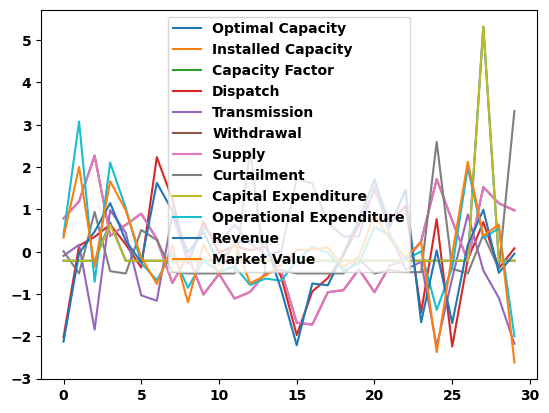

In [14]:
result_features = np.array(results).T
for i, y in enumerate(result_features):
    plt.plot(np.arange(len(y)), stats.zscore(y), label=result_keys[i])
plt.legend()
plt.show()

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\scipy\stats\_stats_py.py:3100: RuntimeWarning: invalid value encountered in subtract
  z = (scores - mn) / std


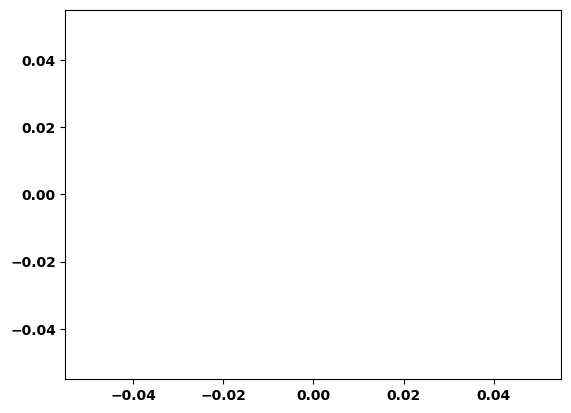

In [64]:
def plot_result(i):
    plt.plot(np.arange(len(result_features[i])), stats.zscore(result_features[i]), label=result_keys[i])
plot_result(2)

In [31]:
def MAD(x):
    return np.median(np.absolute(x - np.mean(x)))

var = [MAD(stats.zscore(result)) for result in result_features]
print(var)
sorted_var = np.argsort(var)
for i in sorted_var:
    print(f"{i}: {result_keys[i]}")

[0.214372327084487, nan, nan, 0.628185258661611, 0.6139032961506723, 0.8417548855656144, 0.8417548855653507, 0.5153426822632483, 0.2130458647938491, 0.4608466029944054, 0.5457121589147484, 0.3624605903165027]
8: Capital Expenditure
0: Optimal Capacity
11: Market Value
9: Operational Expenditure
7: Curtailment
10: Revenue
4: Transmission
3: Dispatch
6: Supply
5: Withdrawal
1: Installed Capacity
2: Capacity Factor


c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\scipy\stats\_stats_py.py:3100: RuntimeWarning: invalid value encountered in subtract
  z = (scores - mn) / std


# first optimization (only generators)

In [118]:
def get_feature(df: pd.DataFrame, search: str):
    filtered_df = df.filter(like=search, axis=1)
    return np.mean(np.array(filtered_df), axis=(0,1))

In [119]:
feature_key_words = ['solar', 'onwind', 'offwind-ac', 'offwind-dc']

def get_feature_array(netw_splits):
    feature_array = []
    for netw in netw_splits:
        feature_data = netw.generators_t.p_max_pu
        features = [get_feature(feature_data, key_word) for key_word in feature_key_words]
        feature_array.append(features)
    
    feature_scaler = StandardScaler().fit(feature_array)
    feature_array_norm = feature_scaler.transform(feature_array)

    return feature_array_norm

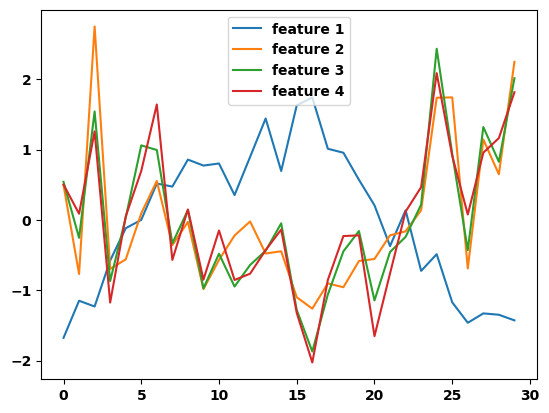

In [121]:
feature_array = get_feature_array(netw_splits)
plot_feature_array(feature_array)

In [127]:
coefficients = dict()

for result_key in result_keys:
    result_array = get_result_array(netw_splits, result_key)
    if any(np.isinf(res) or np.isnan(res) for res in result_array):
        continue
    
    regr = LassoCV()
    with warnings.catch_warnings(action="ignore"):
        regr.fit(feature_array, result_array)
    
    coefficients[result_key] = regr.coef_/np.var(regr.coef_)

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\scipy\stats\_stats_py.py:3100: RuntimeWarning: invalid value encountered in subtract
  z = (scores - mn) / std


In [128]:
coefficients

{'Optimal Capacity': array([-69.05258534,   0.        ,   0.        ,   0.        ]),
 'Dispatch': array([0.0000000e+00, 0.0000000e+00, 3.6028797e+17, 0.0000000e+00]),
 'Transmission': array([ -5.52733933,  -9.82539024,  -6.43830501, -20.10896196]),
 'Withdrawal': array([-3.30458523,  0.        ,  4.89330645,  0.        ]),
 'Supply': array([-3.30458523,  0.        ,  4.89330645,  0.        ]),
 'Curtailment': array([ 0.72356777,  1.17934973,  2.90570392, -1.77838425]),
 'Capital Expenditure': array([-69.21693532,   0.        ,   0.        ,   0.        ]),
 'Operational Expenditure': array([-5.84492804, -5.0606969 , -0.79569034, -0.56369825]),
 'Revenue': array([ 7.2057594e+17, -0.0000000e+00,  0.0000000e+00, -0.0000000e+00]),
 'Market Value': array([-8.07068846, -5.10240241, -4.86009085,  0.06601384])}

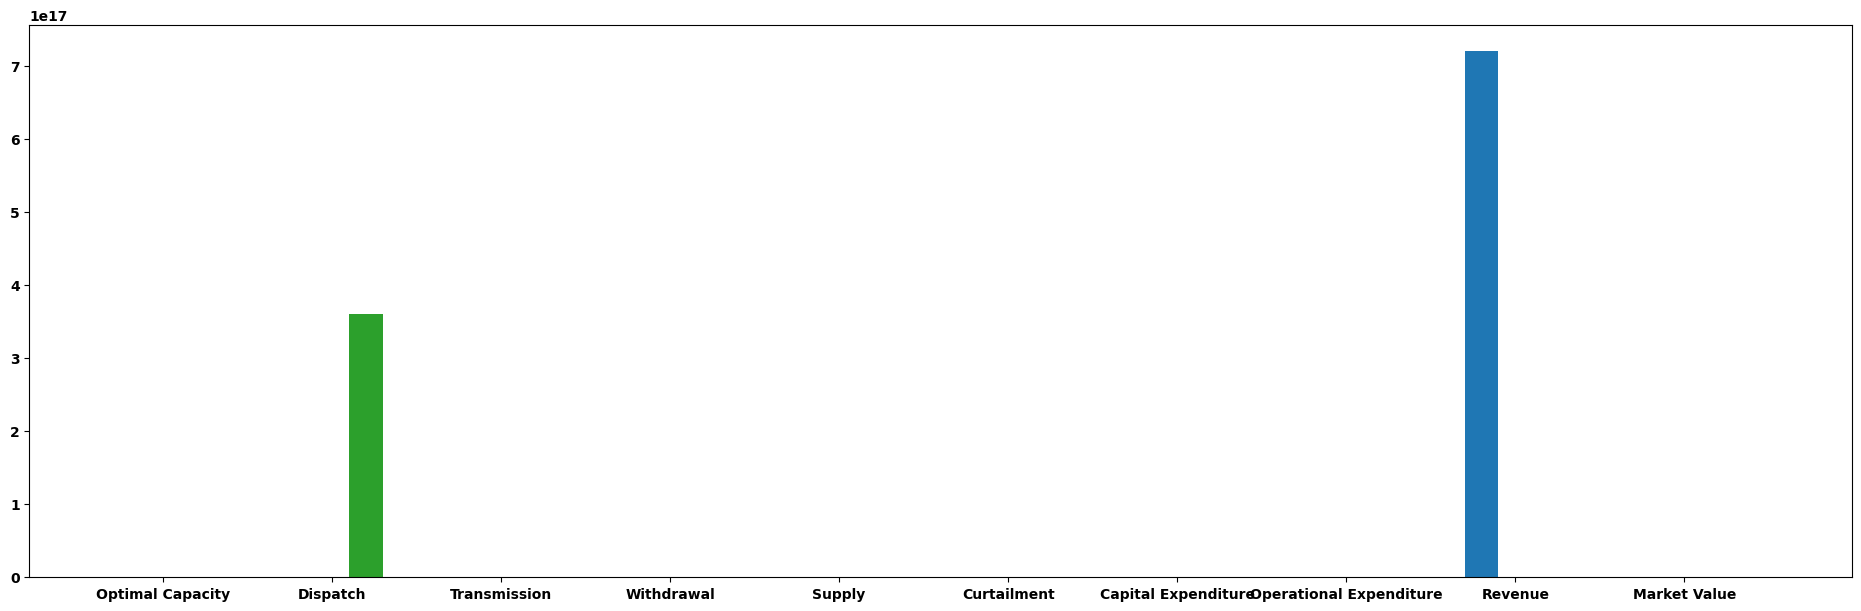

In [129]:
coef_dict = coefficients
width = 0.2
multiplier = 0

coefs = np.array(np.abs(list(coef_dict.values()))).T

x = np.arange(len(coef_dict))
fig, ax = plt.subplots(layout='constrained')
fig.set_size_inches(18.5, 6)
ax.set_xticks(x + width, coef_dict.keys())

for i, coef in enumerate(coefs):
    offset = width * multiplier
    rects = ax.bar(x + offset, coef, width)
    multiplier += 1


In [52]:
regr.coef_

array([ 7.40148683e-18, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00])

# Optimization by generators and location

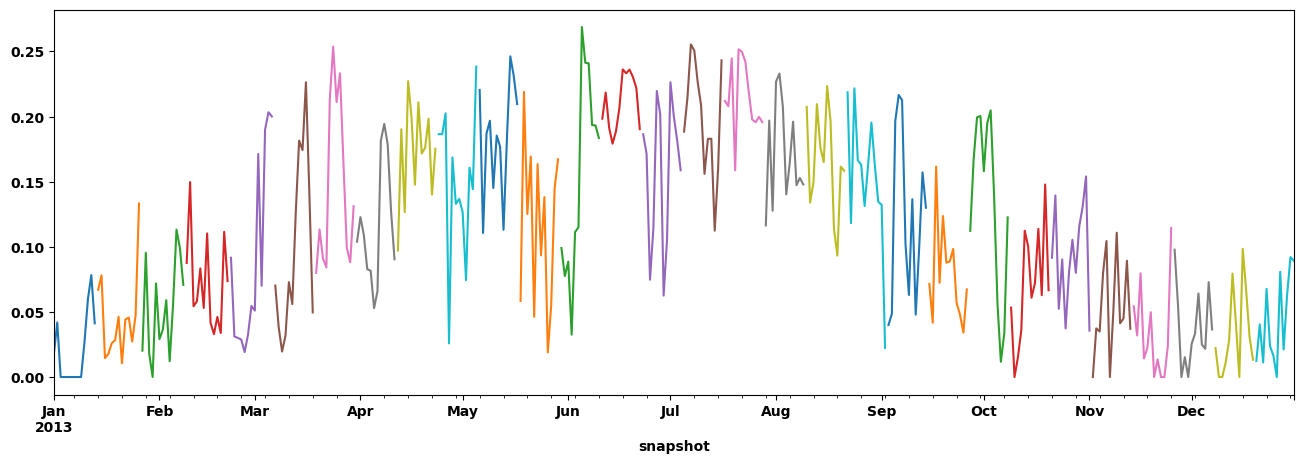

In [37]:
for netw in netw_splits:
    netw.generators_t.p_max_pu['DE0 0 solar'].plot(figsize=(16,5))

In [38]:
generators = ['solar', 'onwind', 'offwind-ac', 'offwind-dc']
location_split_x = 10
location_split_y = 51

def get_features(netw: pypsa.Network):
    feature_data = netw.generators_t.p_max_pu
    feature_array = []
    for generator in generators:
        df_generator = feature_data.filter(like=generator, axis=1)
        location_array = [[], [], [], []]
        for column in df_generator:
            bus = column.rpartition(' ')[0]
            if netw.buses['y'][bus] > location_split_y:
                if netw.buses['x'][bus] <= location_split_x:
                    location_array[0].append(np.mean(df_generator[column]))
                else:
                    location_array[1].append(np.mean(df_generator[column]))
            else: 
                if netw.buses['x'][bus] <= location_split_x:
                    location_array[2].append(np.mean(df_generator[column]))
                else:
                    location_array[3].append(np.mean(df_generator[column]))
        for a in location_array:
            if len(a) == 0:
                feature_array.append(0)
            else: 
                feature_array.append(np.mean(a))
    return feature_array

[[0.023287756825002268, 0.018222719569624422, 0.034129303540099486, 0.03247325248321483, 0.2899236893532049, 0.34305555931830295, 0.15245005331300038, 0.23495746570817141, 0.5494480546771484, 0.5609324973294698, 0, 0, 0.5944100417452131, 0.6621845551871764, 0, 0], [0.052406086725691685, 0.043983326240531875, 0.061252973410412456, 0.06327293565426127, 0.20668802070399828, 0.12619582859128847, 0.08523923851370455, 0.05466607337191576, 0.465839947369321, 0.4286039911586779, 0, 0, 0.5371105329279025, 0.6153751570382221, 0, 0], [0.052855204725680296, 0.050685742688612666, 0.046580475463508214, 0.055228104195265186, 0.562806348104409, 0.4797116036911616, 0.49343531076340336, 0.433562246857648, 0.717086425231416, 0.6646328842890659, 0, 0, 0.7688390784137421, 0.6775636210651572, 0, 0], [0.07363179285916549, 0.07230004963307086, 0.10021803715093106, 0.09444980666707549, 0.17600695460259377, 0.13486276515188117, 0.10591883745352763, 0.08192010401229075, 0.3906402751521528, 0.3373245513031077, 0,

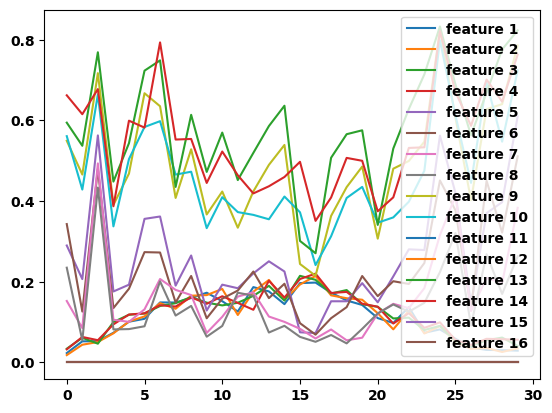

In [41]:
feature_array = []
for netw in netw_splits:
    feature_array.append(get_features(netw))

print(feature_array)
plot_feature_array(feature_array)

[-4.357099533081054e-06, 7.748603820800782e-08, 1.1682510375976563e-06, 2.5987625122070313e-06, 7.152557373046875e-07, -3.814697265625e-07, 3.6150217056274413e-06, 2.2113323211669923e-06, 1.0132789611816406e-07, 1.1771917343139648e-06, -4.6491622924804686e-07, 6.288307909938694e-07, 7.271766662597656e-07, 6.22868537902832e-07, -1.7523765563964843e-06, -4.535913467407226e-06, -1.4364719390869141e-06, -1.52587890625e-06, 7.450580596923828e-08, 1.7553567886352539e-06, 3.7848949432373047e-06, 1.418590545654297e-06, 3.266334533691406e-06, -3.3795833587646486e-06, 2.2351741790771484e-07, -3.4242868423461916e-06, 5.006790161132813e-07, 2.2649765014648438e-06, -9.000293344113023e-07, 5.960464477539063e-08]


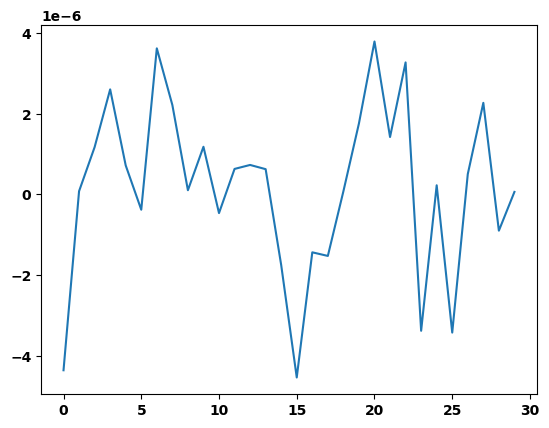

In [42]:
result_array = []
result_key_words = ['Offshore Wind (AC)', 'Offshore Wind (DC)', 'Onshore Wind', 'Solar']

for netw in netw_splits:
    capacity_mean = np.mean(netw.statistics()['Revenue'])
    result_array.append(capacity_mean)

print(result_array)
plt.plot(result_array)

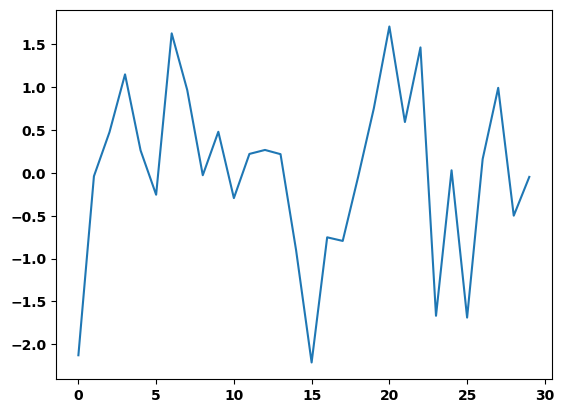

In [43]:
feature_scaler = StandardScaler().fit(feature_array)
feature_array_norm = feature_scaler.transform(feature_array)

result_array_norm = stats.zscore(result_array)

plt.plot(result_array_norm)

In [44]:
regr = LassoCV()
regr.fit(feature_array_norm, result_array_norm)
regr.coef_

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002353723201462543, tolerance: 0.002225981922786867
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0056700808073202325, tolerance: 0.002225981922786867
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005893956579450688, tolerance: 0.002225981922786867
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\csms\minicon

array([ 1.48029737e-17,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [45]:
regr.coef_

array([ 1.48029737e-17,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00])